In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import re
import nltk
import string
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import collections
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving hotel_data_final.csv to hotel_data_final.csv


In [3]:
import io
review_df = pd.read_csv(io.BytesIO(uploaded['hotel_data_final.csv']))

In [4]:
review_df.head()


Hotel_id  ... User_id
0         0  ...   15400
1         1  ...   15740
2         1  ...   13760
3         1  ...   11027
4         1  ...   10306

[5 rows x 12 columns]

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
# Investigate Data
type(review_df)
review_df.size
review_df.shape
review_df.head()
review_df.tail()

pandas.core.frame.DataFrame

280728

(23394, 12)

Hotel_id  ... User_id
0         0  ...   15400
1         1  ...   15740
2         1  ...   13760
3         1  ...   11027
4         1  ...   10306

[5 rows x 12 columns]

Hotel_id  ... User_id
23389      3128  ...   13911
23390      3129  ...    9306
23391      3130  ...    2888
23392      3130  ...    4949
23393      3130  ...    9807

[5 rows x 12 columns]

In [8]:
# Checking for missing values
pd.isnull(review_df).any()
pd.isnull(review_df).sum()

Hotel_id          False
Hotel             False
Address           False
City              False
Title              True
Users             False
Reviews            True
Rating             True
Hotel_Type         True
Price              True
Hotel_Category    False
User_id           False
dtype: bool

Hotel_id             0
Hotel                0
Address              0
City                 0
Title               52
Users                0
Reviews              1
Rating              29
Hotel_Type         962
Price             1513
Hotel_Category       0
User_id              0
dtype: int64

In [9]:
# Dropping the missing values
review_df = review_df.dropna()
review_df = review_df.reset_index(drop=True)
print('Shape of dataset ',review_df.shape)
print(review_df.columns)

Shape of dataset  (21770, 12)
Index(['Hotel_id', 'Hotel', 'Address', 'City', 'Title', 'Users', 'Reviews',
       'Rating', 'Hotel_Type', 'Price', 'Hotel_Category', 'User_id'],
      dtype='object')


In [10]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21770 entries, 0 to 21769
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hotel_id        21770 non-null  int64  
 1   Hotel           21770 non-null  object 
 2   Address         21770 non-null  object 
 3   City            21770 non-null  object 
 4   Title           21770 non-null  object 
 5   Users           21770 non-null  object 
 6   Reviews         21770 non-null  object 
 7   Rating          21770 non-null  float64
 8   Hotel_Type      21770 non-null  float64
 9   Price           21770 non-null  object 
 10  Hotel_Category  21770 non-null  object 
 11  User_id         21770 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 2.0+ MB


In [15]:
# Dividing the Sentiment into "Positive" and "Negative" w.r.t to the Rating
review_df['Sentiment'] = review_df['Rating'].apply(lambda Rating: 'Positive' if Rating > 3 else 'Negative')
review_df.head(5)

Hotel_id              Hotel  ... User_id Sentiment
0         0          La Quinta  ...   15400  Negative
1         2  Inn At Queen Anne  ...   17618  Negative
2         2  Inn At Queen Anne  ...   17602  Positive
3         2  Inn At Queen Anne  ...   17601  Positive
4         2  Inn At Queen Anne  ...   17600  Negative

[5 rows x 13 columns]

In [16]:
# Sentiment Count
review_df.Sentiment.value_counts()

Positive    16369
Negative     5401
Name: Sentiment, dtype: int64

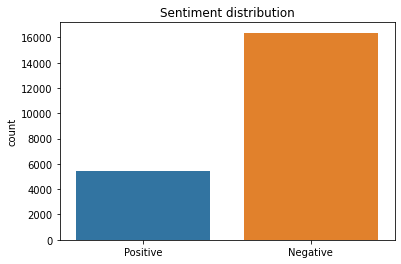

In [18]:
# Plot Showing Sentiment Distribution
f = sns.countplot(x='Sentiment', data=review_df)
f.set_title("Sentiment distribution")
f.set_xticklabels(['Positive', 'Negative'])
plt.xlabel("");

In [19]:
# The "Positive" Sentiment has been labelled as "1" and the "Negative" as "0"
review_df['Label'] = review_df['Sentiment'].apply(lambda Sentiment: '1' if Sentiment is 'Positive' else '0')
review_df.head(5)

Hotel_id              Hotel         Address  ... User_id Sentiment Label
0         0          La Quinta  5820 Walden Rd  ...   15400  Negative     0
1         2  Inn At Queen Anne   505 1st Ave N  ...   17618  Negative     0
2         2  Inn At Queen Anne   505 1st Ave N  ...   17602  Positive     1
3         2  Inn At Queen Anne   505 1st Ave N  ...   17601  Positive     1
4         2  Inn At Queen Anne   505 1st Ave N  ...   17600  Negative     0

[5 rows x 14 columns]

In [20]:
review_df.Rating.value_counts()

5.0    10125
4.0     6244
3.0     2880
2.0     1299
1.0     1222
Name: Rating, dtype: int64

In [21]:
print("Mean rating : {}".format(review_df['Rating'].mean()))
print("Mean rating standard deviation: {}".format(review_df['Rating'].std()))

Mean rating : 4.045062011943041
Mean rating standard deviation: 1.157272811585155


<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Rating')

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Count')

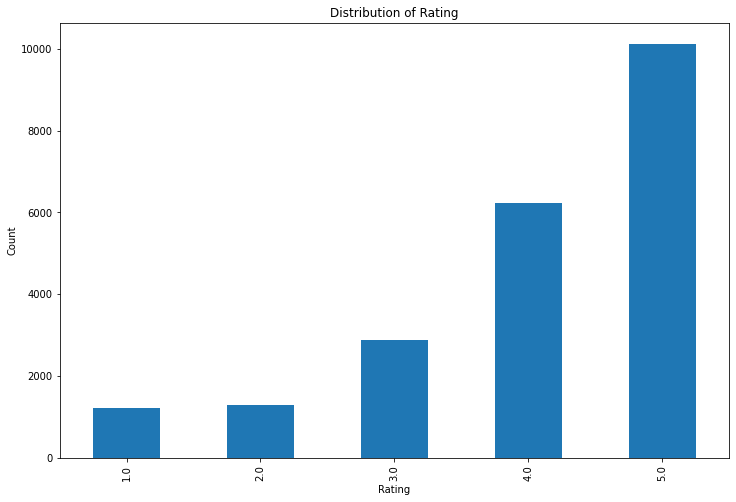

In [23]:
# Plot distribution of rating
plt.figure(figsize=(12,8))
# sns.countplot(df['Rating'])
review_df['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

(array([ 72.,  15.,  67.,  66.,  49., 216., 182., 456., 379., 692.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'mean rating given by each reviewer')

Text(0, 0.5, 'number of reviewers')

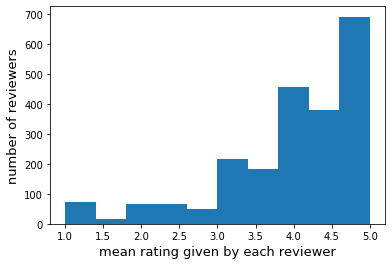

In [25]:
mean_rating_of_user = review_df.groupby('Hotel').apply(lambda x: x['Rating'].mean())

fig = plt.figure(figsize=(6,4))
ax  = fig.add_subplot(111)
ax.hist(mean_rating_of_user)
ax.set_xlabel('mean rating given by each reviewer', fontsize=13)
ax.set_ylabel('number of reviewers', fontsize=13)

In [26]:
for index,text in enumerate(review_df['Reviews']):
  print('Review %d:\n'%(index+1),text)


Streaming output truncated to the last 5000 lines.
Review 2463:
 Hotel staff was friendly upon checking in, Hotel provided short radius shuttle for shopping trips.. Hotel lacked indoor or outdoor pool, the rooms did not carry microwaves. Maid service was overly noisy during the weekend. Surrounding area was nice quiet and close to Little Italy. The attached restaurant Rooks corner I felt was overpriced but the food and the service for good.
Review 2464:
 Nice hotel, clean, great staff.Very friendly and knowledgeable about surrounding area.I cam for a work conf at the McCormick downtown. The show provided a shuttle from the hotel entrance right to McCormick place, so that is a big bonus, as I DO NOT like to drive around Chicago anywhere NEAR morning or afternoon rush. The valets were very nice and quick with your car, but 45 per night for parking seems way overpriced. This alone would cause me to look elsewhere, if I were personally paying for a stay. The Taylor street restaurants were 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 This was our last stop on our trip to Atlanta, this city is lucky enough to have 2 Ritz Carlton Hotels but we stayed at the downtown location. Though the address is on Peachtree the valet and entrance to the hotel is on Ellis Street....More
Review 19352:
 Perfect location if you are doing business in downtown Atlanta. Walking distance to many other hotels/meeting rooms and restaurants. The hotel staff is incredible. Friendly, prompt, professional. Room is comfortable and clean. Bed very comfortable. Temperature in the room easy to manage. For that first...More
Review 19353:
 Being a Carolina Panther football fan we went to Atlanta in Dec.'14. The hotel booked never got their end of our reservation and were sold out. Happily the Ritz had room and we were able to stay there for the same price. Hotels.com who made...More
Review 19354:
 This hotel is elegant and sophisticated, as with nearly all Ritz Carltons. The only downside is that it

In [27]:
corpus = [] 

In [28]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
review_df['Reviews']=review_df['Reviews'].apply(lambda x:expand_contractions(x))

In [29]:
#Tokenization of the sentences

from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
print(tokens)


['We', 'spent', '2', 'weeks', 'in', 'this', 'hotel', 'due', 'to', 'the', 'cost', 'of', 'the', 'the', 'normal', 'hotels', 'we', 'stay', 'at', 'were', 'double', 'the', 'normal', 'cost', '.', 'The', 'location', 'of', 'this', 'hotel', 'is', 'GREAT', ',', 'it', 'has', 'a', 'nice', 'good', 'size', 'flat', 'screen', 'TV', 'with', 'cable/Sat', 'TV', ',', 'and', 'both', 'beds', 'were', 'actually', 'pretty', 'comfortable', '-', 'at', 'this', 'poit', 'there', 'is', 'nothing', 'else', 'that', 'I', '...', 'More']


In [30]:
#Lowercase the reviews
review_df['Text_Clean']=review_df['Reviews'].apply(lambda x: x.lower())


In [31]:
#Remove digits and words containing digits
review_df['Text_Clean']=review_df['Text_Clean'].apply(lambda x: re.sub('\w*\d\w*','', x))


In [32]:
#Remove Punctuations
review_df['Text_Clean']=review_df['Text_Clean'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))


In [33]:
# Removing extra spaces
review_df['Text_Clean']=review_df['Text_Clean'].apply(lambda x: re.sub(' +',' ',x))

In [34]:
#Reviews after cleaning
for index,text in enumerate(review_df['Text_Clean'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 i like this place close to arena and lots of restaurants i have stayed there before and i will use again
Review 2:
 location and price is what makes this place great easy access to restaurants bars markets seattle center and nearby bus stops or bike renting stop pronto to head downtown nothing special of this hotel besides the location water pressure for the shower was bad old and small ac units for each room well worth the price though nights people beds great place to stay if all you need is a bed at night
Review 3:
 it was a nice view close to everything like variety of food choices needle space emp museum central park garden and nice walking environment for evening walking
Review 4:
 let is just say this place has character
Review 5:
 other hotels in the area were much pricier than this one the room was very clean and the employees quite friendly location was great very easy to walk to the various seattle sights restaurants etc windows were not well insulated so you coul

In [36]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
review_df['lemmatized']=review_df['Text_Clean'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))



In [37]:
corpus.append(review_df['Text_Clean'])

In [38]:
corpus[0:10]

[0        this hotel is a dump upon checking in was told...
 1        hope you are strong enough to carry all bags u...
 2        my boyfriend and i decided to stay at this hot...
 3        the hotel was quaint and had a pleasant vibe t...
 4        dirty run down poorly represented nothing like...
                                ...                        
 21765    i booked this hotel for mid october months ago...
 21766    we had a one night stay at your hotel sept it ...
 21767    positives location it is on the main strip nex...
 21768    not exactly a fivestar hotel but right in the ...
 21769    we spent weeks in this hotel due to the cost o...
 Name: Text_Clean, Length: 21770, dtype: object]

In [48]:
# Importing the clean dataset to the local
from google.colab import files
review_df.to_csv('hotel_clean_data.csv')
files.download('hotel_clean_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
df_grouped=review_df[['Hotel','lemmatized']].groupby(by='Hotel').agg(lambda x:' '.join(x))
df_grouped.head()

lemmatized
Hotel                                                                          
11th Avenue Hotel Hostel      fianc book night denver look good deal stay ho...
1906 Lodge At Coronado Beach  absolutely delightful stay charming lodge hard...
21c Museum Hotel Lexington    recently stay hotel trip lexington friend grou...
250 Main Hotel                frequent business traveler stay type hotel yea...
402 Hotel #Thebigo            cool spot great lobby renovation lobby room ma...

In [41]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

aaa  ability  able  abri  ...  zaza  zephyr  zero  zoo
Hotel                                                   ...                         
11th Avenue Hotel Hostel        0        0     0     0  ...     0       0     0    0
1906 Lodge At Coronado Beach    0        0     0     0  ...     0       0     0    0
21c Museum Hotel Lexington      0        0     0     0  ...     0       0     0    0

[3 rows x 2500 columns]

In [42]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words={'english'})
data=vectorizer.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=vectorizer.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

aa  aaa  aaaa  ...  œthe  œðÿœ  ƒðÿ
Hotel                                         ...                 
11th Avenue Hotel Hostel      0.0  0.0   0.0  ...   0.0   0.0  0.0
1906 Lodge At Coronado Beach  0.0  0.0   0.0  ...   0.0   0.0  0.0
21c Museum Hotel Lexington    0.0  0.0   0.0  ...   0.0   0.0  0.0

[3 rows x 34391 columns]

In [44]:
#Checking the polarity of the Reviews
from textblob import TextBlob
review_df['polarity']=review_df['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [45]:
#Checking the highest polarity of reviews

print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(review_df.iloc[review_df['polarity'].sort_values(ascending=False)[:3].index]['Reviews']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Highest Polarity:
Review 1:
 I wanted to highlight the staff at this hotel. From checkin to checkout every experience was perfect. In my case it went one step further when I left my wallet/money clip with money sitting on the end table in the entrance way. Not only did they grab it for me but it also came back with all my money. The... More
Review 2:
 Excellent Staff
Review 3:
 perfect


In [46]:
#Checking the lowest polarity of reviews

print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(review_df.iloc[review_df['polarity'].sort_values(ascending=True)[:3].index]['Reviews']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Review 1:
 Horrible, the beds were like bricks and lacked comfort.
Review 2:
 Never again! The rooms comforters were stained terribly and found hair on sheets. They gave us another room and it looked the same. You get what you pay for I guess. We left and drove to another hotel
Review 3:
 I had a terrible experience with this hotel. I did not have towel rack or telephone in my room. Also there was an issue with the cleanliness of the room.


<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, 'Polarity')

Text(0, 0.5, 'Hotels')

Text(0.5, 1.0, 'Polarity of Different Hotel Reviews')

Text(0.005, -1.4, 'Biddeford Motel')

Text(0.005, -0.4, 'Days Inn Wheelersburg Portsmouth')

Text(0.005, 0.8, 'Lemon Tree Motel')

Text(0.005, 1.9833333333333334, 'Crossland Economy Studios Denver - Thornton')

Text(0.005, 3.04375, 'Three Oaks Motel')

Text(0.005, 4.1, 'Americas Best Value Inn - Medical Center / Lubbock')

Text(0.005, 5.106249999999999, 'Americas Best Value Inn-rialto')

Text(0.005, 6.147916666666666, 'Knights Inn Metairie')

Text(0.005, 7.153333333333333, 'Motel 6-dubuque')

Text(0.005, 8.16, 'Super 8 Delavan Near Lake Geneva')

Text(0.005, 9.160416666666666, 'Hyundae Resort Spa')

Text(0.005, 10.174999999999999, 'Crossland Economy Studios Salem - North')

Text(0.005, 11.20636574074074, 'Red Roof Inn Phoenix North - Bell Road')

Text(0.005, 12.233333333333333, 'Americas Best Value Inn Suites-lexington Park')

Text(0.005, 13.237499999999999, 'Champions Lodge')

Text(0.005, 14.255555555555555, 'Gateway Inn')

Text(0.005, 15.274074074074074, "Wyndham Garden Elk Grove Village/o'hare")

Text(0.005, 16.27559523809524, 'Wingate By Wyndham Alpharetta')

Text(0.005, 17.31875, 'Holiday Inn Express TulsaWoodland Hills')

Text(0.005, 18.325000000000003, 'Motel 6 Watsonville - Monterey Area')

Text(0.005, 19.32777777777778, 'Shadeland Inn')

Text(0.005, 20.33888888888889, 'Holiday Inn Express Marietta - Atlanta Northwest')

Text(0.005, 21.35, 'Wingate by Wyndham Frisco')

Text(0.005, 22.35, 'Westchester Hotel')

Text(0.005, 23.35, 'ECO LUX Inn')

Text(0.005, 24.353968253968254, 'Hotel 7 Vienna')

Text(0.005, 25.37746913580247, 'Hollywood Inn Express South')

Text(0.005, 26.380555555555556, 'Seaside Inn')

Text(0.005, 27.386408199643494, 'Desert Lodge')

Text(0.005, 28.390732323232324, 'Red Roof Plus+ Wilmington - Newark')

Text(0.005, 29.392708333333335, 'Days Inn Fayetteville')

Text(0.005, 30.42559523809524, 'Wyndham Garden-amarillo')

Text(0.005, 31.42784090909091, 'Wagon Wheel Motel')

Text(0.005, 32.42788461538462, 'Microtel Inn & Suites By Wyndham Augusta/Riverwatch')

Text(0.005, 33.42857142857143, 'Morristown Hotel Suites')

Text(0.005, 34.43265306122449, 'Hyatt Place Chantilly Dulles Airport South')

Text(0.005, 35.4375, 'Residence Inn Jacksonville Butler Boulevard')

Text(0.005, 36.440000000000005, 'LA Hacienda Motel')

Text(0.005, 37.446296296296296, 'Courtyard Houston Hobby Airport')

Text(0.005, 38.45, 'Motel 6 Santa Maria')

Text(0.005, 39.45, 'Holiday Inn Express Suites Arkadelphia - Caddo Valley')

Text(0.005, 40.454166666666666, 'Best Western Regency Inn')

Text(0.005, 41.457857142857144, 'Suburban Extended Stay Hotel')

Text(0.005, 42.459722222222226, 'Americas Best Value Inn New Philadelphia')

Text(0.005, 43.46143707482993, 'DoubleTree by Hilton Golf Resort San Diego')

Text(0.005, 44.46666666666667, 'Admiral Hotel')

Text(0.005, 45.46894841269842, 'Econo Lodge South')

Text(0.005, 46.48125, 'Oak Tree Inn')

Text(0.005, 47.48162878787879, 'Crossland Economy Studios Spartanburg - Asheville Hwy.')

Text(0.005, 48.48491838023088, 'River Side Motel & Marina')

Text(0.005, 49.48555555555556, 'Ocean Shores Motel')

Text(0.005, 50.49132395382396, 'Best Western Cantebury Inn & Suites')

Text(0.005, 51.49326923076923, 'Quality Inn North')

Text(0.005, 52.5, 'Half Moon Motel')

Text(0.005, 53.5, 'Comfort Inn-lehigh Valley West')

Text(0.005, 54.50568181818182, 'Super 8-Dubois')

Text(0.005, 55.50833333333333, 'Inn Of Knoxville')

Text(0.005, 56.50833333333333, 'Aztec Hotel')

Text(0.005, 57.509145149497165, "Fiddler's Inn")

Text(0.005, 58.51111111111111, 'Wilbraham Inn')

Text(0.005, 59.51111111111111, 'Culver Cove Resort')

Text(0.005, 60.51473214285714, 'Rodeway Inn Boardwalk')

Text(0.005, 61.51684704184704, 'Holiday Inn Hotel Suites Denver Airport')

Text(0.005, 62.521875, 'Extended Stay America - Detroit/Ann Arbor - University South')

Text(0.005, 63.525, 'Comfort Inn Suites Grinnell')

Text(0.005, 64.53333333333333, 'Courtyard Bloomington')

Text(0.005, 65.53333333333333, 'Robert Frost Mountain Cabins')

Text(0.005, 66.53333333333333, 'University Inn')

Text(0.005, 67.54166666666666, 'Motel Durango')

Text(0.005, 68.54821428571428, 'Fern River Resort Motel')

Text(0.005, 69.54833333333333, 'Courtyard Macon')

Text(0.005, 70.55, 'Bryce Canyon Motel')

Text(0.005, 71.55323593073592, "America's Best Value Inn")

Text(0.005, 72.554375, 'Ramada-franklin/cool Springs')

Text(0.005, 73.55555555555554, 'Fairway Motor Inn')

Text(0.005, 74.55833333333332, 'Hilltop Motel')

Text(0.005, 75.55833333333332, 'Koloa Landing Resort')

Text(0.005, 76.5625, 'Extended Stay America - Columbia - Stadium Blvd.')

Text(0.005, 77.5625, 'Americas Best Value Inn Las Vegas')

Text(0.005, 78.565625, "Four Points By Sheraton Chicago O'hare Airport")

Text(0.005, 79.56666666666666, 'Super 8 Richfield Area')

Text(0.005, 80.56666666666666, 'Nites Inn')

Text(0.005, 81.5669742063492, 'Rodeway Inn Suites')

Text(0.005, 82.5673469387755, 'Courtesy Inn Eugene')

Text(0.005, 83.56875, 'Americas Best Value Inn Jonesville')

Text(0.005, 84.56896258503401, 'Quality Inn at Collins Road')

Text(0.005, 85.57251984126984, 'Hotel Del Flores')

Text(0.005, 86.5729375, 'Days Inn-Boardman')

Text(0.005, 87.5736111111111, 'Lodge At Lake Tahoe')

Text(0.005, 88.57499999999999, 'Wyndham Ka Eo Kai')

Text(0.005, 89.57499999999999, 'Desoto Inn & Suites')

Text(0.005, 90.57708333333333, 'The Bertram Inn & Conference Center')

Text(0.005, 91.57863053613053, 'Rodeway Inn Oceanview')

Text(0.005, 92.57916666666667, 'Rancho Tee Motel')

Text(0.005, 93.57963636363635, 'Super 8-Midland')

Text(0.005, 94.58, 'Howard Johnson Inn - Flagstaff')

Text(0.005, 95.58051184110008, 'Economy Inn')

Text(0.005, 96.58431216931217, 'Clarion Hotel Anaheim Resort')

Text(0.005, 97.585, 'Quality Inn & Suites Jefferson City')

Text(0.005, 98.58530651255552, 'Seattle Pacific Hotel')

Text(0.005, 99.58666666666666, "Alicia's Eagle Rock Lodge")

Text(0.005, 100.58749999999999, 'Motel 6 San Bernardino North')

Text(0.005, 101.58749999999999, 'Best Western Plus Inntowner Madison')

Text(0.005, 102.59122023809523, 'Sage Motel')

Text(0.005, 103.59478114478114, 'Days Inn Elk Grove Village/chicago/ohare Airport West')

Text(0.005, 104.598262921422, 'Civic Center Inn')

Text(0.005, 105.6, 'Ramada Metairie New Orleans Airport')

Text(0.005, 106.6, 'Baymont Inn & Suites Crestview')

Text(0.005, 107.6, 'Castle Inn')

Text(0.005, 108.6, 'Hawthorn Suites By Wyndham Louisville/jeffersontown')

Text(0.005, 109.6, 'WoodSpring Suites Jackson South')

Text(0.005, 110.6, 'Americas Best Value Inn Louisville')

Text(0.005, 111.6, 'Motel 6 Salinas South - Monterey Area')

Text(0.005, 112.6, 'Geneva Motel')

Text(0.005, 113.6, 'Microtel Inn Suites By Wyndham Culpeper')

Text(0.005, 114.6, 'Wingate by Wyndham - Joliet')

Text(0.005, 115.6, 'Apple Tree Inn')

Text(0.005, 116.6, 'Microtel Inn Suites By Wyndham Lexington')

Text(0.005, 117.6, 'Microtel Inn Suites By Wyndham Pleasanton')

Text(0.005, 118.6, 'Americas Best Value Inn - Greeley/Evans')

Text(0.005, 119.60041987333653, 'Milwaukee Airport Inn')

Text(0.005, 120.60125, 'High Desert Motel')

Text(0.005, 121.6032490079365, 'Red Roof Inn')

Text(0.005, 122.60350529100529, 'Motel 6 Santa Fe - Cerrillos Road South')

Text(0.005, 123.60406746031745, 'Chalet Inn')

Text(0.005, 124.60421349206348, 'Haltom Inn')

Text(0.005, 125.60753968253968, 'Holiday Inn Express & Suites Los Angeles Downtown West')

Text(0.005, 126.60794146825397, 'Extended Stay America Atlanta - Duluth')

Text(0.005, 127.60833333333333, 'Motel 6 Grand Rapids - Airport')

Text(0.005, 128.60965277777777, 'Baymont Inn & Suites Springfield')

Text(0.005, 129.60972222222222, 'Red Rooster Lodge')

Text(0.005, 130.61111111111111, 'Relax Inn Altoona')

Text(0.005, 131.61180555555555, 'Red Lion Inn Suites')

Text(0.005, 132.61203703703703, 'Santas Lodge')

Text(0.005, 133.61249999999998, 'Lido Islander')

Text(0.005, 134.61314261418852, 'Lincoln Plaza Hotel')

Text(0.005, 135.61325925925925, 'Super 8')

Text(0.005, 136.61454545454544, 'Best Western Plus Woodland Hills Hotel & Suites')

Text(0.005, 137.6159090909091, 'Budget Host Inn NAU / Downtown Flagstaff')

Text(0.005, 138.61791666666667, 'Americas Best Value Inn Clear Lake')

Text(0.005, 139.6186111111111, 'Wyndham Santa Monica At The Pier')

Text(0.005, 140.62416666666667, 'Best Western Radford Inn')

Text(0.005, 141.62440476190474, 'Executive Inn')

Text(0.005, 142.62541666666667, 'Corporate Inn Sunnyvale')

Text(0.005, 143.62619047619046, 'King George Hotel')

Text(0.005, 144.6290625, 'Motel 6 Norfolk')

Text(0.005, 145.63171768707483, 'Days Inn Perry Near Fairgrounds')

Text(0.005, 146.63248299319727, 'Motel 6 Mason')

Text(0.005, 147.63333333333333, 'Red Roof Inn Lansing East - Michigan State University')

Text(0.005, 148.63333333333333, 'Residence Inn Mobile')

Text(0.005, 149.63333333333333, 'Fairfield Inn Davenport')

Text(0.005, 150.63333333333333, 'Microtel Inn & Suites By Wyndham Baton Rouge')

Text(0.005, 151.63333333333333, 'Super 8 Franklin')

Text(0.005, 152.63583333333332, 'Courtyard Chicago Deerfield')

Text(0.005, 153.63666666666666, 'Motel 6-perry')

Text(0.005, 154.63714285714286, 'Western Hills Motel')

Text(0.005, 155.63743386243385, 'Four Points by Sheraton Orlando International Drive')

Text(0.005, 156.6375, 'EconoLodge')

Text(0.005, 157.6375, 'Comfort Inn-green Valley')

Text(0.005, 158.6375, 'Red Roof Inn Cleveland-medina')

Text(0.005, 159.63839436026936, 'Hotel Aiken')

Text(0.005, 160.63888888888889, 'Holiday Inn Garland')

Text(0.005, 161.64, 'Japan House Suites')

Text(0.005, 162.6431878994022, 'Howard Johnson Express Inn/Airport')

Text(0.005, 163.64801996258726, 'Days Inn Chincoteague Island')

Text(0.005, 164.65, 'WoodSpring Suites Miami Southwest')

Text(0.005, 165.651875, 'Red Roof Inn Fresno - Yosemite Gateway')

Text(0.005, 166.65217712842713, 'Hawthorn Suites By Wyndham Dayton North')

Text(0.005, 167.653125, 'Days Inn-jfk Airport')

Text(0.005, 168.65555555555554, 'Chase Suite Hotel Overland Park')

Text(0.005, 169.6562925170068, 'Extended Stay America Fort Worth - Southwest')

Text(0.005, 170.65677721088434, 'Red Carpet Inn')

Text(0.005, 171.65803571428572, 'Travelodge-beckley')

Text(0.005, 172.65833333333333, 'Courtyard Boston Marlborough')

Text(0.005, 173.6587615955473, 'Bluegreen Vacations Patrick Henry Sqr, Ascend Resort Collection')

Text(0.005, 174.6588888888889, 'Island Country Inn')

Text(0.005, 175.66041666666666, 'Quality Inn & Suites Anaheim Maingate')

Text(0.005, 176.6605333092833, 'Norfolk Country Inn & Suites')

Text(0.005, 177.66193494005992, 'Americas Best Value Astoria Inn and Suites')

Text(0.005, 178.6629650297619, 'Best Western Markland Hotel')

Text(0.005, 179.66339285714284, 'Brookhurst Plaza Inn')

Text(0.005, 180.6639384920635, 'Motel 6-albert Lea')

Text(0.005, 181.66570399507899, 'Hotel Indigo Napa Valley')

Text(0.005, 182.66609268707484, 'New Orleans Inn')

Text(0.005, 183.66666666666666, 'Aloft Bolingbrook')

Text(0.005, 184.6681818181818, 'Baymont Inn Suites Normal Bloomington')

Text(0.005, 185.66866883116882, 'Holiday Inn Express Clermont')

Text(0.005, 186.6703698478631, 'Days Inn By Wyndham Orlando/International Drive')

Text(0.005, 187.671875, 'W Los Angeles - West Beverly Hills')

Text(0.005, 188.6731866883117, 'The Redbury New York')

Text(0.005, 189.67380952380952, 'Motel 6 Tucson North')

Text(0.005, 190.67499999999998, 'Ramada Louisville Expo Center')

Text(0.005, 191.67714285714285, 'Ocean Park Hotel')

Text(0.005, 192.67777777777778, 'Drury Plaza Hotel Cleveland Downtown')

Text(0.005, 193.68, 'John Day Motel')

Text(0.005, 194.6803902116402, 'High Point World Resort')

Text(0.005, 195.68044104149217, 'Super 8 Columbia Dwntwn Sc')

Text(0.005, 196.6805513227513, 'Red Roof Inn Hampton Coliseum Convention Center')

Text(0.005, 197.68104064542484, 'Casa LOMA Hotel')

Text(0.005, 198.6815025252525, 'Fairfield Inn Bozeman')

Text(0.005, 199.68201814058958, 'Americas Best Value Inn-corpus Christi North/airport')

Text(0.005, 200.68321463482752, 'Wyndham Garden Baronne Plaza New Orleans')

Text(0.005, 201.68333333333334, 'Americas Best Value Inn Albert Lea')

Text(0.005, 202.6835146103896, 'Courtyard Gainesville')

Text(0.005, 203.6845238095238, 'Village Inn & Suites')

Text(0.005, 204.68497023809525, "Inn Port D'vino")

Text(0.005, 205.6861111111111, 'Days Inn & Suites Logan')

Text(0.005, 206.68661228513201, 'Hotel 502')

Text(0.005, 207.68666666666667, 'Hotel Rosedale')

Text(0.005, 208.68666666666667, 'Crown Reef Beach Resort and Waterpark')

Text(0.005, 209.6875, 'The Niantic Inn')

Text(0.005, 210.6888888888889, 'Terrace Towers Lodge')

Text(0.005, 211.69049603174602, 'Days Inn & Suites Milwaukee Airport')

Text(0.005, 212.69085304576376, 'Super 8 Port Royal/beaufort')

Text(0.005, 213.69166666666666, 'Hampton Inn-atlanta/fairburn')

Text(0.005, 214.69166666666666, 'Holiday Inn Express Suites Northwood')

Text(0.005, 215.69166666666666, 'Best Western Appleton Inn')

Text(0.005, 216.6924107142857, 'Red Roof Inn Salem')

Text(0.005, 217.69285714285715, 'Hyatt Place Atlanta Buckhead')

Text(0.005, 218.69336255849413, 'Barclay Hotel Atlanta Downtown')

Text(0.005, 219.69375, 'Blue Gables Motel')

Text(0.005, 220.69444444444443, 'Cave Mountain Motel')

Text(0.005, 221.69583333333333, 'Homewood Suites by Hilton Sacramento-Roseville')

Text(0.005, 222.6961240809455, 'Rodeway Inn')

Text(0.005, 223.69766865079364, 'Holiday Inn Express & Suites Port Richey')

Text(0.005, 224.6982481060606, 'Best Western Alvin Inn')

Text(0.005, 225.69848953823953, 'Red Roof Inn Tallahassee')

Text(0.005, 226.6992013888889, 'Best Western Plus Franklin Square Inn TroyAlbany')

Text(0.005, 227.69931547619046, 'Comfort Suites Kings Bay Naval Base Area')

Text(0.005, 228.6995238095238, 'Hampton Inn Suites Conroe I45 North')

Text(0.005, 229.7, 'Best Western Eden Prairie Inn')

Text(0.005, 230.7, 'Motel West Bend')

Text(0.005, 231.7, 'Motel 6 Ellensburg')

Text(0.005, 232.7, 'Courtyard Charlottesville North')

Text(0.005, 233.70084054834055, 'Red Roof Inn Dayton North Airport')

Text(0.005, 234.70119047619048, 'Super 8 Freeport')

Text(0.005, 235.70207386363637, 'Extended Stay America Hampton - Coliseum')

Text(0.005, 236.70208333333332, 'Central Park West Hostel')

Text(0.005, 237.70290577274034, 'Days Inn Brookings')

Text(0.005, 238.70310606060605, 'North Star Lodge')

Text(0.005, 239.70416666666665, 'Holiday Inn Nashville Airport')

Text(0.005, 240.70602824784643, 'Montage Beverly Hills')

Text(0.005, 241.70627705627706, 'National 9 Inn-sand Canyon')

Text(0.005, 242.70749999999998, 'Howard Johnson Express Inn-beckley')

Text(0.005, 243.7080496933622, 'Inn Of The Dove')

Text(0.005, 244.70833333333331, 'Best Western Hilliard Inn Suites')

Text(0.005, 245.70847763347763, 'Regency Inn')

Text(0.005, 246.70897867564534, 'The Lexington Hotel, Autograph Collection')

Text(0.005, 247.7097222222222, 'Econo Lodge-san Angelo')

Text(0.005, 248.7110544217687, 'Quality Inn Bedford')

Text(0.005, 249.71130952380952, 'Best Western Surf City')

Text(0.005, 250.711402288188, 'Hilton Garden Inn Uniontown')

Text(0.005, 251.7122222222222, 'Barn Motor Inn')

Text(0.005, 252.7129298941799, 'Solvang Inn Cottages')

Text(0.005, 253.7130726751462, 'San Francisco International Hostel')

Text(0.005, 254.71353726396063, 'Red Roof Inn & Suites Newark-university')

Text(0.005, 255.71388888888887, 'Motel 6 Naperville')

Text(0.005, 256.7140625, 'Hilton Los Angeles/Universal City')

Text(0.005, 257.7147943722944, 'Econo Lodge Inn Suites')

Text(0.005, 258.7166666666667, 'Sands Resort')

Text(0.005, 259.71761363636364, 'The Cartwright Hotel - Union Square, BW Premier Collection')

Text(0.005, 260.71781194885364, 'Red Roof Inn Hardeeville')

Text(0.005, 261.7178661616162, 'Hilton Garden Inn Buffalo Downtown')

Text(0.005, 262.71865530303035, "Admiral's Ocean Inn")

Text(0.005, 263.7194444444445, 'Holiday Inn Express Portland Se - Clackamas Area')

Text(0.005, 264.7197916666667, 'Partridge Inn')

Text(0.005, 265.72012750386784, 'Ambassadors Inn and Suites')

Text(0.005, 266.72024306746175, 'Residence Inn Atlanta Midtown/Peachtree at 17th')

Text(0.005, 267.72035052910053, 'Holiday Inn Express Wilkes-barre/scranton (airport)')

Text(0.005, 268.72036154248815, 'Fremont Hotel & Casino')

Text(0.005, 269.720670995671, 'Motel 6 Silver City')

Text(0.005, 270.72086805555557, 'Home2 Suites by Hilton Baltimore Downtown')

Text(0.005, 271.7214384920635, 'Microtel Inn by Wyndham Henrietta/Rochester')

Text(0.005, 272.7215625, "Cattlemen's Inn")

Text(0.005, 273.7216666666667, 'Econo Lodge Inn & Suites Carrollton Smithfield')

Text(0.005, 274.72196769280106, 'Americas Best Value Inn Texarkana')

Text(0.005, 275.72261904761905, 'Ramada-kingman')

Text(0.005, 276.7234070294785, 'Fairview Inn Suites')

Text(0.005, 277.72369002525255, 'Wyndham Garden Pittsburgh Airport')

Text(0.005, 278.725, 'Holiday Inn Express Albuquerque (I-40 Eubank)')

Text(0.005, 279.725, 'Tropicana Motel')

Text(0.005, 280.725, 'Pine Cone Motel')

Text(0.005, 281.7255050505051, 'La Quinta Inn Suites Canton')

Text(0.005, 282.7255651755652, 'Super 8 Monticello')

Text(0.005, 283.72702153813265, 'Best Western Plus Newark/christiana Inn')

Text(0.005, 284.72771524771525, 'Americana Hotel')

Text(0.005, 285.7283482787054, 'Super 8 Crawfordsville')

Text(0.005, 286.72870370370373, 'Baton Rouge Marriott')

Text(0.005, 287.7287878787879, 'Best Western Inn Florence')

Text(0.005, 288.72886904761907, 'Sterling Gardens Hotel')

Text(0.005, 289.7290445302095, 'Baymont By Wyndham Florida Mall')

Text(0.005, 290.7292619047619, 'Best Western Black Hills Lodge')

Text(0.005, 291.7296831955923, 'Margaritaville Island Hotel')

Text(0.005, 292.73190972222227, 'Days Inn Portage')

Text(0.005, 293.7322301136364, 'Super 8 By Wyndham Phoenix Metro North')

Text(0.005, 294.7328914141414, 'Days Inn Nashville North Opryland / Grand Ole Opry Area')

Text(0.005, 295.73333333333335, 'The Lodge At Russell')

Text(0.005, 296.73333333333335, 'Econo Lodge Downtown')

Text(0.005, 297.73375000000004, 'Hotel Galaxy')

Text(0.005, 298.7353174603175, 'Courtyard by Marriott San Antonio Downtown/Market Square')

Text(0.005, 299.7355178571429, 'Naples Courtyard Inn')

Text(0.005, 300.7357142857143, 'Aloft Denver Downtown')

Text(0.005, 301.73611111111114, 'Rodeway Inn & Suites Boulder Broker')

Text(0.005, 302.73636363636365, 'Home-Towne Suites Clarksville')

Text(0.005, 303.73636363636365, 'Hawthorn Suites By Wyndham Augusta')

Text(0.005, 304.73636363636365, 'Suburban Extended Stay')

Text(0.005, 305.7366026334777, 'Daytona Shores Inn & Suites')

Text(0.005, 306.7368945868946, 'Super 8-dover')

Text(0.005, 307.7371238425926, 'Best Western Luxury Inn')

Text(0.005, 308.73754581529585, 'Microtel Inn Suites by Wyndham Columbus/Near Fort Benning')

Text(0.005, 309.7379049707493, 'Econo Lodge')

Text(0.005, 310.73796296296297, 'Days Inn Jackson')

Text(0.005, 311.7382575757576, '21c Museum Hotel Lexington')

Text(0.005, 312.73833333333334, 'Motel 6 Big Bear')

Text(0.005, 313.73875000000004, 'Route 66 Motel')

Text(0.005, 314.73892045454545, 'Element Basalt - Aspen')

Text(0.005, 315.7390009469697, 'Quality Hotel & Suites "At The Falls"')

Text(0.005, 316.7393501194349, 'Extended Stay America - Chicago - Westmont - Oak Brook')

Text(0.005, 317.7400729006129, 'Polynesian Plaza')

Text(0.005, 318.7402102431882, 'Knights Inn Market Center')

Text(0.005, 319.7402777777778, 'SpringHill Suites Lafayette South at River Ranch')

Text(0.005, 320.7404761904762, 'Budget Inn Suites')

Text(0.005, 321.7408357487923, 'Extended Stay America San Diego - Carlsbad Village By The Sea')

Text(0.005, 322.74111111111114, 'Best Western Plus Burleson Inn Suites')

Text(0.005, 323.7416666666667, 'Urbana Landmark Hotel')

Text(0.005, 324.7416666666667, "Best Western Lee's Motor Inn")

Text(0.005, 325.7420746753247, 'La Quinta Inn & Suites Butte')

Text(0.005, 326.7433221099888, 'Travelodge Inn And Suites Gardena CA')

Text(0.005, 327.74365079365083, 'Four Points by Sheraton San Jose - Silicon Valley')

Text(0.005, 328.7439814814815, 'Country Inn&Suites By Carlson')

Text(0.005, 329.74424603174606, 'Super 8 Alton')

Text(0.005, 330.7453869047619, 'Sheraton Portland Airport Hotel')

Text(0.005, 331.7464153439154, 'Hampton Inn Suites Kansas City-Country Club Plaza')

Text(0.005, 332.7465114379085, 'Ramada Oklahoma City Near Bricktown')

Text(0.005, 333.74722222222226, 'Welcome Inn')

Text(0.005, 334.74751388888893, 'Hampton Inn and Suites Williamsburg-Central')

Text(0.005, 335.7476239669422, 'Americas Best Value Inn & Suites Canon City')

Text(0.005, 336.7482142857143, 'The Westport Inn')

Text(0.005, 337.748253968254, 'Holiday Inn Express & Suites Newport South')

Text(0.005, 338.7483852258853, 'The Westin Chicago River North')

Text(0.005, 339.74993386243386, 'Richland Inn - Lewisburg')

Text(0.005, 340.7504712301588, 'Grand Prix Motel')

Text(0.005, 341.75061026936027, 'Minna Hotel')

Text(0.005, 342.7507527657528, 'Quality Inn Suites-sequim')

Text(0.005, 343.75089715492845, 'Moxy Chicago Downtown')

Text(0.005, 344.75095486111115, 'Hyatt Place Atlanta-East/Lithonia')

Text(0.005, 345.75101921887637, 'Riverside Tower Hotel')

Text(0.005, 346.75107142857144, 'Hampton Inn Horse Cave')

Text(0.005, 347.75136363636364, 'Best Western Plus Salinas Valley Inn & Suites')

Text(0.005, 348.7513888888889, 'Dreamers Lodge')

Text(0.005, 349.7513888888889, 'Fairfield Inn Corbin')

Text(0.005, 350.75191796679917, 'Fitzgerald Hotel')

Text(0.005, 351.7520202020202, 'Skyline Motel')

Text(0.005, 352.7524828296703, 'Fairfield Inn and Suites by Marriott Virginia Beach Oceanfront')

Text(0.005, 353.7525694444445, 'Rodeway Inn Suites Downtowner-Rte 66')

Text(0.005, 354.75333333333333, 'Americas Best Value Inn-alva')

Text(0.005, 355.7534415584416, 'Red Roof Plus+& Suites Guilford')

Text(0.005, 356.75397054999195, 'Nob Hill Hotel')

Text(0.005, 357.75476190476195, 'University Inn Corvallis')

Text(0.005, 358.75486111111115, 'Wiebe Motel')

Text(0.005, 359.75490068891685, 'Lemon Tree Hotel Suites')

Text(0.005, 360.7556998556999, 'Motel 6 Globe')

Text(0.005, 361.7560959939532, 'Baymont Inn & Suites Bowling Green')

Text(0.005, 362.7570454545455, 'Canyons Boutique Hotel, a Canyons Collection Property')

Text(0.005, 363.75802225529407, 'City Center Inn & Suites-San Francisco')

Text(0.005, 364.7582112332113, 'Quality Inn & Suites Airport')

Text(0.005, 365.75890151515154, 'Residence Inn Nashville Brentwood')

Text(0.005, 366.75909090909096, 'Aloft Dallas Downtown')

Text(0.005, 367.7591666666667, 'Best Western Desert Inn')

Text(0.005, 368.75997474747476, 'Holiday Inn Express & Suites Mobile West - I-10')

Text(0.005, 369.76000000000005, 'Ashland Motel')

Text(0.005, 370.7601298701299, 'Clarion Resort Waterpark')

Text(0.005, 371.7608333333334, '250 Main Hotel')

Text(0.005, 372.7610930735931, 'Holiday Inn Express & Suites Houston Space Ctr - Clear Lake')

Text(0.005, 373.7621804178846, 'Wyndham Garden-dallas North')

Text(0.005, 374.76220370370373, 'La Fon Motel')

Text(0.005, 375.7638458823206, 'Holiday Inn North Phoenix')

Text(0.005, 376.7638683109219, 'Days Inn Baltimore South/Glen Burnie')

Text(0.005, 377.7639930852861, 'Orlando Continental Plaza Hotel')

Text(0.005, 378.7640625, 'The Carlyle, A Rosewood Hotel')

Text(0.005, 379.7652777777778, 'Colonial Inn Dyersville')

Text(0.005, 380.765365511735, 'Baymont Inn & Suites Tampa near Busch Gardens / USF')

Text(0.005, 381.7655555555556, 'Holiday Inn Express Ramsey-Mahwah')

Text(0.005, 382.76578282828285, 'Best Nights Inn')

Text(0.005, 383.7666666666667, 'The Parkside Inn')

Text(0.005, 384.7666666666667, 'AC Hotel by Marriott Boston Downtown')

Text(0.005, 385.767803481241, 'Days Inn Orange ParkJacksonville')

Text(0.005, 386.7678395061729, 'Best Western Plus Hotel & Suites Airport South')

Text(0.005, 387.7679166666667, 'Hampton Inn Columbus/Taylorsville/Edinburgh')

Text(0.005, 388.7680735930736, 'Royal Resort')

Text(0.005, 389.76809523809527, 'Hampton Inn Suites Red Bluff')

Text(0.005, 390.76818887285555, 'Budget Inn')

Text(0.005, 391.7682291666667, 'Blackwater Inn Milton')

Text(0.005, 392.76851851851853, 'Hampton Inn Houston Deer Park Ship Area')

Text(0.005, 393.76875, 'Best Western Riverview Inn & Suites')

Text(0.005, 394.7687789351852, 'Best Western Sandman Motel')

Text(0.005, 395.76924603174604, 'Holiday Inn Express Suites Foley')

Text(0.005, 396.76982142857145, 'Ramada Limited San Francisco Airport North')

Text(0.005, 397.77011216957646, 'McMenamins Kennedy School')

Text(0.005, 398.7713383838384, 'Holiday Inn Express Pembroke')

Text(0.005, 399.7716138523486, 'The Westin Las Vegas Hotel & Spa')

Text(0.005, 400.77208333333334, 'Super 8-lincoln West')

Text(0.005, 401.77210101010104, 'Residence Inn By Marriott Las Vegas South')

Text(0.005, 402.77246843434347, 'Days Inn-Reading Wyomissing')

Text(0.005, 403.7727272727273, 'Hampton Inn & Suites Columbus')

Text(0.005, 404.7729166666667, 'Oceanfront Inn')

Text(0.005, 405.77335819231274, 'La Cuesta Inn')

Text(0.005, 406.7734632034632, 'Hyatt Regency Orlando International Airport')

Text(0.005, 407.77348808699844, 'Extended Stay America-dallas-market Center')

Text(0.005, 408.773630952381, 'Super 8 Augusta')

Text(0.005, 409.77394903273813, 'Hotel La Jolla')

Text(0.005, 410.7740476190476, 'Hampton Inn Selma/smithfield I-95')

Text(0.005, 411.7749799107489, 'Days Inn El Reno Ok')

Text(0.005, 412.77500000000003, 'Hampton Inn Suites Adairsville-Calhoun Area')

Text(0.005, 413.77608778412946, 'Comfort Inn Atlanta Downtown South')

Text(0.005, 414.7765822835605, 'Buena Vista Palace')

Text(0.005, 415.7767857142857, 'Allstate Inn')

Text(0.005, 416.77693672839507, 'Chase Suite Hotel Tampa')

Text(0.005, 417.7775005630631, 'Homewood Suites by Hilton Chicago-Downtown')

Text(0.005, 418.77769841269844, 'Hampton Inn & Suites Fremont')

Text(0.005, 419.7777750220459, 'Comfort Inn Suites San Francisco Airport North')

Text(0.005, 420.7777777777778, 'Ramada Urbana/champaign')

Text(0.005, 421.7777777777778, 'Americas Best Value Inn-weatherford')

Text(0.005, 422.7786727718771, 'Howard Johnson Inn Columbia')

Text(0.005, 423.77900432900435, 'Courtyard by Marriott Lafayette')

Text(0.005, 424.77986111111113, 'Best Western El Grande Inn')

Text(0.005, 425.7799047619048, 'Candlewood Suites Somerset')

Text(0.005, 426.78000000000003, 'Best Western Plus North Odessa Inn Suites')

Text(0.005, 427.78009000721505, 'Quality Suites')

Text(0.005, 428.78037698412703, 'Comfort Suites Fresno River Park')

Text(0.005, 429.780753968254, 'Rodeway Inn Silver Creek Inn')

Text(0.005, 430.78134343434346, 'Best Western Plus Wilmington/Carolina Beach')

Text(0.005, 431.78158594877345, 'Red Roof Inn Allentown Airport')

Text(0.005, 432.78165584415586, 'Red Roof Inn Detroit - Southfield')

Text(0.005, 433.7819110750361, 'Janmere Motel')

Text(0.005, 434.7823489909011, 'La Quinta Inn Norfolk Virginia Beach')

Text(0.005, 435.7833247586799, 'Extended Stay America San Diego - Fashion Valley')

Text(0.005, 436.78333333333336, 'Voyageur Motel')

Text(0.005, 437.78333333333336, 'Halcyon Hotel')

Text(0.005, 438.7841666666667, 'Hampton San Diego-Kearny Mesa')

Text(0.005, 439.78462962962965, 'Americas Best Value Inn Suites')

Text(0.005, 440.7846483801624, 'The Francisco Bay Inn')

Text(0.005, 441.78472222222223, 'Ojai Rancho Inn')

Text(0.005, 442.7849203588362, 'Home2 Suites by Hilton Erie, PA')

Text(0.005, 443.7866362488522, 'Wood Spring Suites-orlando East')

Text(0.005, 444.78809523809525, 'SpringHill Suites Norfolk Old Dominion University')

Text(0.005, 445.78819444444446, 'Thunderbird Motel')

Text(0.005, 446.7887878787879, 'La Quinta')

Text(0.005, 447.7895875420876, 'Vagabond Inn Sunnyvale')

Text(0.005, 448.78961493119976, 'Best Western Cityplace Inn')

Text(0.005, 449.7898448773449, 'TownePlace Suites Omaha West')

Text(0.005, 450.79, 'Hampton Inn Myrtle Beach-Northwood')

Text(0.005, 451.79025669642857, 'Mariposa Inn and Suites')

Text(0.005, 452.79045634920635, 'Orange City Motel')

Text(0.005, 453.7907407407408, 'Best Western Plus Easton Inn Suites')

Text(0.005, 454.79120370370373, 'Courtyard Annapolis')

Text(0.005, 455.79120594503235, "Comfort Inn and Suites O'fallon")

Text(0.005, 456.79124819245885, 'Hampton Inn and Suites Baltimore Inner Harbor')

Text(0.005, 457.7915731131009, 'Best Western Courtesy Inn')

Text(0.005, 458.7916666666667, 'Oak Tree Inn Irvine')

Text(0.005, 459.7916666666667, 'Americas Best Value Inn-knoxville East-strawberry Plains')

Text(0.005, 460.7916666666667, 'WoodSpring Suites Virginia Beach')

Text(0.005, 461.79167557269125, 'Red Roof Inn Rockford')

Text(0.005, 462.79173015873016, 'Hampton Inn-athens')

Text(0.005, 463.79184704184706, 'Hampton Inn Suites PortlandVancouver')

Text(0.005, 464.7921428571429, 'The Capri Hotel')

Text(0.005, 465.79217592592596, 'Americas Best Value Inn Batesville')

Text(0.005, 466.7926488095238, 'Ambassador Hotel')

Text(0.005, 467.79332341269844, 'Cougar Land Motel')

Text(0.005, 468.79338023088025, 'Midtown Western Inn')

Text(0.005, 469.79357638888894, 'WoodSpring Suites Allentown')

Text(0.005, 470.79404761904766, 'Comfort Suites Bakersfield')

Text(0.005, 471.7941774891775, "Best Western Carmel's Town House Lodge")

Text(0.005, 472.7942927170869, 'Hilton San Francisco Financial District')

Text(0.005, 473.7944444444445, 'Surrey Inn')

Text(0.005, 474.7944841269842, 'Ocean Breeze Motel')

Text(0.005, 475.7946279761905, 'Motel 6 Lawrence Ks')

Text(0.005, 476.7952380952381, 'Red Roof Inn Lafayette')

Text(0.005, 477.7952583874459, 'Austin Motel')

Text(0.005, 478.7960497835498, 'Holiday Inn Sarasota-Airport')

Text(0.005, 479.7972222222222, 'Americinn Hotel Suites Pella')

Text(0.005, 480.7972222222222, 'Holiday Inn Savannah Historic District')

Text(0.005, 481.79828391053394, 'Comfort Inn Lucky Lane')

Text(0.005, 482.7984693877551, 'Hampton Inn & Suites Holly Springs')

Text(0.005, 483.79880952380955, 'Holiday Inn Express Suites Lander')

Text(0.005, 484.7993353420012, 'Chablis Inn')

Text(0.005, 485.79981039385456, 'Days Inn')

Text(0.005, 486.8, 'Holiday Inn Express Suites Denver Sw-Littleton')

Text(0.005, 487.8, 'Wingate by Wyndham Lake Charles Casino Area')

Text(0.005, 488.8, 'Holiday Inn Express White House')

Text(0.005, 489.8, 'Holiday Inn Express & Suites Greenville')

Text(0.005, 490.8, 'Cliffs At Princeville')

Text(0.005, 491.8001358826359, 'Baymont Inn & Suites Pueblo')

Text(0.005, 492.8008465608466, 'Hampton Inn Suites Las Cruces I-10')

Text(0.005, 493.80138888888894, 'Courtyard by Marriott Greenbelt')

Text(0.005, 494.8014550264551, 'Courtyard Birmingham Downtown at UAB')

Text(0.005, 495.8018518518519, 'Bertram Inn & Conference Center')

Text(0.005, 496.80208333333337, 'Americas Best Value Inn Suites-Abilene Mall')

Text(0.005, 497.8026237373738, 'Pear Tree Inn St. Louis Near Union Station')

Text(0.005, 498.80268687903424, 'Best Western Capital Beltway')

Text(0.005, 499.8027777777778, 'Ramada Plaza Hawthorne/LAX')

Text(0.005, 500.8035244047619, 'Villa Paradiso')

Text(0.005, 501.80356484127293, 'Hotel Zetta San Francisco')

Text(0.005, 502.8045642823802, 'Greenwich Inn')

Text(0.005, 503.8049319727891, 'Red Roof Inn Atlanta Smyrna')

Text(0.005, 504.8049733445567, 'Best Western Plus San Marcos Inn')

Text(0.005, 505.80506507680894, 'Americas Best Value Inn')

Text(0.005, 506.8052380952381, 'Silver Sands Oceanfront Motel')

Text(0.005, 507.80525252525257, 'Hilton Garden Inn Winchester')

Text(0.005, 508.80539772727275, 'Ramada Medford Hotel And Conference Center')

Text(0.005, 509.8056197691198, 'Blue Harbor Resort')

Text(0.005, 510.805925925926, 'Hampton Inn Suites Mishawaka/south Bend At Heritage Square')

Text(0.005, 511.8061188050201, 'Quality Inn Suites')

Text(0.005, 512.80625, 'Innkeeper Roxboro')

Text(0.005, 513.8063131313131, 'Holiday Inn Express Suites Clinton')

Text(0.005, 514.8065158347545, 'Hotel St. Augustine')

Text(0.005, 515.8070412708433, 'NYLO Plano at Legacy')

Text(0.005, 516.8070959595959, 'Americas Best Value Inn Grand Junction')

Text(0.005, 517.8070967111593, 'Best Western Continental Inn')

Text(0.005, 518.8071428571429, 'Residence Inn Decatur Forsyth')

Text(0.005, 519.8071428571429, 'Mohican Motel')

Text(0.005, 520.8078523328523, 'Red Roof Inn & Suites Muskegon Heights')

Text(0.005, 521.8081511855491, 'Red Roof Plus+ Washington, DC - Alexandria')

Text(0.005, 522.8083333333334, 'Hampton Inn Baton Rouge/Denham Springs')

Text(0.005, 523.8083333333334, 'Red Roof Inn Toledo-holland')

Text(0.005, 524.8083333333334, 'Staybridge Suites Omaha 80th And Dodge')

Text(0.005, 525.808630952381, 'Americas Best Value Inn Suites Carrollton')

Text(0.005, 526.8090331196581, 'Best Western Northwest Inn')

Text(0.005, 527.8091128117914, 'Avalon Hotel & Conference Center')

Text(0.005, 528.8091348521581, 'Freehand Chicago')

Text(0.005, 529.809869949495, 'The Roosevelt Hotel')

Text(0.005, 530.8103202845073, 'Extended Stay America - Atlanta - Perimeter - Hammond Drive')

Text(0.005, 531.8111111111111, 'Indianhead Motel')

Text(0.005, 532.8112673611112, 'Residence Inn Camarillo')

Text(0.005, 533.811525974026, 'Motel 6 Ridgecrest')

Text(0.005, 534.8126742159938, 'The Charlesmark Hotel')

Text(0.005, 535.8128787878788, 'Ramada Costa Mesa/Newport Beach')

Text(0.005, 536.8129402597402, 'Comfort Suites Tampa / Brandon')

Text(0.005, 537.8136458333333, 'Baymont Inn & Suites Goodlettsville')

Text(0.005, 538.8136621315193, 'Hampton Inn & Suites Raleigh/Crabtree Valley')

Text(0.005, 539.8141233766233, 'Grant Park Hotel')

Text(0.005, 540.8144246031746, 'Americas Best Value Inn - Executive Suite Airport')

Text(0.005, 541.8146875, 'The Dunes On The Waterfront')

Text(0.005, 542.8147186147187, 'Hampton Inn Suites Ardmore')

Text(0.005, 543.8148797925721, 'Buena Vista Motor Inn')

Text(0.005, 544.8151785714286, 'Holiday Inn Express & Suites Bethlehem')

Text(0.005, 545.8153571428571, 'Red Roof Inn Durham-duke University Medical Center')

Text(0.005, 546.8155555555555, 'Theater Motel')

Text(0.005, 547.8159525276651, 'Miyako Hotel Los Angeles')

Text(0.005, 548.8160037878788, 'Red Roof Plus+ Baltimore Washington Dc/bw Parkway')

Text(0.005, 549.8165973280574, 'Ramada BWI Airport/Arundel Mills')

Text(0.005, 550.8166666666667, 'Best Western Tree City Inn')

Text(0.005, 551.8166666666667, 'Roscoe Motor Inn')

Text(0.005, 552.8166666666667, 'Best Western Hospitality Hotel and Suites')

Text(0.005, 553.8166666666667, 'Hampton Inn Atlanta-Mall Of Georgia')

Text(0.005, 554.8166666666667, 'Motel 6 Redmond')

Text(0.005, 555.8167568542568, 'Baymont Inn & Suites Kissimmee')

Text(0.005, 556.8170138888889, 'Best Western Manhattan Inn')

Text(0.005, 557.817301948052, 'Riverside Inn')

Text(0.005, 558.8176069325847, 'The Boxer')

Text(0.005, 559.8178155178156, 'Hotel Vier Jahreszeiten KÃƒÅ“hlungsborn')

Text(0.005, 560.8179215712188, 'Sleep Inn')

Text(0.005, 561.818163998175, 'Holiday Inn Express Prince Frederick')

Text(0.005, 562.8181798941799, 'Courtyard Chapel Hill')

Text(0.005, 563.8184260010822, 'Hampton Inn Lexington Medical Center')

Text(0.005, 564.8190151515151, 'The Fargo Inn Suites')

Text(0.005, 565.8191412152981, 'Rodeway Inn San Diego Near Qualcomm Stadium')

Text(0.005, 566.8193103250916, 'Blue Sky Lodge')

Text(0.005, 567.8196076410362, 'Alpine Motel')

Text(0.005, 568.8196428571429, 'Bowen Motel')

Text(0.005, 569.82, 'Shaver Lake Village Hotel')

Text(0.005, 570.82, 'Hampton Inn Galax')

Text(0.005, 571.82, 'Best Western Of Hope')

Text(0.005, 572.8201376004947, 'My Place Hotel-pasco Wa')

Text(0.005, 573.8204613095238, 'Saddle Surrey Motel')

Text(0.005, 574.8212373737374, 'Hampton Inn Orlando-Maingate South')

Text(0.005, 575.8215538847118, 'Washington Jefferson Hotel')

Text(0.005, 576.8216666666667, 'Best Western')

Text(0.005, 577.8218589466089, 'Hotel Zelos')

Text(0.005, 578.82193001443, 'Aloft Arundel Mills')

Text(0.005, 579.8220486111111, 'Motel 6 Bakersfield Airport')

Text(0.005, 580.8229390476347, 'Horton Grand Hotel')

Text(0.005, 581.8231481481482, 'Reedley Inn')

Text(0.005, 582.8232142857144, 'Comfort Inn Lacey')

Text(0.005, 583.8234118967453, 'Best Western Springfield West Inn')

Text(0.005, 584.8236111111112, 'Ramada Plaza Albany')

Text(0.005, 585.8238159308122, 'Days Inn Branson / Near The Strip')

Text(0.005, 586.823872588317, 'Wyndham Garden San Jose Silicon Valley')

Text(0.005, 587.823939198222, 'Sf Plaza Hotel')

Text(0.005, 588.824090909091, 'Sunshine Motel')

Text(0.005, 589.8243783068783, 'Hilton Garden Inn')

Text(0.005, 590.8245983996027, 'W Boston')

Text(0.005, 591.8247029592982, 'dana hotel and spa')

Text(0.005, 592.825, 'Residence Inn Provo')

Text(0.005, 593.8261309523809, 'Hampton Inn-elmira/horseheads')

Text(0.005, 594.8261904761905, 'Knights Inn-mt Gilead')

Text(0.005, 595.8264554127337, 'Holiday Inn Canyon De Chelly')

Text(0.005, 596.8266164692783, 'Best Western Envoy Inn')

Text(0.005, 597.8277777777778, 'Mamaroneck Motel')

Text(0.005, 598.8279365079366, 'Beach House Inn')

Text(0.005, 599.8282242063492, 'Springhill Suites-fairbanks')

Text(0.005, 600.8282866161617, 'Hilton Garden Inn Edison/Raritan Center')

Text(0.005, 601.8285478595479, 'Best Western Owasso Inn & Suites')

Text(0.005, 602.8286111111112, 'Hampton Inn Suites McAllen')

Text(0.005, 603.8289384920636, 'Ramada Flagstaff East')

Text(0.005, 604.8291116307635, 'Courtyard Santa Fe')

Text(0.005, 605.8291666666667, 'Dolphin Key Resort')

Text(0.005, 606.829218524531, 'Hampton Inn Kingsland')

Text(0.005, 607.8294444444444, 'Westport Inn')

Text(0.005, 608.8310901219992, 'Hampton Inn Omaha Midtown-Aksarben Area')

Text(0.005, 609.8312500000001, 'Country Inn & Suites By Carlson, Marinette, WI')

Text(0.005, 610.8313263888889, 'Hampton Inn Suites Woodstock Va')

Text(0.005, 611.8313624338624, 'Best Western Merrimack Valley')

Text(0.005, 612.8323572029823, 'Hampton Inn & Suites Tulsa South-bixby')

Text(0.005, 613.8325, 'Courtyard by Marriott Mechanicsburg Gym')

Text(0.005, 614.8332242664743, "Disney's Saratoga Springs Resort & Spa")

Text(0.005, 615.833263888889, 'Wingate By Wyndham Oklahoma City Airport')

Text(0.005, 616.8333333333334, 'Best Western Plus-macomb Inn')

Text(0.005, 617.8333333333334, 'Hampton Inn Muskegon')

Text(0.005, 618.8333333333334, 'Best Western Pinedale Inn')

Text(0.005, 619.8333333333334, 'Red Roof Inn Suites Danville')

Text(0.005, 620.8333333333334, 'Super 8 Columbia')

Text(0.005, 621.8336552028219, 'MainStay Suites')

Text(0.005, 622.8337797619048, 'Comfort Inn Palo Alto')

Text(0.005, 623.833980972731, 'Hometown Inn')

Text(0.005, 624.834090909091, 'BEST WESTERN El Rancho')

Text(0.005, 625.8341611499972, 'Candlewood Suites West Springfield')

Text(0.005, 626.834374299464, 'Quality Inn & Suites Anaheim at the Park')

Text(0.005, 627.8347222222222, 'Redwood Motel')

Text(0.005, 628.8350277777778, 'Four Points by Sheraton Jacksonville Baymeadows')

Text(0.005, 629.8352514430014, 'Pacific Inn')

Text(0.005, 630.8352528258779, 'La Quinta Inn & Suites Dallas Grand Prairie South')

Text(0.005, 631.8354702799411, 'Metro Points Hotel-Washington North')

Text(0.005, 632.8360416666667, 'Ramada Albuquerque East')

Text(0.005, 633.8365197467876, 'Fairfield Inn & Suites Indianapolis Downtown')

Text(0.005, 634.8365773809523, 'Wheels Motel')

Text(0.005, 635.8371442851067, 'Courtyard San Francisco Union Square')

Text(0.005, 636.8373556813557, 'SpringHill Suites Minneapolis Eden Prairie')

Text(0.005, 637.8375, 'Courtyard Atlanta Airport South/Sullivan Road')

Text(0.005, 638.8375, 'Hampton Inn Savannah-I-95/Richmond Hill')

Text(0.005, 639.8378374938161, 'Comfort Suites Suffolk - Chesapeake')

Text(0.005, 640.8378543996513, 'Holiday Inn Express & Suites Lenoir City (knoxville Area)')

Text(0.005, 641.8380101890446, 'Wingate By Wyndham Atlanta Galleria Center')

Text(0.005, 642.839393939394, 'Americas Best Value Inn-north Capital')

Text(0.005, 643.8393999519, 'Holiday Inn Express Suites RichmondBrandermillHull St')

Text(0.005, 644.8396429843123, 'Quality Suites San Diego SeaWorld Area')

Text(0.005, 645.84, 'Courtyard by Marriott Newport News Airport')

Text(0.005, 646.8401041666667, 'Bullock Hotel')

Text(0.005, 647.840306122449, 'Hampton Inn Champaign Urbana')

Text(0.005, 648.8404528293345, 'Holiday Inn Express Charleston Dwtn - Ashley River')

Text(0.005, 649.840625, 'Days Inn College Park Airport Best Road')

Text(0.005, 650.840625, 'Holiday Inn Ames Conference Center At Isu')

Text(0.005, 651.8409836570762, 'Quality Inn & Suites')

Text(0.005, 652.8413786114679, 'The Cornstalk Hotel')

Text(0.005, 653.8417052469136, 'Hyatt Regency-valencia')

Text(0.005, 654.8421768707483, 'Coho Motel')

Text(0.005, 655.8423245851371, 'Element Denver Park Meadows')

Text(0.005, 656.8424929728836, 'Hilton Garden Inn Williamsburg')

Text(0.005, 657.8427565343504, 'Room Mate Lord Balfour')

Text(0.005, 658.8432390873016, 'Fairfield Inn Scranton')

Text(0.005, 659.8433862433862, 'Best Western Plus Rama Inn')

Text(0.005, 660.8434466859435, 'Main Street Station Casino Brewery Hotel')

Text(0.005, 661.8436408730159, 'Best Western Gardens Hotel At Joshua Tree National Park')

Text(0.005, 662.8438095238096, 'Home2 Suites by Hilton Buffalo Airport/Galleria Mall')

Text(0.005, 663.8444444444444, 'Hampton Inn New Bedford/Fairhaven')

Text(0.005, 664.8447020397147, 'Quality Inn')

Text(0.005, 665.8457758394666, 'Inn At Queen Anne')

Text(0.005, 666.845992091228, 'Best Western Seven Seas')

Text(0.005, 667.8459999583749, 'Breeze Suites')

Text(0.005, 668.84625, 'Motel 6 Atlanta Tucker Northeast')

Text(0.005, 669.8472710113961, 'Hampton Inn & Suites Denver Tech Center')

Text(0.005, 670.8478042328043, 'Clubhouse Oakbrook Inn & Suites')

Text(0.005, 671.8479166666667, 'Holiday Inn Express Lompoc')

Text(0.005, 672.8480158730159, 'Hampton Inn Suites Dallas-Arlington North-Entertainment District')

Text(0.005, 673.8481511544012, 'Baymont Inn & Suites-holland')

Text(0.005, 674.8484848484849, 'Henry Howard Hotel')

Text(0.005, 675.8485475051265, 'Comfort Inn Suites-lynchburg')

Text(0.005, 676.8487193362193, 'Element Las Vegas Summerlin')

Text(0.005, 677.8491515151516, 'Holiday Inn Express & Suites Lakeland North - I-4')

Text(0.005, 678.8493596681097, 'Laura Lodge')

Text(0.005, 679.849503968254, 'Magnuson Grand Hotel')

Text(0.005, 680.85, 'Comfort Suites-dodge City')

Text(0.005, 681.85, 'Carter Lodge')

Text(0.005, 682.85, 'Best Western at OHare')

Text(0.005, 683.8500198412698, 'Park Inn By Radisson Sharon')

Text(0.005, 684.8502886002886, 'Americas Best Value Inn-La Crosse')

Text(0.005, 685.8506356077785, 'Hotel Sausalito')

Text(0.005, 686.8514269179894, 'Fairfield Inn Great Falls')

Text(0.005, 687.8514880952381, 'Flamingo Inn Rosemead')

Text(0.005, 688.8524074074074, 'Super 8 Forney')

Text(0.005, 689.8527529761905, 'Nordic Lodge')

Text(0.005, 690.8527777777778, 'Days Inn Milledgeville')

Text(0.005, 691.8529305555555, 'Ramada Naples')

Text(0.005, 692.8533062034338, 'Best Western Danville Inn')

Text(0.005, 693.8533333333334, 'Ballinger Inn')

Text(0.005, 694.8538185425685, 'Red Roof Inn Flint-bishop Airport')

Text(0.005, 695.8539393939394, 'Comfort Inn Yosemite Area')

Text(0.005, 696.8542244668912, 'Fairfield Inn Suites Naples')

Text(0.005, 697.854257062947, 'Super 8 Ithaca')

Text(0.005, 698.854285632297, 'Pittsburgh Marriott City Center')

Text(0.005, 699.8543363727243, 'Hampton Inn & Suites Dallas/Cockrell Hill I-30')

Text(0.005, 700.8544770622896, 'Courtyard San Diego Sorrento Valley')

Text(0.005, 701.8552206160242, 'Indigo Inn')

Text(0.005, 702.8552272727273, '1906 Lodge At Coronado Beach')

Text(0.005, 703.8552910052911, 'Rode Inn')

Text(0.005, 704.8553734893579, 'Extended Stay America Washington, D.C. - Alexandria-Landmark')

Text(0.005, 705.8555555555556, 'Appletree Inn')

Text(0.005, 706.8556709610125, 'Comfort Inn')

Text(0.005, 707.8558080808081, 'Days Inn-Ames')

Text(0.005, 708.8560400132276, 'Days Inn Mattoon')

Text(0.005, 709.8560768325005, 'The College Club of Boston')

Text(0.005, 710.8561342592593, 'Best Western Skyline Motor Lodge')

Text(0.005, 711.8563051584587, 'Aloft Atlanta Downtown')

Text(0.005, 712.8565235690236, 'Fairfield Inn Suites Buffalo Airport')

Text(0.005, 713.856698863719, 'Virginia Beach Resort Hotel Conference Center')

Text(0.005, 714.8568584656085, 'Best Western Shadow Inn')

Text(0.005, 715.8571428571429, 'Crescent Suites & Hotel')

Text(0.005, 716.8583333333333, 'Nobu Hotel at Caesars Palace')

Text(0.005, 717.8583333333333, 'Sleep inn')

Text(0.005, 718.8590652737286, 'Best Western Plus Bandana Square')

Text(0.005, 719.8592471446378, 'Best Western Plus Eau Claire Conference Center')

Text(0.005, 720.85953125, 'Days Inn Apple Valley Sevierville')

Text(0.005, 721.859694132181, 'Kinzie Hotel')

Text(0.005, 722.8597916666666, 'Hampton Inn Brentwood')

Text(0.005, 723.8598484848485, 'Red Roof Inn Hagerstown Williamsport,')

Text(0.005, 724.8598553086961, 'Embassy Suites by Hilton Baltimore at BWI Airport')

Text(0.005, 725.8599404761904, 'Timber Creek Chalets')

Text(0.005, 726.8599492754432, 'Fairfield Inn & Suites by Marriott Atlanta Buckhead')

Text(0.005, 727.86, 'Courtyard Fort Worth Fossil Creek')

Text(0.005, 728.8600082325082, 'The Maritime Hotel')

Text(0.005, 729.8601426467052, 'GrandStay Residential Suites Hotel Sheboygan')

Text(0.005, 730.8603174603174, 'Alakai Hotel & Suites')

Text(0.005, 731.861202458256, "Governor's Inn")

Text(0.005, 732.8617630299414, 'Suncoast Hotel and Casino')

Text(0.005, 733.863121768278, 'Delano Las Vegas')

Text(0.005, 734.8632962119965, 'Ballard Inn')

Text(0.005, 735.863445229539, 'Extended Stay America - Atlanta - Perimeter - Peachtree Dunwoody')

Text(0.005, 736.8634555435309, 'Vagabond Hotel Miami')

Text(0.005, 737.8635674061292, 'Galt House Hotel')

Text(0.005, 738.8638888888889, 'Best Western Ramkota Hotel')

Text(0.005, 739.8639492900778, 'Hotel Felix')

Text(0.005, 740.8640873015873, 'Towpath Motel')

Text(0.005, 741.8641666666667, 'Holiday Inn Express & Suites Helena')

Text(0.005, 742.8642658730159, 'Hampton Inn Phoenix Anthem')

Text(0.005, 743.8643643247342, 'Grand Imperial Hotel')

Text(0.005, 744.864396945647, 'The Chateau Motel')

Text(0.005, 745.8645729786258, 'Best Western Springfield')

Text(0.005, 746.8645838940957, 'Pier 5 Hotel Baltimore, Curio Collection by Hilton')

Text(0.005, 747.8653218725719, 'Melange Astris')

Text(0.005, 748.865738574129, 'Virgin Hotels Chicago')

Text(0.005, 749.8659722222222, 'Quality Inn East')

Text(0.005, 750.8659845729401, 'Hampton Inn & Suites Atlanta - Downtown')

Text(0.005, 751.8660714285714, 'Residence Inn Fort Worth Cultural District')

Text(0.005, 752.866130952381, 'Clarion Inn Suites-virginia Beach')

Text(0.005, 753.866158234127, 'Fairfield Inn & Suites Louisville Downtown')

Text(0.005, 754.8665343915344, 'Hilton Garden Inn Oakland-San Leandro')

Text(0.005, 755.8666666666667, 'Ocean Villa Inn')

Text(0.005, 756.8666666666667, 'Fairfield Inn Suites Austin-University Area')

Text(0.005, 757.8666666666667, 'Best Western Rose Garden Inn')

Text(0.005, 758.8666666666667, 'Hampton Inn Wilkesboro')

Text(0.005, 759.8667604617605, 'San Ramon Marriott')

Text(0.005, 760.8674056895486, 'Deer Crest Resort')

Text(0.005, 761.8674603174603, 'Homewood Suites By Hilton Columbus')

Text(0.005, 762.8675543530544, 'Hampton Inn Middletown')

Text(0.005, 763.8679166666667, 'MOXY New Orleans Downtown/French Quarter Area')

Text(0.005, 764.8680555555555, 'Holiday Inn Express & Suites Lake Placid')

Text(0.005, 765.8683390033545, 'The San Remo Hotel')

Text(0.005, 766.8684115287036, 'Hampton Inn Philadelphia-International Airport')

Text(0.005, 767.8688917332668, 'The Hotel of South Beach')

Text(0.005, 768.8689709262626, 'Best Western Plus Virginia Beach')

Text(0.005, 769.8691468253968, 'Hawthorn Suites By Wyndham Oshkosh')

Text(0.005, 770.8692227636234, "Chicago Marriott O'Hare")

Text(0.005, 771.8694275149454, 'Microtel Inn Suites by Wyndham Marietta')

Text(0.005, 772.8694444444444, 'Holiday Inn Express & Suites Chicago South Lansing')

Text(0.005, 773.8698412698413, 'Fireside Motel')

Text(0.005, 774.87, 'Red Roof Inn & Suites Dekalb')

Text(0.005, 775.87, 'Holiday Inn Laguna Beach')

Text(0.005, 776.8701988135322, 'Microtel Inn Suites By Wyndham Prairie Du Chien')

Text(0.005, 777.8704140667754, 'Sheraton Kansas City Hotel at Crown Center')

Text(0.005, 778.8704545454545, 'Red Roof Plus+ Phoenix West')

Text(0.005, 779.8708975935891, 'Quality Inn and Suites By The Parks')

Text(0.005, 780.8710853509585, 'Hilton Garden Inn Burlington Downtown')

Text(0.005, 781.8713100133818, 'Kensington Park Hotel')

Text(0.005, 782.8715277777778, 'hotel le bleu')

Text(0.005, 783.8719324379325, 'Holiday Inn Express & Suites Hamburg')

Text(0.005, 784.8720332148011, 'Best Western Canal Winchester Inn - Columbus South East')

Text(0.005, 785.8722222222223, 'Hampton Inn Suites Richmond')

Text(0.005, 786.8722222222223, 'M-Star Cedar City')

Text(0.005, 787.8724929353054, 'Extended Stay America Washington, D.C. - Springfield')

Text(0.005, 788.8726551226551, 'Aloft Cleveland Downtown')

Text(0.005, 789.8726666666666, 'Drury Inn St Louis Collinsville')

Text(0.005, 790.8727142857143, 'The Ritz-Carlton, Boston')

Text(0.005, 791.8727929292929, 'Best Western Plus Lockport Hotel')

Text(0.005, 792.8728256285372, 'Motel 6 Atlanta Downtown')

Text(0.005, 793.8729117063492, 'Harborside Inn')

Text(0.005, 794.872937984753, 'Anaheim Del Sol Inn')

Text(0.005, 795.8731161616162, 'Vividus Hotel')

Text(0.005, 796.8731481481482, 'Days Inn-Altus')

Text(0.005, 797.8732798041517, 'Renaissance Atlanta Waverly Hotel & Convention Center')

Text(0.005, 798.8735190642691, 'Mayflower Park Hotel')

Text(0.005, 799.8735897108844, 'Wyndham Canterbury at San Francisco')

Text(0.005, 800.8736111111111, 'Hampton Inn Suites Cincinnati/Uptown-University Area')

Text(0.005, 801.8736111111111, 'Best Western Dallas Inn & Suites')

Text(0.005, 802.8736772486773, 'Holiday Inn Express and Suites Exmore, Eastern Shore')

Text(0.005, 803.8739583333333, 'La Quinta Inn Mcallen')

Text(0.005, 804.8739583333333, 'El Rancho Motel')

Text(0.005, 805.8739767195767, 'Drury Inn Suites San Antonio Riverwalk')

Text(0.005, 806.8740277777778, 'Sleep Inn and Suites')

Text(0.005, 807.8743357898716, 'Crowne Plaza Columbus-Downtown')

Text(0.005, 808.8744376803752, 'Courtyard Scranton Wilkes-Barre')

Text(0.005, 809.8744663525132, 'Best Western Inn & Suites At Discovery Kingdom')

Text(0.005, 810.8744791666667, 'Wingate by Wyndham LaGrange-Callaway')

Text(0.005, 811.8745535714286, 'Bumbleberry Inn')

Text(0.005, 812.8746142421596, 'Hampton Inn Atlanta-Perimeter Center')

Text(0.005, 813.874716553288, 'Holiday Inn Express & Suites Tacoma Downtown')

Text(0.005, 814.8749671091983, 'Holiday Inn Express New York City Times Square')

Text(0.005, 815.875, 'Lake Allatoona Inn')

Text(0.005, 816.875145398862, 'Comfort Suites Downtown')

Text(0.005, 817.8752847351062, 'Best Western Palo Duro Canyon Inn Suites')

Text(0.005, 818.8756563131816, 'Best Western Cabrillo Garden Inn')

Text(0.005, 819.8757143203552, 'Habitat Residence')

Text(0.005, 820.8761428571429, 'Best Western Airport Inn')

Text(0.005, 821.8763867845119, 'Hampton Inn-elkhorn')

Text(0.005, 822.8766468253968, 'Comfort Suites-independence')

Text(0.005, 823.8766666666667, 'Hampton Inn Bedford')

Text(0.005, 824.8767290678898, 'Red Roof Inn - Richmond South')

Text(0.005, 825.8771825396825, 'Courtyard Newport News Airport')

Text(0.005, 826.8774963924964, 'Westgate Inn & Suites')

Text(0.005, 827.8775410077451, 'Econo Lodge St Robert')

Text(0.005, 828.877665719697, 'Candlelight Inn Bed & Breakfast')

Text(0.005, 829.8776740486284, "Marriott's Imperial Palms Villas")

Text(0.005, 830.8778799235744, 'Crowne Plaza Hotel Nashua')

Text(0.005, 831.8779761904763, 'Candlewood Suites Orange County/Irvine East')

Text(0.005, 832.8783482142858, 'Holiday Inn Express & Suites Carmel-north Indianapolis')

Text(0.005, 833.8785714285715, 'Four Winds Motel')

Text(0.005, 834.8788492063492, 'Best Western Plus Carriage Inn')

Text(0.005, 835.878943452381, 'Best Western Plus Chalmette Hotel')

Text(0.005, 836.8793019731041, 'Microtel Inn & Suites By Wyndham Dickson City/scranton')

Text(0.005, 837.8793300189394, 'Sonesta ES Suites Flagstaff')

Text(0.005, 838.8794823232323, 'Best Western Casino Inn')

Text(0.005, 839.8795833333334, 'Aloft Houston by the Galleria')

Text(0.005, 840.8799814713765, 'The Ritz-Carlton, Atlanta')

Text(0.005, 841.8802895021645, 'Four Points by Sheraton Columbus Ohio Airport')

Text(0.005, 842.8803253968255, 'Days Inn Greeley')

Text(0.005, 843.8805394076822, 'Hampton Inn Newark-Airport')

Text(0.005, 844.8805420128707, 'The Virginian Suites, an Ascend Hotel Collection Member')

Text(0.005, 845.8807889159452, 'Maple Leaf Motel')

Text(0.005, 846.8809608092525, 'Hilton Garden Inn Chesapeake/Suffolk')

Text(0.005, 847.8810984848485, 'Baymont Inn & Suites Bridgeport/frankenmuth')

Text(0.005, 848.881104713762, 'Hotel Rex San Francisco')

Text(0.005, 849.881300925926, 'Aloft Jacksonville Tapestry Park')

Text(0.005, 850.8813888888889, 'Hyatt Place HoustonSugar Land')

Text(0.005, 851.8814181538777, 'SpringHill Suites by Marriott Virginia Beach Oceanfront')

Text(0.005, 852.8815409827441, 'NOPSI Hotel New Orleans')

Text(0.005, 853.8822247416595, 'Four Points by Sheraton San Diego - SeaWorld')

Text(0.005, 854.8827380952381, 'Econolodge')

Text(0.005, 855.8828571428571, 'Park Lane Motel')

Text(0.005, 856.8829493368424, 'Homewood Suites by Hilton Lake Buena Vista-Orlando')

Text(0.005, 857.8833333333333, 'Motel 6 Willows')

Text(0.005, 858.8833333333333, 'Super 8 St Cloud')

Text(0.005, 859.8836963383839, 'Hotel Sutter')

Text(0.005, 860.883784025576, 'Hotel Diva')

Text(0.005, 861.8838764880952, 'Candlewood Suites Ft. Lauderdale Airport/Cruise')

Text(0.005, 862.8840029761905, 'Fairfield Inn and Suites Ashland')

Text(0.005, 863.8842343503057, 'Wyndham Garden Lafayette')

Text(0.005, 864.8843063186813, 'Snowshoe Motel')

Text(0.005, 865.8844303936804, 'Homewood Suites by Hilton Baltimore')

Text(0.005, 866.8845034976598, 'Best Western Plus Richmond Inn & Suites-Baton Rouge')

Text(0.005, 867.8845238095238, 'Courtyard Monroe Airport')

Text(0.005, 868.8845283172328, 'Hotel Zephyr')

Text(0.005, 869.8845833333334, 'Best Western Plus Cascade Inn & Suites')

Text(0.005, 870.885287878788, 'Maxwell Inn')

Text(0.005, 871.8853074823992, 'The Inn At Virginia Mason')

Text(0.005, 872.8854166666667, 'Quality Inn Suites Canton')

Text(0.005, 873.8855494628829, 'Canary Sapphire - CRN')

Text(0.005, 874.8855654761905, 'BEST WESTERN PLUS Greentree Inn & Suites')

Text(0.005, 875.8857142857144, 'Best Western Plus Lincoln Inn & Suites')

Text(0.005, 876.8857142857144, 'Sea Horse Oceanfront Lodging')

Text(0.005, 877.8858333333334, 'Hilton Garden Inn Los Angeles Montebello')

Text(0.005, 878.8859305555555, 'Days Inn Oklahoma City/Moore')

Text(0.005, 879.8860416666666, 'Courtyard Harrisburg Hershey')

Text(0.005, 880.8860930735931, 'My Place Hotel-Brookings, SD')

Text(0.005, 881.8861111111112, 'Days Inn Moose Lake')

Text(0.005, 882.8861431760205, 'Esmeralda Inn')

Text(0.005, 883.8861602150029, 'Comfort Suites')

Text(0.005, 884.8864285714286, 'Country Inn Suites By Carlson, Richmond I-95 South')

Text(0.005, 885.8866244142357, 'Four Points by Sheraton French Quarter')

Text(0.005, 886.8866666666667, 'Chariot Inn')

Text(0.005, 887.886872979798, 'Best Western Plus Tupelo Inn & Suites')

Text(0.005, 888.8870498672954, 'The Varden Hotel')

Text(0.005, 889.8870966457057, 'Hampton Inn & Suites New Orleans Downtown (French Quarter Area)')

Text(0.005, 890.8871428571429, 'Midland Railroad Hotel')

Text(0.005, 891.8871469172007, 'Wyndham Philadelphia-Historic District')

Text(0.005, 892.8872767857143, 'Hotel Nichols')

Text(0.005, 893.8873511904762, 'Best Western Empire Towers')

Text(0.005, 894.8874531099457, 'Four Points by Sheraton Miami Beach')

Text(0.005, 895.8874645643843, 'Best Western Plus French Quarter Landmark Hotel')

Text(0.005, 896.8876047038975, 'Hotel Vertigo')

Text(0.005, 897.8879230442177, 'Budget Host Inn Tombstone')

Text(0.005, 898.8879365079365, 'Robbins Motel')

Text(0.005, 899.88795995671, 'Silver Cloud Inn - Seattle Lake Union')

Text(0.005, 900.8881944444445, 'Soho Grand Hotel')

Text(0.005, 901.8883333333333, 'Holiday Inn Resort Fort Walton Beach')

Text(0.005, 902.8883333333333, 'Courtyard Sunnyvale Mountain View')

Text(0.005, 903.8884804292929, 'Days Inn Gillette')

Text(0.005, 904.8886904761905, 'The Mountain Inn')

Text(0.005, 905.8888888888889, 'Microtel Inn Suites By Wyndham Bloomington/minneapolis')

Text(0.005, 906.8888888888889, 'Best Inn Suites')

Text(0.005, 907.88891184573, 'Element Fargo')

Text(0.005, 908.8889141414141, 'Fairfield Inn Suites Frederick')

Text(0.005, 909.8892235850569, 'Hampton Inn & Suites Little Rock-downtown')

Text(0.005, 910.8892255892256, 'Sandy Neck Motel')

Text(0.005, 911.8896957917366, 'Hilton Garden Inn Athens Downtown')

Text(0.005, 912.8897369356833, 'Wingate By Wyndham Erie')

Text(0.005, 913.89, 'Mountain View Inn')

Text(0.005, 914.8902760934825, 'Ramada Limited San Diego/Near SeaWorld')

Text(0.005, 915.8902777777778, 'Wingate by Wyndham Tuscaloosa')

Text(0.005, 916.8902891156463, 'Best Western Paradise Inn')

Text(0.005, 917.8907094005532, 'Motel 6')

Text(0.005, 918.890825786718, 'Fairfield Inn By Marriott Binghamton')

Text(0.005, 919.8908333333334, 'Siesta Motel')

Text(0.005, 920.8908437641724, 'Hyatt Place West Palm Beach/Downtown')

Text(0.005, 921.8909206161803, 'The Armstrong Hotel')

Text(0.005, 922.8909831762567, 'Best Western Orlando Gateway Hotel')

Text(0.005, 923.8910260770975, 'Drury Inn Suites Dayton North')

Text(0.005, 924.8911706349206, 'Residence Inn Lexington North')

Text(0.005, 925.8913098326756, 'Chicago Marriott at Medical District/UIC')

Text(0.005, 926.8916666666667, 'Boon Hotel & Spa')

Text(0.005, 927.8916666666667, 'Hampton Inn Suites Camp Springs/Andrews AFB')

Text(0.005, 928.8917597121493, 'Hampton Inn Bowling Green')

Text(0.005, 929.892028968254, 'Holiday Inn Express & Suites Florence I-95 & I-20 Civic Ctr')

Text(0.005, 930.8920436507937, 'Hyatt House Parsippany/Whippany')

Text(0.005, 931.8920863095238, 'Country Inn & Suites By Carlson, Bowling Green, KY')

Text(0.005, 932.8922377243086, 'Residence Inn by Marriott Dallas Market Center')

Text(0.005, 933.8922676187315, 'Quality Suites Buckhead Village')

Text(0.005, 934.8923946171674, 'Hampton Inn Suites Orangeburg')

Text(0.005, 935.8926160960252, 'Aloft Detroit at The David Whitney')

Text(0.005, 936.8928571428571, 'Americas Best Value Inn Suites Mont Belvieu Houston')

Text(0.005, 937.8928571428571, 'Comfort Suites-lombard')

Text(0.005, 938.8933046450904, 'Best Western Plus Yacht Harbor Inn')

Text(0.005, 939.8937202380953, 'Pousada Suites')

Text(0.005, 940.8939150790407, 'Best Western Orlando East Inn & Suites')

Text(0.005, 941.8941287878788, 'Motel Mediteran')

Text(0.005, 942.8942857142857, 'Aloft Louisville Downtown')

Text(0.005, 943.8943055555555, 'Comfort Inn I-10 West at 51st Ave')

Text(0.005, 944.8944444444445, 'Hampton Inn Gatlinburg Historic Nature Trail')

Text(0.005, 945.8945301077098, 'Clarion Inn & Suites')

Text(0.005, 946.8947880435322, 'Comfort Suites Southport')

Text(0.005, 947.8950162337662, 'Aqua Waikiki Pearl')

Text(0.005, 948.8950876675657, 'TownePlace Suites Anaheim Maingate Near Angel Stadium')

Text(0.005, 949.8953703703704, 'Motel 6 Ventura South')

Text(0.005, 950.8954467830059, 'Omni Royal Orleans')

Text(0.005, 951.8955913299664, 'Hilton Garden Inn Jacksonville Downtown Southbank')

Text(0.005, 952.8958333333334, 'Motel 6 San Jose - Campbell')

Text(0.005, 953.896062297078, 'Drury Inn Bowling Green')

Text(0.005, 954.8962293222918, 'SpringHill Suites San Diego Downtown/Bayfront')

Text(0.005, 955.8964369555342, 'Sea Shore Motel')

Text(0.005, 956.8965908730158, 'Hotel Royal Orchid Regenta Bangalore')

Text(0.005, 957.8966006384188, 'Best Western Mesquite Inn')

Text(0.005, 958.8966164021165, 'Hampton Inn & Suites Newport/Middletown')

Text(0.005, 959.8966825396826, 'Value Host Motor Inn')

Text(0.005, 960.8968279119499, 'Tryp Dusseldorf Krefeld Hotel')

Text(0.005, 961.8969114874324, 'Club Quarters Hotel in Houston')

Text(0.005, 962.8969696969697, 'Bear Creek Lodge')

Text(0.005, 963.8970238095238, 'Sequoia Inn')

Text(0.005, 964.8973338293652, 'Super 8 Vandalia/dayton International Airport')

Text(0.005, 965.8975, 'Super 8-Dover')

Text(0.005, 966.8976190476191, 'Americas Best Value Inn-arkansas City')

Text(0.005, 967.8979166666667, 'Aqua Soleil Hotel And Mineral Water Spa')

Text(0.005, 968.8979927912402, 'Hotel Abri')

Text(0.005, 969.8980268959435, 'La Conner Country Inn')

Text(0.005, 970.8986607142857, 'Countryside Suites')

Text(0.005, 971.8986683498434, 'French Market Inn')

Text(0.005, 972.8986742424242, 'National 9 Inn')

Text(0.005, 973.8987144025808, 'Sheraton Suites Orlando Airport')

Text(0.005, 974.8989251070799, 'Drury Plaza Hotel St Louis At The Arch')

Text(0.005, 975.8989583333333, 'The Sea Lion Motel')

Text(0.005, 976.8990646258503, 'Vagabond Inn Fresno')

Text(0.005, 977.899160273232, 'Best Western Plus St Charles Inn')

Text(0.005, 978.8993209876544, 'Birch Bay Get Away')

Text(0.005, 979.899380952381, 'Hilton Garden Inn Akron')

Text(0.005, 980.8994444444445, 'Residence Inn Allentown Bethlehem/Lehigh Valley Airport')

Text(0.005, 981.899503968254, 'Circa 39 Hotel')

Text(0.005, 982.8995833333333, 'Best Western Old Mill Inn')

Text(0.005, 983.8997172405076, 'SpringHill Suites Seattle Downtown/South Lake Union')

Text(0.005, 984.8997642496392, 'Best Western Fort Lauderdale Airport/Cruise Port')

Text(0.005, 985.8999494949495, 'Holiday Inn Express Suites Manhattan')

Text(0.005, 986.9, 'The Willcox')

Text(0.005, 987.9, 'Holiday Inn Express Suites Newton')

Text(0.005, 988.9, 'Holiday Inn Express & Suites Columbus Univ Area - Osu')

Text(0.005, 989.9, 'Hampton Inn-lincolnton')

Text(0.005, 990.9001018308559, 'My Place Hotel-Grand Forks, ND')

Text(0.005, 991.900171957672, 'Beachcomber By The Sea')

Text(0.005, 992.9002380952381, 'Econo Lodge-garibaldi')

Text(0.005, 993.9002645502645, 'Sleep Inn & Suites Central/I-44')

Text(0.005, 994.9004081462755, 'Best Western Country Inn')

Text(0.005, 995.9005050505051, 'Hilton Garden Inn Nashville Brentwood')

Text(0.005, 996.9009157717283, 'Hilton Garden Inn Hampton Coliseum Central')

Text(0.005, 997.9009837962964, 'Best Western University Inn')

Text(0.005, 998.9010040885041, 'Extended Stay America - Atlanta - Clairmont')

Text(0.005, 999.9010101010101, 'Quality Inn-palm Bay')

Text(0.005, 1000.901061157207, 'The Westin San Diego Gaslamp Quarter')

Text(0.005, 1001.901066693723, 'Four Points by Sheraton Manhattan SoHo Village')

Text(0.005, 1002.9011224728125, 'The Westin Poinsett, Greenville')

Text(0.005, 1003.9012238957031, 'Radisson Hotel Freehold')

Text(0.005, 1004.9013227513228, 'Ocean View Terrace Motel')

Text(0.005, 1005.901393939394, 'Staybridge Suites Chantilly Dulles Airport')

Text(0.005, 1006.9015118929517, 'Osage Village Inn')

Text(0.005, 1007.9016124532034, 'Signature Club Resort')

Text(0.005, 1008.9017275361628, 'Pacific Shores Inn')

Text(0.005, 1009.9017693351103, 'Hilton Garden Inn San Diego Rancho Bernardo')

Text(0.005, 1010.9018229166667, 'Holiday Inn Express Harrisburg East')

Text(0.005, 1011.9020408163266, 'Ramada')

Text(0.005, 1012.9021164021165, 'Best Western Plus Lake Elsinore Inn & Suites')

Text(0.005, 1013.9021740840827, 'La Quinta Inn and Suites Tucson - Reid Park')

Text(0.005, 1014.902288961039, 'Bardessono')

Text(0.005, 1015.902380952381, 'Homewood Suites By Hilton Jackson-ridgeland')

Text(0.005, 1016.902435372035, 'Drury Inn & Suites New Orleans')

Text(0.005, 1017.9025708473625, 'Best Western Dayton')

Text(0.005, 1018.9025879682681, 'Best Western Pioneer Inn')

Text(0.005, 1019.9027777777778, 'SpringHill Suites Phoenix Chandler/Fashion Center')

Text(0.005, 1020.9028571428572, 'Days Inn-Hampton')

Text(0.005, 1021.9030501852945, 'DoubleTree Suites by Hilton Naples')

Text(0.005, 1022.9030785880786, 'The Westin Atlanta Airport')

Text(0.005, 1023.9033333333333, 'Motel 6-opelika')

Text(0.005, 1024.9033564814813, 'Mt Washington Conference Center')

Text(0.005, 1025.9035606060604, 'Mills Park Hotel')

Text(0.005, 1026.9035681490227, 'Agate Beach Motel')

Text(0.005, 1027.9041198979592, 'Hampton Inn Hilton Head')

Text(0.005, 1028.9045042110047, 'Courtyard by Marriott San Diego Old Town')

Text(0.005, 1029.9046533221242, "Baker's Sunset Bay Resort")

Text(0.005, 1030.904784722222, 'Sheraton Mission Valley San Diego Hotel')

Text(0.005, 1031.9048677248677, 'Days Inn Maui Oceanfront')

Text(0.005, 1032.904925595238, 'Hampton Inn Suites Deland')

Text(0.005, 1033.9050273226082, 'Best Western Plus Waterville Grand Hotel')

Text(0.005, 1034.9051190476189, 'Chelsea Savoy Hotel')

Text(0.005, 1035.9052777777777, 'La Quinta Inn Roanoke Salem')

Text(0.005, 1036.9053174603173, 'Hampton Inn-janesville')

Text(0.005, 1037.905349344283, 'Colorado Belle Hotel And Casino')

Text(0.005, 1038.9053720882291, 'Courtyard Lexington North')

Text(0.005, 1039.905427188552, 'Red Roof Inn Suites Scottsboro')

Text(0.005, 1040.905888455397, 'Best Western San Diego/Miramar Hotel')

Text(0.005, 1041.9061868686867, 'Courtyard Boston Andover')

Text(0.005, 1042.9067767169997, 'La Quinta Inn & Suites Dublin')

Text(0.005, 1043.9068506493506, 'My Place Hotel-rock Springs, Wy')

Text(0.005, 1044.9070181121037, 'Hampton Inn San Diego Del Mar')

Text(0.005, 1045.9071428571428, 'Riverside Inn Racine')

Text(0.005, 1046.9071825396825, 'Hampton Inn Lacrosse/Onalaska')

Text(0.005, 1047.9071969696968, 'Super 8-wytheville')

Text(0.005, 1048.9073083508595, 'Inn by the Lake')

Text(0.005, 1049.9073302469135, 'The Westin Washington Dulles Airport')

Text(0.005, 1050.9073578042328, 'Residence Inn Sacramento Airport Natomas')

Text(0.005, 1051.90748494561, 'BEST WESTERN Canoga Park Motor Inn')

Text(0.005, 1052.9075753196319, 'Hilton Garden Inn Miami Airport West')

Text(0.005, 1053.9075892857143, 'Golden North Motel')

Text(0.005, 1054.9077335858585, 'Home2 Suites By Hilton Gainesville')

Text(0.005, 1055.908, 'Millennium Hotel Durham')

Text(0.005, 1056.9081844869017, 'Hilton Baltimore BWI Airport')

Text(0.005, 1057.9081852175602, 'Hotel Lincoln')

Text(0.005, 1058.9082215007213, 'Best Western Plus Independence Inn & Suites')

Text(0.005, 1059.908606492826, 'Best Western Yacht Harbor Hotel')

Text(0.005, 1060.908611111111, 'Country Inn & Suites By Carlson, Ames, IA')

Text(0.005, 1061.9087023809523, 'Inn At Cross Keys Station')

Text(0.005, 1062.908712121212, 'Hampton Inn-bainbridge')

Text(0.005, 1063.9089634472668, 'The Charles Hotel')

Text(0.005, 1064.9090909090908, 'Mainstay Suites-fort Campbell')

Text(0.005, 1065.9090909090908, '11th Avenue Hotel Hostel')

Text(0.005, 1066.9091161459992, 'InterContinental San Francisco')

Text(0.005, 1067.9092208581499, 'Hotel Nikko San Francisco')

Text(0.005, 1068.9093326247164, 'Keys Select Hotel Hosur Road')

Text(0.005, 1069.909375, 'Savanna Inn & Suites')

Text(0.005, 1070.909398148148, 'Hampton Inn Greenville/simpsonville')

Text(0.005, 1071.9095191498316, 'Best Western Suites Near Opryland')

Text(0.005, 1072.9096468253967, 'Hilton Garden Inn Tallahassee Central')

Text(0.005, 1073.9096520829623, 'Best Western Plus Dallas Hotel & Conference Center')

Text(0.005, 1074.9097726521163, 'Warwick Seattle Hotel')

Text(0.005, 1075.9097734888567, 'Cameo Bar at Viceroy Santa Monica')

Text(0.005, 1076.9098571428572, 'Courtyard Chattanooga Downtown')

Text(0.005, 1077.9099074074072, 'Red Lion Inn & Suites McMinnville')

Text(0.005, 1078.9102476190476, 'Norwalk Inn & Conference Center')

Text(0.005, 1079.9102610930736, 'Comfort Inn Suites West - Medical Center')

Text(0.005, 1080.9102660374756, 'Country Inn and Suites By Carlson Corbin')

Text(0.005, 1081.9104007948672, 'Drury Inn & Suites Atlanta Airport')

Text(0.005, 1082.9104166666666, 'Comfort Suites-lexington')

Text(0.005, 1083.9104940025252, 'Atlantic Cove')

Text(0.005, 1084.9106300929905, 'The St. Regis New York')

Text(0.005, 1085.9107738095238, 'Fairfield Inn Tulsa Woodland Hills')

Text(0.005, 1086.9109722222222, 'Holiday Inn Express Windsor Sonoma Wine Country')

Text(0.005, 1087.911111111111, 'Hilton Garden Inn Key West / The Keys Collection')

Text(0.005, 1088.911111111111, 'La Quinta Inn Suites Weatherford')

Text(0.005, 1089.911111111111, 'Best Western Plus Forest Park Inn')

Text(0.005, 1090.9112499999999, 'Cobblestone Hotel Suites')

Text(0.005, 1091.9112969660566, 'DoubleTree by Hilton Hotel Washington DC - Silver Spring')

Text(0.005, 1092.9116953753316, 'The Brookshire Suites Inner Harbor, BW Premier Collection')

Text(0.005, 1093.9117168277546, 'The Saint Hotel Key West, Autograph Collection')

Text(0.005, 1094.9119334440124, 'Best Western Mt. Pleasant Inn')

Text(0.005, 1095.9121428571427, 'Motel 6 Atlanta Northwest - Marietta')

Text(0.005, 1096.9121760754213, 'Days Inn Warren')

Text(0.005, 1097.912185943205, 'Residence Inn Seattle Downtown/Lake Union')

Text(0.005, 1098.9125, 'Americas Best Value Inn Suburban Motel')

Text(0.005, 1099.9125099206349, 'Best Western Plus Universal Inn')

Text(0.005, 1100.9126909722222, 'Best Western-woodstock Inn')

Text(0.005, 1101.9127986722121, 'Comfort Inn Suites')

Text(0.005, 1102.912811791383, 'BEST WESTERN Westfield Inn')

Text(0.005, 1103.9128659326157, 'Little Paradise Hotel')

Text(0.005, 1104.9129256102692, 'Home2 Suites by Hilton Lexington University / Medical Center')

Text(0.005, 1105.9130833333331, 'The Colonial Hotel')

Text(0.005, 1106.9130952380951, 'Bay Pointe Inn Restaurant')

Text(0.005, 1107.9131349206348, 'Courtyard Philadelphia Plymouth Meeting')

Text(0.005, 1108.9131919406302, 'Hampton Inn San Diego/Mission Valley')

Text(0.005, 1109.9131944444443, 'Sonesta Es Suites St Louis')

Text(0.005, 1110.913277597695, 'Aloft New Orleans Downtown')

Text(0.005, 1111.9133333333332, 'Best Western Lake Okeechobee')

Text(0.005, 1112.9133333333332, 'Courtyard by Marriott Clemson')

Text(0.005, 1113.9133928571428, 'Holiday Inn Express & Suites Carpinteria')

Text(0.005, 1114.9135761459345, 'Hyatt Place AtlantaDowntown')

Text(0.005, 1115.9136666411569, 'Hyatt House DallasUptown')

Text(0.005, 1116.9138422919673, 'Best Western Plus Clearfield')

Text(0.005, 1117.9140972222222, 'Ambassador Hotel Oklahoma City, Autograph Collection')

Text(0.005, 1118.9142857142856, 'Hampton Inn & Suites Pasco/tri-cities')

Text(0.005, 1119.9142857142856, 'Extended Stay America Washington D.C. - Fairfax')

Text(0.005, 1120.9142929292927, 'Fairfield Inn and Suites North Platte')

Text(0.005, 1121.914536626984, 'Martin Mason Hotel')

Text(0.005, 1122.9145778566221, 'W Seattle')

Text(0.005, 1123.9145833333332, 'Econo Lodge Inn & Suites')

Text(0.005, 1124.9146142547927, 'Hampton Inn Suites Lynchburg')

Text(0.005, 1125.914704861111, 'Hampton Inn Memphis/Southaven')

Text(0.005, 1126.915, 'El Pueblo Lodge')

Text(0.005, 1127.9153273809522, 'Apple Creek Cottages')

Text(0.005, 1128.915372088229, 'La Quinta Inn & Suites Warner Robins - Robins AFB')

Text(0.005, 1129.9156249999999, 'Red Lion Inn Suites Denver Airport')

Text(0.005, 1130.915724206349, 'Holiday Inn Express Alpharetta - Roswell')

Text(0.005, 1131.9161938672437, 'Vivanta Bengaluru Residency Road')

Text(0.005, 1132.9163227513227, 'Ramada Platte City KCI Airport')

Text(0.005, 1133.916369047619, 'Tawas Bay Beach Resort')

Text(0.005, 1134.9165144275028, 'Hampton Inn & Suites Orlando at SeaWorld')

Text(0.005, 1135.9166666666665, 'Wyndham Garden Midland')

Text(0.005, 1136.9168215007803, 'Best Western Plus Arlington North Hotel and Suites')

Text(0.005, 1137.9172111992943, 'Best Western Plus Kelly Inn Suites')

Text(0.005, 1138.9172619047617, 'Travelodge Chambersburg')

Text(0.005, 1139.9172727272726, 'Garrison Inn')

Text(0.005, 1140.9172764679763, 'The Ritz-Carlton New York, Central Park')

Text(0.005, 1141.9173743386243, 'Hampton Inn Suites Lake Mary At Colonial Townpark')

Text(0.005, 1142.9174089856901, 'Aloft Buffalo Airport')

Text(0.005, 1143.9175802669552, 'Fairfield Inn by Marriott Huntsville')

Text(0.005, 1144.9176388888889, 'Holiday Inn Express Atlanta-kennesaw')

Text(0.005, 1145.917857142857, 'Sleep Inn And Suites Danville')

Text(0.005, 1146.917970208136, 'Embassy Suites by Hilton Crystal City National Airport')

Text(0.005, 1147.9181818181817, 'Motel 6 Santa Barbara - Carpinteria North')

Text(0.005, 1148.9183035714284, 'Sleep Inn Suites Tyler South')

Text(0.005, 1149.9187436623913, 'Fairfield Inn Philadelphia Airport')

Text(0.005, 1150.9187499999998, 'My Place Hotel-south Omaha/la Vista Ne')

Text(0.005, 1151.9187499999998, 'Campus Inn Motel')

Text(0.005, 1152.9187499999998, 'Hampton Inn & Suites Grenada')

Text(0.005, 1153.9189114397457, 'Best Western Plus Bayside Inn')

Text(0.005, 1154.9190773809523, 'Hotel Cape Charles')

Text(0.005, 1155.9191440704633, 'Best Western Orlando Convention Center Hotel')

Text(0.005, 1156.919249398272, 'Ramada Plaza By Wyndham Waikiki')

Text(0.005, 1157.9193500348856, 'Wyndham Resort At Fairfield Mountains')

Text(0.005, 1158.9194444444443, 'Hampton Inn Suites Pauls Valley')

Text(0.005, 1159.919471385134, 'Coconut Waikiki Hotel')

Text(0.005, 1160.920076738473, 'Hawthorn Suites By Wyndham Dallas Park Central')

Text(0.005, 1161.9201388888887, 'SpringHill Suites Los Angeles LAX/Manhattan Beach')

Text(0.005, 1162.9201704545453, 'Home2 Suites by Hilton Canton')

Text(0.005, 1163.9205357142857, 'Extended Stay America Destin - US 98 - Emerald Coast Pkwy.')

Text(0.005, 1164.9207287157287, 'Quality Inn Oklahoma City Airport')

Text(0.005, 1165.921111111111, 'Travelodge-lax South')

Text(0.005, 1166.921212121212, 'Argosy Casino Hotel Spa')

Text(0.005, 1167.9214074839301, 'Hawthorn Suites By Wyndham Livermore Wine Country')

Text(0.005, 1168.9214281881311, 'Best Western Plus Raton Hotel')

Text(0.005, 1169.921814058957, 'Courtyard Myrtle Beach Barefoot Landing')

Text(0.005, 1170.9221824136139, 'Hampton Inn Atlanta - Cumberland Mall / NW')

Text(0.005, 1171.9222222222222, 'Carousel Inn')

Text(0.005, 1172.9222771937057, 'Plantation suites')

Text(0.005, 1173.9224069940476, 'BEST WESTERN Garden Inn')

Text(0.005, 1174.9224788989668, 'Best Western Inn of Nacogdoches')

Text(0.005, 1175.9224997540337, 'Holiday Inn Secaucus Meadowlands')

Text(0.005, 1176.9228741496597, 'Hilton Garden Inn Anaheim-Garden Grove')

Text(0.005, 1177.9229790249433, 'Staybridge Suites')

Text(0.005, 1178.923029471838, 'Four Points By Sheraton Downtown Seattle Center')

Text(0.005, 1179.923066405327, 'Home2 Suites By Hilton Philadelphia-Convention Center, Pa')

Text(0.005, 1180.9230853174602, 'Microtel Inn Suites By Wyndham Caldwell')

Text(0.005, 1181.9237582958267, 'Super 8 Bloomington/Airport')

Text(0.005, 1182.9237979067889, 'The London West Hollywood')

Text(0.005, 1183.9238725692296, 'Hyatt Place Dallas Plano')

Text(0.005, 1184.9239583333333, 'Americas Best Value Inn Pryor')

Text(0.005, 1185.9239684648683, 'The Royale Senate')

Text(0.005, 1186.924074074074, 'Sleep Inn & Suites')

Text(0.005, 1187.9241489228511, 'Fairfield Inn & Suites by Marriott Key West at The Keys Collection')

Text(0.005, 1188.9241654795821, 'Best Western Central Inn')

Text(0.005, 1189.9242710279345, 'Shore Hotel')

Text(0.005, 1190.9245535714285, 'Country Inn & Suites By Carlson, Ithaca, NY')

Text(0.005, 1191.924595640543, 'River Hotel')

Text(0.005, 1192.9247409611992, 'Best Western Adirondack Inn')

Text(0.005, 1193.924778310314, 'Red Roof Inn Boardman')

Text(0.005, 1194.9248446446027, 'Aloft Philadelphia Airport')

Text(0.005, 1195.9249030483404, 'Drury Plaza Hotel Nashville Franklin')

Text(0.005, 1196.925, 'Ramada Bordentown')

Text(0.005, 1197.925, 'Residence Inn Macon')

Text(0.005, 1198.9251092596082, 'Best Western Mission Bay')

Text(0.005, 1199.925476190476, "America's Best Value Inn Suites")

Text(0.005, 1200.9255050505049, 'Best Western Inn of Chandler')

Text(0.005, 1201.925591713181, 'Chart House Suites On Clearwater Bay')

Text(0.005, 1202.9266633838613, 'La Quinta Inn & Suites Auburn')

Text(0.005, 1203.9266666666665, 'The L.A. Hotel Downtown')

Text(0.005, 1204.926746031746, 'BEST WESTERN PLUS Walla Walla Suites Inn')

Text(0.005, 1205.9267857142856, 'Extended Stay America - Chicago - Rolling Meadows')

Text(0.005, 1206.9268748747606, 'Galleria Park Hotel')

Text(0.005, 1207.9269782925796, 'Sense Beach House')

Text(0.005, 1208.927053275098, 'Best Western Of Walterboro')

Text(0.005, 1209.9273076176169, 'Highland Inn')

Text(0.005, 1210.9274242424242, 'Four Points By Sheraton Mall Of America Minneapolis Airport')

Text(0.005, 1211.9275008267196, 'Kimpton Hotel Monaco Philadelphia')

Text(0.005, 1212.927606060606, 'Hampton Inn Suites Indianapolis-Keystone')

Text(0.005, 1213.9277083333332, 'Sleep Inn Suites Harbour Pointe')

Text(0.005, 1214.9278015900288, 'Hilton Garden Inn San Diego Mission Valley/stadium')

Text(0.005, 1215.9278846153845, 'XV Beacon')

Text(0.005, 1216.9282092752926, 'Four Points by Sheraton Punta Gorda Harborside')

Text(0.005, 1217.9283333333333, 'BEST WESTERN PLUS Gadsden Hotel & Suites')

Text(0.005, 1218.9284202569916, 'Hotel Warner')

Text(0.005, 1219.9285037878788, 'Hilton Cleveland Downtown')

Text(0.005, 1220.928630952381, 'Sanibel Inn')

Text(0.005, 1221.928719604377, 'King Charles Inn')

Text(0.005, 1222.9289166666665, 'Holiday Inn Express Suites Jackson Northeast')

Text(0.005, 1223.9291666666666, 'Holiday Inn Express Washington Dc Sw - Springfield')

Text(0.005, 1224.9291666666666, 'TownePlace Suites Seattle Everett/Mukilteo')

Text(0.005, 1225.9291666666666, 'The Wilderness Inn')

Text(0.005, 1226.929425286787, 'Best Western Plus Hacienda Hotel Old Town')

Text(0.005, 1227.929506666128, 'Courtyard San Diego Rancho Bernardo')

Text(0.005, 1228.929796273685, 'Pacific View Inn')

Text(0.005, 1229.9298088026835, 'The Pearl Hotel')

Text(0.005, 1230.929919217687, 'Homewood Suites by Hilton Macon-North')

Text(0.005, 1231.9299999999998, 'The Surfjack Hotel Swim Club')

Text(0.005, 1232.9300354881009, 'Best Western Premier Miami International Airport Hotel Suites')

Text(0.005, 1233.9302728496632, 'Best Western Plus Inn At The Vines')

Text(0.005, 1234.9304837920015, 'Best Western Plus Lake Front Hotel')

Text(0.005, 1235.9305555555554, 'Americas Best Value Inn-east Syracuse')

Text(0.005, 1236.9306967275343, 'Hyatt Place Atlanta Airport-South')

Text(0.005, 1237.93082010582, 'Best Western Clermont')

Text(0.005, 1238.9309523809522, 'Aerostay Hotel')

Text(0.005, 1239.931038690476, 'Hampton Inn Las Vegas North Speedway')

Text(0.005, 1240.9311447811447, 'Hampton Inn Olive Branch')

Text(0.005, 1241.9311746031744, 'Holiday Inn Express & Suites Sioux Falls At Empire Mall')

Text(0.005, 1242.9312499999999, 'Hilton Concord')

Text(0.005, 1243.9315506253006, 'Quality Inn Suites Near University')

Text(0.005, 1244.9315861742423, 'Quality Suites Otay Mesa')

Text(0.005, 1245.9317723583936, 'Hyatt House Seattle/Downtown')

Text(0.005, 1246.9319170604022, 'Orchid Key Inn')

Text(0.005, 1247.9325626653438, 'The Ritz-Carlton, Dove Mountain')

Text(0.005, 1248.9327675244008, 'St. James Hotel, an Ascend Hotel Collection Member')

Text(0.005, 1249.932857142857, 'West Bank Inn')

Text(0.005, 1250.9328763828762, 'Drury Inn Suites Sikeston')

Text(0.005, 1251.9330046296295, 'Hampton Inn Springfield')

Text(0.005, 1252.9331447627617, 'Doubletree By Hilton West Palm Beach Airport')

Text(0.005, 1253.9333333333332, 'Homewood Suites by Hilton Orlando-Nearest to Univ Studios')

Text(0.005, 1254.9333333333332, 'Hawthorn Suites By Wyndham Tyler')

Text(0.005, 1255.9333333333332, 'Sleep Inn & Suites Van Buren')

Text(0.005, 1256.933487654321, 'Hyatt Place-Reno/Tahoe Airport')

Text(0.005, 1257.9335542053523, 'Best Western Lamplighter Inn Suites at SDSU')

Text(0.005, 1258.9337683795482, 'Residence Inn Billings')

Text(0.005, 1259.9338383838383, 'Best Western Plus-concordville Hotel')

Text(0.005, 1260.9338461538462, 'Holiday Inn Express & Suites Portland-Jantzen Beach')

Text(0.005, 1261.9338744588745, 'Bricco Suites')

Text(0.005, 1262.9342857142856, 'Cupertino Inn')

Text(0.005, 1263.9348245879041, 'Best Western Plus Pavilions')

Text(0.005, 1264.9348248918975, 'Best Western Plus Columbia North East')

Text(0.005, 1265.9349750481, 'Collection O 30018 Ramee Strand Electronic City')

Text(0.005, 1266.935, 'Wyndham Houston - Medical Center Hotel and Suites')

Text(0.005, 1267.9351388888888, 'SpringHill Suites San Diego Rancho Bernardo/Scripps Poway')

Text(0.005, 1268.9354969765684, "Christy's Motel")

Text(0.005, 1269.9356122448978, 'Staybridge Suites-colorado Springs')

Text(0.005, 1270.9357103174602, 'Comfort Suites Outlet Center')

Text(0.005, 1271.9361111111111, 'Cobblestone Inn Suites-holyoke')

Text(0.005, 1272.9364285714285, 'Best Western The Inn At Rochester Airport')

Text(0.005, 1273.936535655929, 'Hampton Inn & Suites Rochester/Victor')

Text(0.005, 1274.936755952381, 'Baymont Inn Suites - Tullahoma')

Text(0.005, 1275.9371527777778, 'The Polynesian Resort')

Text(0.005, 1276.9373697916665, 'Best Western Lake Conroe Inn')

Text(0.005, 1277.937426046176, 'Palace Inn Kemah')

Text(0.005, 1278.9375, 'Cloverleaf Residence Suites')

Text(0.005, 1279.9377888023087, 'Hampton Inn & Suites By Hilton Miami/Brickell-Downtown')

Text(0.005, 1280.937970521542, 'Best Western Post Oak Inn')

Text(0.005, 1281.9384752897868, 'Hampton Inn & Suites St. Louis/South I-55')

Text(0.005, 1282.9385576975262, 'Springhill Suites Columbia')

Text(0.005, 1283.9386904761905, 'Courtyard Roseville')

Text(0.005, 1284.9388359788359, 'Marv Herzog Hotel')

Text(0.005, 1285.9389446924602, 'Best Western Premier Energy Corridor')

Text(0.005, 1286.939126984127, 'AC Hotel Chicago Downtown')

Text(0.005, 1287.939193877551, 'Residence Inn Naples')

Text(0.005, 1288.9397469561688, 'Hilton Garden Inn Valley ForgeOaks')

Text(0.005, 1289.9397520661157, 'Courtyard by Marriott Houston Brookhollow')

Text(0.005, 1290.9399999999998, 'Best Western Plus South Coast Inn')

Text(0.005, 1291.9400793650793, 'Fairwinds Inn')

Text(0.005, 1292.9401695526694, "Harvey's Motel")

Text(0.005, 1293.9401782708032, 'Courtyard Seattle Federal Way')

Text(0.005, 1294.9401998766525, 'Hampton Inn Gloucester')

Text(0.005, 1295.9403439153439, 'Country Inn Suites By Carlson, Princeton, WV')

Text(0.005, 1296.9403561316628, 'Hampton Inn & Suites Jackson')

Text(0.005, 1297.9404434454434, 'Hampton Inn & Suites Fort Myers Beach/Sanibel Gateway')

Text(0.005, 1298.940668044077, 'DoubleTree by Hilton Hotel Metropolitan - New York City')

Text(0.005, 1299.9407516277981, 'The Restoration')

Text(0.005, 1300.9409915123456, 'Comfort Inn Suites Virginia Beach Oceanfront')

Text(0.005, 1301.9410145539712, 'Kimpton Hotel Allegro')

Text(0.005, 1302.9413082640463, 'Greybull Motel')

Text(0.005, 1303.941349206349, 'Blue Sands Motel')

Text(0.005, 1304.941369047619, 'Hampton Inn Lebanon')

Text(0.005, 1305.9413934570864, 'Soniat House')

Text(0.005, 1306.9414075232949, 'The Troubadour Hotel New Orleans, Tapestry Collection by Hilton')

Text(0.005, 1307.9416666666666, 'The Historic Elk Mountain Hotel')

Text(0.005, 1308.9416666666666, 'Hilton Garden Inn San Bernardino')

Text(0.005, 1309.9416666666666, 'Paxton Inn Motel')

Text(0.005, 1310.9420694586972, 'ARIA Resort Casino')

Text(0.005, 1311.9421092796092, 'Days Inn Faribault')

Text(0.005, 1312.9422045068027, 'Quality Inn & Suites Airport/Cruise Port South')

Text(0.005, 1313.9424537037037, 'Hotel Indigo Atlanta Downtown')

Text(0.005, 1314.9425507674864, 'Loews Philadelphia Hotel')

Text(0.005, 1315.9426791564033, 'Hotel Renew')

Text(0.005, 1316.942857142857, 'Days Inn Hotel Spencer IA')

Text(0.005, 1317.9428891093473, 'Hampton Inn Suites Bremerton')

Text(0.005, 1318.9428968253967, 'Hampton Inn Suites California University-Pittsburgh')

Text(0.005, 1319.9429160577529, 'Hampton Inn & Suites Palestine')

Text(0.005, 1320.9430459355458, 'Hotel Finial')

Text(0.005, 1321.943068375936, 'Mt Gardner Inn')

Text(0.005, 1322.9431687338233, 'SpringHill Suites Naples')

Text(0.005, 1323.9434325436468, 'Shangri-La Hotel Bengaluru')

Text(0.005, 1324.9434489795917, 'La Quinta Inn Suites San Antonio Northwest')

Text(0.005, 1325.9434523809523, 'Willows Motel')

Text(0.005, 1326.9438892513906, 'JW Marriott Atlanta Buckhead')

Text(0.005, 1327.9440476190475, 'Extended Stay America Charlotte - Pineville - Pineville Matthews Rd.')

Text(0.005, 1328.9441478162703, 'Bienville House')

Text(0.005, 1329.944237753925, 'Waikiki Resort Hotel')

Text(0.005, 1330.9443686868685, 'Best Western War Bonnet Inn')

Text(0.005, 1331.9444444444443, 'Econo Lodge-sheboygan')

Text(0.005, 1332.9444444444443, 'Red Roof Inn & Suites Oxford')

Text(0.005, 1333.94476521164, 'Best Western Plus Heritage Inn Rancho Cucamonga/Ontario')

Text(0.005, 1334.9448663836163, 'Aqua Beach Inn')

Text(0.005, 1335.945, 'Algoma Beach Motel')

Text(0.005, 1336.945238095238, 'Holiday Inn Express & Suites Atlanta East - Lithonia')

Text(0.005, 1337.9453125, 'Ocean Drive Villas')

Text(0.005, 1338.945447210197, 'Home2 Suites by Hilton Albuquerque/Downtown-University')

Text(0.005, 1339.9456547619047, 'Best Western Orchard Inn')

Text(0.005, 1340.9456624949726, 'Holiday Inn Ft. Lauderdale-Airport')

Text(0.005, 1341.9458333333332, 'Best Western West Hills Inn')

Text(0.005, 1342.9458333333332, 'Americas Best Value Inn Bighorn Lodge')

Text(0.005, 1343.9459077380952, 'Best Western Pasadena Royale')

Text(0.005, 1344.9459532828282, 'Courtyard Richland Columbia Point')

Text(0.005, 1345.946114853896, 'Best Western Plus Encina Inn & Suites')

Text(0.005, 1346.946248196248, 'Hampton Inn Orange City')

Text(0.005, 1347.946496703074, 'Grand Hyatt Seattle')

Text(0.005, 1348.9466447711238, 'Best Western Plus Skagit Valley Inn and Convention Center')

Text(0.005, 1349.9466609162685, 'Marriott Vacation Club Pulse, San Diego')

Text(0.005, 1350.9466666666665, 'Signature Inn Abilene')

Text(0.005, 1351.9468457105063, 'Hampton Inn Indianapolis/carmel')

Text(0.005, 1352.9468580708847, 'Courtyard Seattle Downtown/Lake Union')

Text(0.005, 1353.9468713924964, 'Le Meridien Atlanta Perimeter')

Text(0.005, 1354.9470238095237, 'Loews Portofino Bay Hotel at Universal Orlando')

Text(0.005, 1355.9470899470898, 'Disneyland Hotel')

Text(0.005, 1356.9472667112796, 'Columbus Motor Inn')

Text(0.005, 1357.9472727272725, 'Holiday Inn Express & Suites Denver Northeast - Brighton')

Text(0.005, 1358.9472727272725, 'The Herbert Hotel')

Text(0.005, 1359.9474206349205, 'Hotel Settles')

Text(0.005, 1360.9475667039542, 'Holiday Inn Express Baltimore-Bwi Airport West')

Text(0.005, 1361.947619047619, 'Courtyard by Marriott Medford Airport')

Text(0.005, 1362.947744360902, 'Margaritaville Island Inn')

Text(0.005, 1363.9478174603173, 'Best Western Plus Concordville Hotel')

Text(0.005, 1364.947857142857, 'Americas Best Value Inn - Corpus Christi/Port Aransas')

Text(0.005, 1365.9481235351243, 'Hilton Garden Inn DallasMarket Center')

Text(0.005, 1366.9482142857141, 'Hampton Inn & Suites Bradenton Downtown Historic District')

Text(0.005, 1367.9482302179963, 'Hampton Inn & Suites St Louis at Forest Park')

Text(0.005, 1368.9482575757575, 'Best Western River Terrace')

Text(0.005, 1369.9483576088262, 'The Inn @ St. Botolph')

Text(0.005, 1370.9484039695424, 'Courtyard Boston Woburn/Boston North')

Text(0.005, 1371.9484921863188, 'The Monarch Luxur')

Text(0.005, 1372.9485858585858, 'SpringHill Suites Denver North/Westminster')

Text(0.005, 1373.9488095238094, 'BEST WESTERN PLUS Castlerock Inn & Suites')

Text(0.005, 1374.9488343253968, 'Four Points by Sheraton Plainview Long Island')

Text(0.005, 1375.9488549262887, 'La Quinta Inn & Suites Phoenix I-10 West')

Text(0.005, 1376.949167718855, 'Hyatt Place Milford')

Text(0.005, 1377.949252164502, 'Mainstay Suites-sidney')

Text(0.005, 1378.949558080808, 'Best Western Mulberry Hotel')

Text(0.005, 1379.949603174603, 'SpringHill Suites Boise Parkcenter')

Text(0.005, 1380.9496428571429, 'Fairfield Inn by Marriott Owensboro')

Text(0.005, 1381.9497428743648, 'Mandarin Oriental, Miami')

Text(0.005, 1382.9498015873014, 'The Roxbury Motel')

Text(0.005, 1383.9498772589843, 'Best Western Dutch Valley Inn')

Text(0.005, 1384.9499999999998, 'Manistee Hotel')

Text(0.005, 1385.9499999999998, 'Best Western Gardens Hotel at Joshua Tree National Park')

Text(0.005, 1386.9499999999998, 'Quality Inn Suites at Dollywood Lane')

Text(0.005, 1387.9499999999998, 'Residence Inn Chicago Deerfield')

Text(0.005, 1388.9501262559768, 'Ocean Park Inn')

Text(0.005, 1389.9502698412698, 'Best Western Cordelia Inn')

Text(0.005, 1390.9503787878787, 'Drury Inn Suites Austin North')

Text(0.005, 1391.950646008633, 'Hilton Garden Inn Atlanta Downtown')

Text(0.005, 1392.9508928571427, 'Hampton Inn Augusta/Gordon Highway')

Text(0.005, 1393.9510700682235, 'Hilton Garden Inn Atlanta Midtown')

Text(0.005, 1394.9510890331674, 'Quality Inn Spearfish')

Text(0.005, 1395.9514285714286, 'Mountainside Inn')

Text(0.005, 1396.951510491823, 'Maxwell Hotel')

Text(0.005, 1397.951521164021, 'Staybridge Suites Rockford')

Text(0.005, 1398.9516360028858, 'Hilton Garden Inn Shreveport Bossier City')

Text(0.005, 1399.9518175734097, 'Oxford Suites Boise')

Text(0.005, 1400.9518377224626, 'Ace Hotel New Orleans')

Text(0.005, 1401.9521494260441, 'Honua Kai Resort Spa')

Text(0.005, 1402.952380952381, 'Country Inn & Suites By Carlson, Carlisle, PA')

Text(0.005, 1403.9524966931217, 'Eldorado Suites Hotel')

Text(0.005, 1404.9526472943414, 'Hampton Inn and Suites Napa')

Text(0.005, 1405.952687487116, 'Taj West End')

Text(0.005, 1406.9527777777778, 'Kings Hotel')

Text(0.005, 1407.9531799020233, 'Central Loop Hotel')

Text(0.005, 1408.9531904761905, 'Staybridge Suites Indianapolis-Carmel')

Text(0.005, 1409.9533054445553, 'TownePlace Suites by Marriott Suffolk Chesapeake')

Text(0.005, 1410.9534457671957, 'Hilton Garden Inn Richmond Airport')

Text(0.005, 1411.9535134555738, 'Iris - The Business Hotel and Spa')

Text(0.005, 1412.9535714285714, 'Mainstay Suites')

Text(0.005, 1413.9535714285714, 'Home2 Suites by Hilton Rock Hill')

Text(0.005, 1414.9536673553719, 'Hampton Inn Suites Oklahoma City Airport')

Text(0.005, 1415.9537306740876, 'Pasea Hotel & Spa')

Text(0.005, 1416.9538916446206, 'Hyatt Place Dallas/Las Colinas')

Text(0.005, 1417.954131393298, 'Best Western Webster Hotel Nasa')

Text(0.005, 1418.9541666666667, 'Budget Inn of America')

Text(0.005, 1419.9541666666667, 'The Villa Toscana')

Text(0.005, 1420.9542599341323, 'Best Western Kings Quarters')

Text(0.005, 1421.9544642857143, 'Stonebrook Lodge')

Text(0.005, 1422.954479587542, 'Residence Inn Omaha Downtown/Old Market Area')

Text(0.005, 1423.9547222222222, 'Hyatt Regency Monterey Hotel and Spa on Del Monte Golf Course')

Text(0.005, 1424.9550690749088, 'The Orchard Garden Hotel')

Text(0.005, 1425.9555083458208, 'Residence Inn by Marriott Dallas Central Expressway')

Text(0.005, 1426.955634018759, 'The Leela Palace Bengaluru')

Text(0.005, 1427.9557233044732, 'Hilton Garden Inn Kankakee')

Text(0.005, 1428.9557959464776, 'Hotel Royal Orchid Suites, Whitefield, Bangalore')

Text(0.005, 1429.9566666666665, 'Residence Inn Laredo Del Mar')

Text(0.005, 1430.957095313597, 'Fairfield Inn & Suites by Marriott Destin')

Text(0.005, 1431.9571428571428, 'Holliday inn Folly Beach')

Text(0.005, 1432.9572502192407, 'Hyatt Place Baltimore/Inner Harbor')

Text(0.005, 1433.9574074074073, 'Comfort Inn Traverse City')

Text(0.005, 1434.9575757575756, 'Embassy Suites by Hilton Philadelphia - Center City')

Text(0.005, 1435.9576388888888, 'Fairfield Inn Kankakee Bourbonnais')

Text(0.005, 1436.9576388888888, 'Hampton Inn Pittsburgh/West Mifflin')

Text(0.005, 1437.957695305229, 'Best Western Plus Abbey Inn')

Text(0.005, 1438.957903922583, 'Residence Inn By Marriott Irvine John Wayne Airport')

Text(0.005, 1439.9579276502266, 'Best Western Plus Glenview-Chicagoland Inn Suites')

Text(0.005, 1440.9586349206347, 'Residence Inn Kansas City Olathe')

Text(0.005, 1441.9587648809522, 'Hampton Inn Portland East')

Text(0.005, 1442.9588888888889, 'Best Western Plus Springfield Airport Inn')

Text(0.005, 1443.958919850407, 'The St. Regis San Francisco')

Text(0.005, 1444.9595238095237, 'Motel 6 Scottsdale')

Text(0.005, 1445.9595696295046, 'Holiday Inn Express & Suites Anaheim Resort Area')

Text(0.005, 1446.9596825396825, 'The Saga Motor Hotel')

Text(0.005, 1447.9597751322751, 'Concord Suites')

Text(0.005, 1448.9599999999998, 'Quality Inn Suites Medical Park')

Text(0.005, 1449.9601313963813, 'Hilton Garden Inn BWI Airport')

Text(0.005, 1450.9603174603174, 'Best Western Plus Lake County Inn & Suites')

Text(0.005, 1451.960335854828, 'Best Western Dunkirk & Fredonia Inn')

Text(0.005, 1452.9603504267864, 'Hotel Sorrento')

Text(0.005, 1453.9603574971654, 'Hampton Inn & Suites Dodge City')

Text(0.005, 1454.9604617604616, 'Element Harrison - Newark')

Text(0.005, 1455.960625, 'Hampton Inn Oxford-West')

Text(0.005, 1456.9608484504913, 'Hotel Phillips')

Text(0.005, 1457.9624999999999, 'Oxford Inn Silverdale')

Text(0.005, 1458.9626020227336, 'The Ocean Lodge')

Text(0.005, 1459.9628912052858, 'Town Country Motel')

Text(0.005, 1460.9630740528535, 'Best Western Premier The Central Hotel & Conference Center')

Text(0.005, 1461.963095238095, 'Hampton Inn-medford')

Text(0.005, 1462.9631386828376, 'Kimpton Solamar Hotel')

Text(0.005, 1463.9631825396825, 'Best Western Territorial Inn Suites')

Text(0.005, 1464.9632648766576, 'Centennial Bed and Breakfast')

Text(0.005, 1465.9636629068293, 'The Lalit Ashok')

Text(0.005, 1466.9639705215418, 'Comfort Suites Columbia Gateway')

Text(0.005, 1467.963972208559, 'The Bellevue Hotel')

Text(0.005, 1468.963988095238, "America's Best Inn Annandale")

Text(0.005, 1469.9641898148147, 'Kalispell Grand Hotel')

Text(0.005, 1470.9645723104056, 'Best Western Orange Plaza')

Text(0.005, 1471.964816164561, 'Travelodge Knoxville West')

Text(0.005, 1472.9649654652915, 'Shoreline Hotel Waikiki')

Text(0.005, 1473.9651785714284, 'Pelican Shores Inn')

Text(0.005, 1474.9652214635853, 'The Grand Highland Hotel')

Text(0.005, 1475.9652646887855, 'Hilton Garden Inn Orlando Airport')

Text(0.005, 1476.9652777777776, 'Ramada Bozeman')

Text(0.005, 1477.9656420636436, 'Aloft Philadelphia Downtown')

Text(0.005, 1478.9660218253966, 'Economy Inn Suites')

Text(0.005, 1479.9661458333333, 'Best Western Plus Grand Island Inn Suites')

Text(0.005, 1480.9663078703702, 'Hampton Inn Macomb')

Text(0.005, 1481.9663619614512, 'Best Western Plus Mid Nebraska Inn & Suites')

Text(0.005, 1482.9665002576787, 'Courtyard Hattiesburg')

Text(0.005, 1483.9666666666665, 'Desert Eclipse Resort')

Text(0.005, 1484.9666666666665, 'Chateau Mar Beach Resort')

Text(0.005, 1485.9666666666665, 'Hampton Baltimore/White Marsh')

Text(0.005, 1486.9666666666665, 'Bluegreen Parkside Williamsburg, Ascend Resort Collection')

Text(0.005, 1487.9666666666665, 'Hilton Garden Inn Colorado Springs Airport')

Text(0.005, 1488.9666666666665, 'Hampton Inn Suites Phenix City-Columbus Area')

Text(0.005, 1489.9666666666665, 'Harrison Street Inn')

Text(0.005, 1490.9670995670995, 'Holiday Inn Express & Suites Eureka')

Text(0.005, 1491.9671772687134, 'The Westin San Diego')

Text(0.005, 1492.967603114478, 'Hampton Inn Suites Hudson')

Text(0.005, 1493.9678571428572, 'Best Western Santa Fe')

Text(0.005, 1494.968005952381, 'Homewood Suites by Hilton Austin Arboretum / NW')

Text(0.005, 1495.9680555555556, 'Trails End Motel')

Text(0.005, 1496.9682756132754, 'Fairfield Inn Saginaw')

Text(0.005, 1497.9683333333332, 'All Seasons Resort')

Text(0.005, 1498.96875, 'Hampton Inn Suites Lansing West')

Text(0.005, 1499.9688888888888, 'Chelsea Motor Inn')

Text(0.005, 1500.969074074074, 'Days Inn - Wytheville')

Text(0.005, 1501.9692063492062, 'Residence Inn By Marriott Phoenix Nw/surprise')

Text(0.005, 1502.9696969696968, 'Deer Trail Motel')

Text(0.005, 1503.9696969696968, 'Comfort Inn Suites-dover')

Text(0.005, 1504.9698441043083, 'Best Western Plus-prairie Inn')

Text(0.005, 1505.9699999999998, 'SpringHill Suites Chesapeake Greenbrier')

Text(0.005, 1506.9704761904761, 'Holiday Inn Express & Suites Raton')

Text(0.005, 1507.9708333333333, 'Fairfield Inn Suites By Marriott Traverse City')

Text(0.005, 1508.971069109462, 'Home2 Suites by Hilton Edmond')

Text(0.005, 1509.9711028439153, 'Best Western Executive Inn')

Text(0.005, 1510.9712817911254, 'Best Western Plus Hotel At The Convention Center')

Text(0.005, 1511.9713541666665, 'Hampton Inn-saco/biddeford')

Text(0.005, 1512.9713801393855, 'Best Western Plus Midwest Inn & Suites')

Text(0.005, 1513.9714285714285, 'Hampton Inn Plant City')

Text(0.005, 1514.971626984127, 'Hilton Garden Inn Bowling Green')

Text(0.005, 1515.9716580086579, 'Hilton Garden Inn-pigeon Forge')

Text(0.005, 1516.9716666666666, 'Hampton Inn & Suites Brookings')

Text(0.005, 1517.9717329545454, 'Regency Inn Suites')

Text(0.005, 1518.9719719516593, 'Hampton Inn & Suites Denver Ap Gateway Park')

Text(0.005, 1519.9721331811463, 'Best Western Ambassador Inn & Suites')

Text(0.005, 1520.972341269841, 'Hilton Garden Inn Columbus Dublin')

Text(0.005, 1521.9724074074072, 'Best Western Paradise Inn of Nephi')

Text(0.005, 1522.9724925330402, 'Best Western Plus Lacey Inn & Suites')

Text(0.005, 1523.972619047619, 'Husker Inn')

Text(0.005, 1524.9726831183862, 'Hampton Inn Erie-South')

Text(0.005, 1525.9728787878787, 'Hampton Inn Suites Blythe')

Text(0.005, 1526.9729166666666, 'Hampton Inn Tomah')

Text(0.005, 1527.973148148148, 'Simmons Suites')

Text(0.005, 1528.9732330246914, 'Hampton Inn & Suites Indianapolis/brownsburg')

Text(0.005, 1529.97330990538, 'Estancia La Jolla Hotel and Spa')

Text(0.005, 1530.9733333333331, 'Shamrock Country Inn')

Text(0.005, 1531.973611111111, 'Royal Palm Motel')

Text(0.005, 1532.9737467532466, 'The Pontchartrain Hotel')

Text(0.005, 1533.9740031233796, 'McMenamins Hotel Oregon')

Text(0.005, 1534.9740239898988, 'Fairfield by Marriott Bengaluru Outer Ring Road')

Text(0.005, 1535.9742066698732, 'Candlewood Suites Norfolk Airport')

Text(0.005, 1536.9745867317206, 'Holiday Village')

Text(0.005, 1537.9747476551227, 'The Old No. 77 Hotel & Chandlery')

Text(0.005, 1538.9748243098275, 'The Mills House Wyndham Grand Hotel')

Text(0.005, 1539.9749455868205, 'Home2 Suites By Hilton Greenville Airport')

Text(0.005, 1540.975, 'The James New York â€šÃ„Ã¬ NoMad')

Text(0.005, 1541.975, 'Park City Peaks Hotel')

Text(0.005, 1542.975357142857, 'Hampton Inn Suites Crawfordsville')

Text(0.005, 1543.975741648874, 'Angsana Oasis Spa & Resort')

Text(0.005, 1544.9759300595238, 'Hilton Garden Inn Tampa East/Brandon')

Text(0.005, 1545.9759379839736, 'Riverbend Motel Cabins')

Text(0.005, 1546.9760569423174, 'Best Western Plus Arroyo Roble Hotel & Creekside Villas')

Text(0.005, 1547.97609375, 'Ace Hotel Chicago')

Text(0.005, 1548.9766898148148, 'Comfort Inn Suites Airport and Expo')

Text(0.005, 1549.9768518518517, 'Quality Inn-alcoa')

Text(0.005, 1550.9768662045626, 'Eden Roc Inn & Suites')

Text(0.005, 1551.976884337068, 'Best Western Plus Inn at Valley View')

Text(0.005, 1552.9770833333332, 'Homewood Suites By Hilton Lancaster')

Text(0.005, 1553.9771340101697, 'Sheraton Grand Bengaluru Whitefield Hotel & Convention Center')

Text(0.005, 1554.9772888321995, 'The Inn At Virginia Tech And Skelton Conference Center')

Text(0.005, 1555.977962962963, 'Portland Harbor Hotel')

Text(0.005, 1556.978279040404, 'Home2 Suites by Hilton Tallahassee State Capitol')

Text(0.005, 1557.9785714285713, "Hampton Inn & Suites Coeur d'Alene")

Text(0.005, 1558.9785714285713, 'Motel 6 Denver Central - Federal Boulevard')

Text(0.005, 1559.9789153439153, 'Holiday Inn Express & Suites Amarillo West')

Text(0.005, 1560.9791666666665, 'Homewood Suites By Hilton Phoenix-biltmore')

Text(0.005, 1561.9791666666665, 'Caribbean Resort By The Ocean')

Text(0.005, 1562.9791666666665, 'Hampton Inn Suites Minooka')

Text(0.005, 1563.97948855713, 'Country Inn Walker')

Text(0.005, 1564.979494047619, 'Best Western Plus Denton Inn & Suites')

Text(0.005, 1565.9795255050503, 'The Elanza Hotel')

Text(0.005, 1566.9799292328041, 'Waterfront Place Hotel')

Text(0.005, 1567.98, 'Best Western Plus Crown Colony Inn Suites')

Text(0.005, 1568.9802083333332, 'Holiday Inn Express Hotel & Suites Defiance')

Text(0.005, 1569.9803248556998, 'Springs Hotel & Spa')

Text(0.005, 1570.980357142857, 'Best Western Plus Murray Hill Hotel & Suites')

Text(0.005, 1571.980435003188, 'Drury Inn Suites Phoenix Happy Valley')

Text(0.005, 1572.9811100481859, 'Fairmont Grand Del Mar')

Text(0.005, 1573.981111111111, 'Hotel Indigo Pittsburgh East Liberty')

Text(0.005, 1574.9812499999998, 'Best Western Kelly Inn')

Text(0.005, 1575.98153648088, 'Hampton Inn Suites Pigeon Forge On The Parkway')

Text(0.005, 1576.9816732804231, 'Residence Inn Tysons Corner')

Text(0.005, 1577.9819062900833, 'Homewood Suites by Hilton Virginia Beach/Norfolk Airport')

Text(0.005, 1578.9820767195765, 'Hampton Inn Columbia')

Text(0.005, 1579.9822792658729, 'Hampton Inn GadsdenAttalla')

Text(0.005, 1580.9825520833333, 'Park Hyatt Beaver Creek Resort and Spa')

Text(0.005, 1581.982663690476, 'Courtyard Las Vegas Convention Center')

Text(0.005, 1582.9833333333333, 'Comfort Inn South')

Text(0.005, 1583.9833333333333, 'Super 8-dalton')

Text(0.005, 1584.9833333333333, 'Ramada Frisco')

Text(0.005, 1585.9833333333333, 'Four Seasons Hotel New York Downtown')

Text(0.005, 1586.9837499999999, 'Hampton Inn-fairfax City')

Text(0.005, 1587.9837962962963, 'Comfort Suites-regency Park')

Text(0.005, 1588.9838383838382, 'Diamond Inn')

Text(0.005, 1589.9840724659862, 'SpringHill Suites by Marriott Norfolk Virginia Beach')

Text(0.005, 1590.984126984127, 'Hummingbird Inn')

Text(0.005, 1591.984375, 'Magnuson Hotel Heritage Inn')

Text(0.005, 1592.9847222222222, 'Homewood Suites By Hilton San Jose Airport-silicon Valley')

Text(0.005, 1593.9848214285714, 'Wildflower Inn')

Text(0.005, 1594.9848698565743, 'Best Western Plus Executive Suites')

Text(0.005, 1595.9851791726792, 'Fairfield Inn Tuscaloosa')

Text(0.005, 1596.9857142857143, 'Comfort Inn Midtown')

Text(0.005, 1597.9858776968035, 'Hyatt Centric Waikiki Beach')

Text(0.005, 1598.9858843537413, 'Holiday Inn Express San Diego Sea World - Beach Area')

Text(0.005, 1599.9859022516835, 'Holiday Inn Express & Suites Fresno (River Park) Hwy 41')

Text(0.005, 1600.9860463776558, 'Oxford Suites Redding')

Text(0.005, 1601.986111111111, 'The Stardust Motel')

Text(0.005, 1602.986125, 'Comfort Suites Redmond Airport')

Text(0.005, 1603.9866666666667, 'Carroll Motel Cottages')

Text(0.005, 1604.986903111929, 'Hampton Inn Suites National HarborAlexandria Area')

Text(0.005, 1605.9877083333333, 'Holiday Inn Express Suites Fort Worth Downtown')

Text(0.005, 1606.9880665713254, 'Lexington Inn - Ardmore')

Text(0.005, 1607.9880844155844, 'Hampton Inn & Suites Springfield/Downtown')

Text(0.005, 1608.9883027597402, 'Grand Mercure Bangalore')

Text(0.005, 1609.988472222222, 'Courtyard San Antonio SeaWorldÃ‚Â®Lackland')

Text(0.005, 1610.9886111511944, 'Zone by the Park Electronic City')

Text(0.005, 1611.9888265306122, 'Hampton Inn Suites Detroit-Canton')

Text(0.005, 1612.9888888888888, 'Red Roof Inn Cookeville Tennessee Tech')

Text(0.005, 1613.9892545828657, 'Hilton Garden Inn Oklahoma City-Bricktown')

Text(0.005, 1614.9892857142856, 'Hilton Americas-Houston')

Text(0.005, 1615.989530052379, 'Homewood Suites by Hilton RaleighDurham APResearch Triangle')

Text(0.005, 1616.9897308401473, 'Hampton Inn Chicago Downtown/N Loop/Michigan Ave')

Text(0.005, 1617.99, 'Best Western Beach Dunes Inn')

Text(0.005, 1618.9903176819212, 'Drury Inn & Suites Charlotte Northlake')

Text(0.005, 1619.9907738095237, 'Hotel Rose')

Text(0.005, 1620.9907953042327, 'Best Western Route 66 Rail Haven')

Text(0.005, 1621.9908967743115, 'The Benson Hotel')

Text(0.005, 1622.990909090909, 'Best Western Thunderbird Motel')

Text(0.005, 1623.991025623265, 'Sonesta ES Suites Columbia Baltimore')

Text(0.005, 1624.9910511148903, 'Beach Retreat & Lodge at Tahoe')

Text(0.005, 1625.9910873015872, 'Budget Host Inn')

Text(0.005, 1626.9912247474747, 'Best Western Plus River Escape Inn Suites')

Text(0.005, 1627.9915476190474, 'Duchamp Hotel')

Text(0.005, 1628.9915542328042, 'Residence Inn Phoenix North Happy Valley')

Text(0.005, 1629.991836419753, 'Hampton Inn Suites Tampa Northwest Oldsmar')

Text(0.005, 1630.992023659211, 'Best Western Plus Sikeston')

Text(0.005, 1631.9922760770974, 'Century Hotel')

Text(0.005, 1632.9924603174602, 'Americas Best Value Inn - Charlotte')

Text(0.005, 1633.9926587301586, 'Wingate By Wyndham Round Rock Hotel Conference Center')

Text(0.005, 1634.9926615646257, 'Hilton Garden Inn Yuma Pivot Point')

Text(0.005, 1635.9927083333332, 'Aviator Hotel Anchorage')

Text(0.005, 1636.9928667628667, 'Sleep Inn Suites-marshall')

Text(0.005, 1637.9929538239537, 'Best Western Dartmouth Inn')

Text(0.005, 1638.9930303030303, 'Hampton Inn Texarkana Arkansas')

Text(0.005, 1639.9930333104683, "The Westin Nanea Ocean Villas, Ka'anapali")

Text(0.005, 1640.9930363062263, 'Hotel Zaza Dallas')

Text(0.005, 1641.993056866686, 'Hampton Inn Hampton-Newport News')

Text(0.005, 1642.9931645021645, 'Holiday Inn Express & Suites Bloomington')

Text(0.005, 1643.9933305411255, 'Hotel Maya - a DoubleTree by Hilton Hotel')

Text(0.005, 1644.9935185185184, 'Sea-Aire Motel')

Text(0.005, 1645.9935416666665, 'Hampton Inn Union City')

Text(0.005, 1646.9936553030302, 'The Winnfield Lodge')

Text(0.005, 1647.9937499999999, 'Hampton Inn Waynesboro/Stuarts Draft')

Text(0.005, 1648.9938981592636, 'BEST WESTERN PLUS The Inn At King Of Prussia')

Text(0.005, 1649.9939484126983, "Best Western Grandma's Feather Bed")

Text(0.005, 1650.9941287878787, 'Magnuson Hotel On The Lake')

Text(0.005, 1651.9943048855905, 'Outrigger Reef Waikiki Beach Resort')

Text(0.005, 1652.9946552304402, 'Seacrest Oceanfront Hotel')

Text(0.005, 1653.9949684343433, 'Newark Garden Hotel')

Text(0.005, 1654.995, 'Holiday Inn Express Murrysville-Delmont')

Text(0.005, 1655.995238095238, 'Hampton Inn Suites Minneapolis/Downtown')

Text(0.005, 1656.9955439814814, 'Courtyard Tuscaloosa')

Text(0.005, 1657.9957123967956, 'Luana Waikiki Hotel & Suites')

Text(0.005, 1658.9958333333332, 'Courtyard By Marriott Gaithersburg Washingtonian Center')

Text(0.005, 1659.99625, 'Residence Inn St. Louis Galleria')

Text(0.005, 1660.9966666666667, 'Meadowlands Plaza Hotel')

Text(0.005, 1661.9969907407406, 'Jameson Inn - Perry')

Text(0.005, 1662.9971347869373, 'Inn San Francisco')

Text(0.005, 1663.9973214285712, 'Comfort Suites-old Town')

Text(0.005, 1664.9974826388889, 'Hilton Garden Inn Oklahoma City Airport')

Text(0.005, 1665.9976136363634, 'Americas Best Value Inn Green River')

Text(0.005, 1666.9980208676905, 'Hollander Hotel')

Text(0.005, 1667.9981208893946, 'Courtyard by Marriott Philadelphia Downtown')

Text(0.005, 1668.998189484127, 'Hampton Inn West Palm Beach Central Airport')

Text(0.005, 1669.9983333333332, 'Sunbeam Motel')

Text(0.005, 1670.9984022054334, 'Country Inn & Suites By Carlson, Athens, Ga')

Text(0.005, 1671.9986047619047, 'Best Western Premier Crown Chase Inn & Suites')

Text(0.005, 1672.9988095238095, 'Best Western Plus Suites-Greenville')

Text(0.005, 1673.9988665674603, 'Comfort Suites East Broad At 270')

Text(0.005, 1674.998946882086, 'Sheraton Grand Bangalore Hotel at Brigade Gateway')

Text(0.005, 1675.9989583333333, 'Mesa Verde Motel')

Text(0.005, 1676.9990877525252, 'The Blennerhassett Hotel')

Text(0.005, 1677.9991209501477, 'Comfort Inn Evansville-Casper')

Text(0.005, 1678.9991666666665, 'Best Western Allatoona Inn Suites')

Text(0.005, 1679.999170445956, 'Hampton Inn Concord/Bow')

Text(0.005, 1680.9992103575437, 'Holiday Inn Express & Suites Fond Du Lac')

Text(0.005, 1681.9998436748435, 'Best Western Plus Hawthorne Terrace Hotel')

Text(0.005, 1683.0, 'Comfort Suites Kansas City-Liberty')

Text(0.005, 1684.0, 'Springhill Suites Cincinnati Midtown')

Text(0.005, 1685.0, 'Days Inn Newton')

Text(0.005, 1686.0, 'Baymont Inn Suites Grand Rapids SW/Byron Center')

Text(0.005, 1687.0, 'Clear Water Lakeshore Motel')

Text(0.005, 1688.0000683922558, 'Holiday Inn San Diego-Bayside')

Text(0.005, 1689.0004464285714, 'Best Western Granbury Inn & Suites')

Text(0.005, 1690.000505050505, 'Holiday Inn Express & Suites Des Moines Downtown')

Text(0.005, 1691.000529100529, 'Hampton Inn St LouisDowntown At the Gateway Arch')

Text(0.005, 1692.0008073429094, 'Hilton Garden Inn Columbus/Grove City')

Text(0.005, 1693.0008333333333, 'Ocean Sands Resort')

Text(0.005, 1694.0010416666667, 'Best Western Shenandoah Inn')

Text(0.005, 1695.0012987012985, 'The Roosevelt New Orleans, A Waldorf Astoria Hotel')

Text(0.005, 1696.0016334706959, 'Capital O 11252 Grand Regency')

Text(0.005, 1697.0016666666666, 'Residence Inn Portland North Vancouver')

Text(0.005, 1698.0019749149658, 'Howard Johnson by Wyndham Bengaluru Hebbal')

Text(0.005, 1699.0023418803419, 'Drury Inn Suites Jackson, MO')

Text(0.005, 1700.0023834325395, 'Atlantis Oceanfront Inn')

Text(0.005, 1701.0025568181818, 'The Beekman, A Thompson Hotel')

Text(0.005, 1702.0026785714285, 'Best Western Tomah Hotel')

Text(0.005, 1703.003111111111, 'Stone Brook Resort')

Text(0.005, 1704.0032407407407, 'Best Western Plus University Inn')

Text(0.005, 1705.0032605820104, 'Hampton Inn Newport News-Yorktown')

Text(0.005, 1706.0033333333333, 'Drury Inn Suites Terre Haute')

Text(0.005, 1707.003463203463, 'Red Roof Inn Denver')

Text(0.005, 1708.0035353535352, 'The Nolitan Hotel')

Text(0.005, 1709.003676470588, 'Hotel Beverly Terrace')

Text(0.005, 1710.0036904761903, 'Courtyard Rockaway-Mt. Arlington')

Text(0.005, 1711.0038893534916, 'The Resort at Longboat Key Club')

Text(0.005, 1712.004344397708, 'Doubletree By Hilton Hotel Bay City - Riverfront')

Text(0.005, 1713.0045454545455, 'Hampton Inn-seattle/everett')

Text(0.005, 1714.004677922078, 'Radisson Bengaluru City Center')

Text(0.005, 1715.0048209366391, 'Microtel Inn Suites By Wyndham Kearney')

Text(0.005, 1716.0050099206348, 'Best Western Wapakoneta Inn')

Text(0.005, 1717.0050793650794, 'Home2 Suites by Hilton Austin North/Near the Domain')

Text(0.005, 1718.005357142857, 'Hilton Garden Inn Phoenix Airport')

Text(0.005, 1719.0054487179486, 'Lofts on Pearl')

Text(0.005, 1720.005847838504, 'Bar Harbor Motel')

Text(0.005, 1721.0061363636362, 'Staybridge Suites Lincoln Northeast')

Text(0.005, 1722.0065175565176, 'Residence Inn Lexington South Hamburg Place')

Text(0.005, 1723.0065367965367, 'Aloft Sarasota')

Text(0.005, 1724.0066761879987, 'Conrad Chicago')

Text(0.005, 1725.0068358585859, 'The Press Hotel, Autograph Collection')

Text(0.005, 1726.006908337946, 'Hyatt Place Chicago Downtown/The Loop')

Text(0.005, 1727.0071428571428, 'Hotel Floyd')

Text(0.005, 1728.0073928571428, 'Hampton Inn & Suites Chapel Hill/Durham, Area')

Text(0.005, 1729.0078703703703, 'Best Western Plus Rivershore Hotel')

Text(0.005, 1730.007945436508, 'The Park Bangalore')

Text(0.005, 1731.0083333333332, 'Comfort Inn Corydon')

Text(0.005, 1732.008439153439, 'Holiday Inn Express & Suites Sioux Falls Southwest')

Text(0.005, 1733.00867003367, 'Courtyard Las Vegas Henderson/Green Valley')

Text(0.005, 1734.0088512205386, 'The Paul Bangalore')

Text(0.005, 1735.0089166350272, 'Pantai Inn')

Text(0.005, 1736.0090580908288, 'Portland Regency Hotel & Spa')

Text(0.005, 1737.009214991889, 'Treebo Trend Rajathadri Palace')

Text(0.005, 1738.009215121136, 'ITC Gardenia, Bengaluru - a Luxury Collection Hotel')

Text(0.005, 1739.0094345238094, 'Hampton Inn & Suites Bend')

Text(0.005, 1740.0096800595238, 'Copperleaf Hotel')

Text(0.005, 1741.0100198412697, 'Best Western Fostoria Inn Suites')

Text(0.005, 1742.0100405683106, 'Hampton Inn & Suites Dupont')

Text(0.005, 1743.0100595238093, 'Super 8-el Centro')

Text(0.005, 1744.0104166666665, 'Longwood Inn')

Text(0.005, 1745.0104166666665, 'Crystal Beach Hotel')

Text(0.005, 1746.0106336805554, 'Comfort Inn Ballston')

Text(0.005, 1747.010798611111, 'Inn At San Luis Obispo')

Text(0.005, 1748.0109012555638, 'PG Waterfront Hotel and Suites')

Text(0.005, 1749.011111111111, 'Best Western Plus Hotel at the Convention Center')

Text(0.005, 1750.011111111111, 'Americas Best Value Inn Macon')

Text(0.005, 1751.0111666666667, 'Hampton Inn & Suites Seattle/federal Way')

Text(0.005, 1752.011792671614, 'ibis Bengaluru Outer Ring Road Hotel')

Text(0.005, 1753.0123896183798, 'Courtyard by Marriott Orlando Downtown')

Text(0.005, 1754.0124851190476, 'Quality Inn Downtown Historic District')

Text(0.005, 1755.0124999999998, 'Clevedale Historic Inn And Gardens')

Text(0.005, 1756.0127551020407, 'Fairfield Inn and Suites Asheboro')

Text(0.005, 1757.012847222222, 'Best Western Milwaukee West')

Text(0.005, 1758.0129734848483, 'The Green Tree Inn')

Text(0.005, 1759.0131855413103, 'Country Inn Suites By Radisson Phoenix Airport Az')

Text(0.005, 1760.0133333333333, 'Days Inn & Suites Madison')

Text(0.005, 1761.0133333333333, 'Z Bar Motel')

Text(0.005, 1762.0135416666665, 'Residence Inn By Marriott Waldorf')

Text(0.005, 1763.0135642135642, 'Hampton Inn & Suites Cedar Rapids North')

Text(0.005, 1764.0137452790125, 'Found Re Phoenix')

Text(0.005, 1765.0138762626261, 'Best Western Plus ArlingtonMarysville')

Text(0.005, 1766.013902868468, 'Grand Hyatt Tampa Bay')

Text(0.005, 1767.013906926407, 'La Quinta Inn & Suites Corsicana')

Text(0.005, 1768.0144699546483, 'Biltmore Hotel')

Text(0.005, 1769.014537301587, 'Sai Vishram Business Hotel')

Text(0.005, 1770.0145454545454, 'Hampton Inn Suites Columbus/University Area')

Text(0.005, 1771.0145968065256, 'The Ritz-Carlton, Pentagon City')

Text(0.005, 1772.0146528696355, 'Hotel Russo Palace')

Text(0.005, 1773.0154506802721, 'SpringHill Suites Las Vegas Convention Center')

Text(0.005, 1774.015963036449, 'Silverstone Inn & Suites')

Text(0.005, 1775.0161931818182, 'Aloft Durham Downtown')

Text(0.005, 1776.0163392857141, 'Best Western Premier The Central Hotel Conference Center')

Text(0.005, 1777.0166645622894, 'Hilton Garden Inn Jonesboro')

Text(0.005, 1778.0166666666667, 'Best Western Anthony/West El Paso')

Text(0.005, 1779.016812508479, "Marriott's Grand Chateau")

Text(0.005, 1780.0168749999998, 'Holiday Inn Express & Suites Frankenmuth')

Text(0.005, 1781.0177777777776, 'Aspen Extended Stay Suites')

Text(0.005, 1782.0180555555555, 'Hampton Inn Suites Yonkers')

Text(0.005, 1783.01875, 'Country Inn & Suites By Carlson, Rocky Mount, NC')

Text(0.005, 1784.01875, 'Hyatt Place San Diego/vista-carlsbad')

Text(0.005, 1785.0192517006801, 'Hampton Inn Suites Leesburg')

Text(0.005, 1786.019464285714, 'Best Western Plus Redondo Beach Inn')

Text(0.005, 1787.0195190746751, 'PVC at The Roundhouse Resort')

Text(0.005, 1788.0199697606315, 'Hampton Inn Suites Columbia/South')

Text(0.005, 1789.02, 'Phoenix Motel Oregon')

Text(0.005, 1790.020238095238, 'Hampton Inn Elkins')

Text(0.005, 1791.0212249478916, 'Best Western Inn')

Text(0.005, 1792.022113095238, 'Baymont Inn & Suites Boone')

Text(0.005, 1793.0222222222221, 'Best Western Inn At Palm Springs')

Text(0.005, 1794.0223641774892, 'Aloft Bengaluru Cessna Business Park')

Text(0.005, 1795.0227820294783, 'Hampton Inn & Suites Philadelphia Montgomeryville')

Text(0.005, 1796.0229591836733, 'Home2 Suites by Hilton AlbuquerqueDowntownUniversity')

Text(0.005, 1797.0229728259778, 'Hampton Inn & Suites Camarillo')

Text(0.005, 1798.0233333333333, 'Comfort Suites-elgin')

Text(0.005, 1799.023611111111, 'Best Western Plus Stevenson Manor')

Text(0.005, 1800.024074074074, 'Best Western Plus Fresno Inn')

Text(0.005, 1801.0242301464596, 'Berney Fly Bed and Breakfast')

Text(0.005, 1802.0242493698001, 'Grand Hyatt Kauai Resort & Spa')

Text(0.005, 1803.0249216734444, 'Horizon Inn Motel')

Text(0.005, 1804.0249999999999, 'Microtel Inn Suites by Wyndham Pigeon Forge')

Text(0.005, 1805.0249999999999, 'Four Points By Sheraton Jacksonville Baymeadows')

Text(0.005, 1806.0251322751321, 'Walkabout Beach Resort')

Text(0.005, 1807.0252645502644, 'Comfort Inn Humboldt Bay')

Text(0.005, 1808.0254365079363, 'Hilton Garden Inn Fayetteville')

Text(0.005, 1809.025493145743, 'Hyatt Regency Grand Cypress')

Text(0.005, 1810.0257936507935, 'Hilton Garden Inn-waldorf')

Text(0.005, 1811.0259764309762, 'Courtyard Columbia')

Text(0.005, 1812.0265476190475, 'Aston Waikiki Circle Hotel')

Text(0.005, 1813.0269696969697, 'Days Inn & Suites Spokane Airport Airway Heights')

Text(0.005, 1814.027056277056, 'Appomattox Inn Suites')

Text(0.005, 1815.0273788555864, 'Georgia Tech Hotel Conference Center')

Text(0.005, 1816.0277777777776, 'Granzellas Inn')

Text(0.005, 1817.0281084656083, 'Hotel Royal')

Text(0.005, 1818.0283333333332, 'Best Western Plus Goodman Inn & Suites')

Text(0.005, 1819.0285026455026, 'Best Western Plus Fort Wayne Inn Suites North')

Text(0.005, 1820.0287926957963, 'The_Oterra')

Text(0.005, 1821.0288000418532, 'Conrad Bengaluru')

Text(0.005, 1822.0290334988017, 'Gran Melia Victoria')

Text(0.005, 1823.0290982744107, 'Royal Orchid Central')

Text(0.005, 1824.0291666666665, 'Seven Gables Inn')

Text(0.005, 1825.0295238095237, 'Brewster By The Sea')

Text(0.005, 1826.0296145124717, 'Hilton Garden Inn Ithaca')

Text(0.005, 1827.029644300189, 'The Houstonian Hotel')

Text(0.005, 1828.0297520661156, 'Hilton Miami Airport Blue Lagoon')

Text(0.005, 1829.0299242424242, 'Best Western Designer Inn & Suites')

Text(0.005, 1830.03, 'Hampton Inn-rawlins')

Text(0.005, 1831.03, 'My Place Suites')

Text(0.005, 1832.0302083333333, 'Four Points By Sheraton Charlotte-pineville')

Text(0.005, 1833.0303174603173, 'Hampton Inn & Suites Wilmington Christiana')

Text(0.005, 1834.0304067460318, 'The Gables Inn Sausalito')

Text(0.005, 1835.0305442329134, 'DoubleTree Suites By Hilton Bangalore')

Text(0.005, 1836.0305555555556, "Shilo Inn Suites - Coeur d'Alene")

Text(0.005, 1837.0306538600287, 'Hampton Inn Columbus/South-Fort Benning')

Text(0.005, 1838.0309151785714, 'Basecamp Hotel')

Text(0.005, 1839.0309523809524, 'Dolphin Cove Motel')

Text(0.005, 1840.030972222222, 'The Broome')

Text(0.005, 1841.0315972222222, 'Econo Lodge Inn Suites Central')

Text(0.005, 1842.031746031746, 'The Parisian Courtyard Inn')

Text(0.005, 1843.0318181818182, 'Comfort Inn & Suites West')

Text(0.005, 1844.0321875, 'Mark Twain Hotel')

Text(0.005, 1845.032310515873, 'Halcyon Condominiums')

Text(0.005, 1846.032745825603, 'Aloft Greenville Downtown')

Text(0.005, 1847.0328011513948, 'Hampton Inn Suites Fort Myers-Colonial Blvd.')

Text(0.005, 1848.0332043650792, 'Sleep Inn Suites')

Text(0.005, 1849.0333333333333, 'Comfort Inn Suites Savannah Airport')

Text(0.005, 1850.0333333333333, 'Best Western Corvallis')

Text(0.005, 1851.0340287197369, 'Shreyas Yoga Retreat')

Text(0.005, 1852.0341666666666, 'Comfort Inn North')

Text(0.005, 1853.0342063492062, 'Hilton Garden Inn Clovis')

Text(0.005, 1854.0344859307359, 'Holiday Inn Express & Suites Butte')

Text(0.005, 1855.0344962522045, 'Hyatt Place San Antonio-Northwest/Medical Center')

Text(0.005, 1856.0347222222222, 'Days Inn Columbus East')

Text(0.005, 1857.035270487614, 'The Modern Hotel and Bar')

Text(0.005, 1858.0354624200834, 'Sterlings Mac Hotel & Suites')

Text(0.005, 1859.0354797979796, 'SpringHill Suites Atlanta Buckhead')

Text(0.005, 1860.035736111111, 'Hampton Inn Potomac Mills/Woodbridge')

Text(0.005, 1861.0358333333331, 'Holiday Inn Express & Suites Tupelo')

Text(0.005, 1862.0359252881708, 'Hyatt House CharlotteCenter City')

Text(0.005, 1863.0366522366521, 'Best Western Silver Fox Inn')

Text(0.005, 1864.0367740910183, 'Courtyard by Marriott Bengaluru')

Text(0.005, 1865.0370064279155, 'Hyatt Place Charlotte Airport/lake Pointe')

Text(0.005, 1866.0370590828923, 'Best Western Plus Southpark Inn & Suites')

Text(0.005, 1867.0375, 'Courtyard Phoenix North Happy Valley')

Text(0.005, 1868.0376983114675, 'Staybridge Suites Tyler University Area')

Text(0.005, 1869.0380952380951, 'Best Western Beacon Inn')

Text(0.005, 1870.0381944444443, 'Willow Brook Lodge')

Text(0.005, 1871.0384325396824, 'Quality Inn And Suites')

Text(0.005, 1872.0387698412696, 'W Austin')

Text(0.005, 1873.039078282828, 'Best Western Bowery Hanbee Hotel')

Text(0.005, 1874.0396604938271, 'Drury Inn Suites St. Louis Convention Center')

Text(0.005, 1875.04, 'Hampton Inn Suites San Antonio-Downtown/Market Square')

Text(0.005, 1876.04, 'Blue Mountain Inn Suites')

Text(0.005, 1877.0401360544217, 'Best Western Mission Inn')

Text(0.005, 1878.0402777777776, 'Village Inn Motel')

Text(0.005, 1879.04029749186, 'Hilton Garden Inn Harrisburg East')

Text(0.005, 1880.0403968253968, 'Hampton Inn Atlanta Buckhead')

Text(0.005, 1881.0419642857141, 'Hampton Inn Roanoke/Hollins - I-81')

Text(0.005, 1882.0423127104377, 'Days Inn & Suites Trinidad')

Text(0.005, 1883.0424242424242, 'Best Western Plus Executive Hotel Suites')

Text(0.005, 1884.0424476911976, 'Hampton Inn Suites Greenville/Spartanburg I-85')

Text(0.005, 1885.0426785113034, 'Citrus Cunningham')

Text(0.005, 1886.0431515151515, 'Days Inn Suites Big Spring')

Text(0.005, 1887.0433388090084, 'Comfort Inn & Suites')

Text(0.005, 1888.043563217206, 'New Victorian Inn Suites Sioux City')

Text(0.005, 1889.0437499999998, 'AC Hotel Miami Beach')

Text(0.005, 1890.0437499999998, 'Quality Inn Colchester - Burlington')

Text(0.005, 1891.0439582289055, 'Hampton Inn Norfolk/Virginia Beach')

Text(0.005, 1892.0442770305092, 'Taj MG Road, Bengaluru')

Text(0.005, 1893.0444444444443, 'Best Western Plus Deridder Inn & Suites')

Text(0.005, 1894.045238095238, 'Embassy Suites by Hilton Boston at Logan Airport')

Text(0.005, 1895.0455489417989, 'Himalaya By Monarch')

Text(0.005, 1896.045981060606, 'Residence Inn Springfield South')

Text(0.005, 1897.0463888888887, 'Red Roof Plus+ Long Island-garden City')

Text(0.005, 1898.0464285714286, 'Magnuson Hotel Norfolk Airport')

Text(0.005, 1899.0464935064933, 'Bricktown Hotel & Convention Center')

Text(0.005, 1900.047619047619, 'Hampton Inn Colorado Springs-airport')

Text(0.005, 1901.0478192306578, 'Azul Beach Hotel By Karisma Gourmet Inclusive')

Text(0.005, 1902.0479325396825, 'Lemon Tree Hotel Whitefield')

Text(0.005, 1903.0481481481481, 'Gaia Hotel Spa Redding an Ascend Hotel Collection Member')

Text(0.005, 1904.0485774410774, 'Courtyard By Marriott Montvale')

Text(0.005, 1905.0496403769841, 'Best Western Plus Arlington North Hotel Suites')

Text(0.005, 1906.0497559523808, 'Regenta Place By Royal Orchid Hotel')

Text(0.005, 1907.0498443223441, 'Comfort Inn Duncansville - Altoona')

Text(0.005, 1908.05, 'Holiday Inn Express & Suites Columbus - Polaris Parkway')

Text(0.005, 1909.05, 'Hilton Garden Inn Napa')

Text(0.005, 1910.05, 'Comfort Suites-Texarkana')

Text(0.005, 1911.05, 'Coral Beach Resort and Suites')

Text(0.005, 1912.05, 'Holiday On Texoma Motel')

Text(0.005, 1913.05, 'Baymont Inn & Suites Amarillo East')

Text(0.005, 1914.05, 'The Mercantile Hotel')

Text(0.005, 1915.050054112554, 'Best Western Plus Downtown Tulsa/Route 66 Hotel')

Text(0.005, 1916.0501457173777, 'Renaissance Bengaluru Race Course Hotel')

Text(0.005, 1917.050397071872, 'Hampton Inn Suites Chincoteague-waterfront')

Text(0.005, 1918.0505555555555, 'Marigot Beach Suites')

Text(0.005, 1919.0507095787764, 'Hotel Emma')

Text(0.005, 1920.050962677369, 'Welcomhotel Bengaluru')

Text(0.005, 1921.0518518518518, 'Best Western Governors Inn & Suites')

Text(0.005, 1922.0520833333333, 'Motel 6 Cave City Ky')

Text(0.005, 1923.0525156325155, 'Waikiki Gateway Hotel')

Text(0.005, 1924.0537037037036, 'The Star Inn')

Text(0.005, 1925.0537608225106, "Audrey's Motel")

Text(0.005, 1926.0546296296295, 'Best Western Kenosha Inn')

Text(0.005, 1927.0549141618092, 'Bengaluru Marriott Hotel Whitefield')

Text(0.005, 1928.0549999999998, 'The Harkness Hotel')

Text(0.005, 1929.0551651785713, 'The Carneros Inn')

Text(0.005, 1930.0553237170814, 'Americinn Lodge Suites Oscoda - Ausable River')

Text(0.005, 1931.0555555555554, 'Quality Inn Suites Conference Center')

Text(0.005, 1932.055707070707, 'Holiday Inn Express & Suites Austin South')

Text(0.005, 1933.0571428571427, 'Toledo Town Inn')

Text(0.005, 1934.0573055555556, 'Best Western Superstition Springs Inn')

Text(0.005, 1935.0579166666666, 'Hyatt Place Pittsburgh North Shore')

Text(0.005, 1936.0580029407595, 'Days Inn Kokopelli Sedona')

Text(0.005, 1937.0580555555555, 'Residence Inn Dallas Richardson')

Text(0.005, 1938.0583333333332, 'Country Inn & Suites By Carlson, Annapolis,')

Text(0.005, 1939.0583333333332, 'Home2 Suites by Hilton Clarksville/Ft. Campbell')

Text(0.005, 1940.0601962081128, 'Silver Baron Lodge')

Text(0.005, 1941.060505952381, 'Residence Inn Annapolis')

Text(0.005, 1942.0606948953823, 'Fairfield Inn & Suites Spokane Downtown')

Text(0.005, 1943.0611631944444, 'Hampton Inn Lafayette')

Text(0.005, 1944.0612688473657, 'Best Western Intracoastal Inn')

Text(0.005, 1945.0617122846288, 'Grande Colonial La Jolla')

Text(0.005, 1946.0624206349205, 'Hyatt House Pleasanton')

Text(0.005, 1947.0625, 'Ocean Suites')

Text(0.005, 1948.0627777777777, 'Comfort Inn-green River')

Text(0.005, 1949.0633546972508, 'Gokulam Grand Hotel & Spa')

Text(0.005, 1950.0636478420568, 'Cobblestone Inn Suites-eads')

Text(0.005, 1951.0640836940836, 'Holiday Inn Express Suites Deming Mimbres Valley')

Text(0.005, 1952.064107457798, 'Comfort Suites Alamo/River walk')

Text(0.005, 1953.0649959415584, 'Hampton Inn-toledo/oregon')

Text(0.005, 1954.0652525252524, 'Best Western Plus Carousel Inn Suites')

Text(0.005, 1955.0652821869487, 'Dunes Village Resort')

Text(0.005, 1956.0653409090908, 'Oxford Suites Silverdale')

Text(0.005, 1957.0663744588744, 'Best Western Blackwell Inn')

Text(0.005, 1958.0666666666666, 'Inn At Nye Beach')

Text(0.005, 1959.0666666666666, 'Hilton Garden Inn Bettendorf/quad Cities')

Text(0.005, 1960.0666666666666, 'Best Florida Resort')

Text(0.005, 1961.0666666666666, 'Chateau Orleans')

Text(0.005, 1962.0666666666666, 'Best Western-edgewater Inn')

Text(0.005, 1963.0666893424036, 'SpringHill Suites Coeur dAlene')

Text(0.005, 1964.066796467972, 'Drury Inn Suites Colorado Springs Near The Air Force Academy')

Text(0.005, 1965.0670454545455, 'Hampton Inn & Suites Altoona-des Moines')

Text(0.005, 1966.0673730158728, 'Miles City Hotel Suites')

Text(0.005, 1967.067424242424, 'Knights Inn North Platte')

Text(0.005, 1968.0683333333332, 'Innkeeper Danville West')

Text(0.005, 1969.0690221088435, 'Hampton Inn Springfield-southeast')

Text(0.005, 1970.0691578907204, 'Holiday Inn Anaheim-Resort Area')

Text(0.005, 1971.069281462585, 'Hampton Inn Easton')

Text(0.005, 1972.0695623777676, 'The Oberoi, Bengaluru')

Text(0.005, 1973.07, 'Silverland Inn & Suites')

Text(0.005, 1974.07155006105, 'ibis Bengaluru Hosur Road')

Text(0.005, 1975.072222222222, 'Fairfield Inn Appleton')

Text(0.005, 1976.0723018879269, 'Hilton Garden Inn Wichita')

Text(0.005, 1977.0727976190476, 'Brisas del Mar, Inn at the Beach')

Text(0.005, 1978.073611111111, 'Hampton Inn Suites Sioux City/South')

Text(0.005, 1979.0736363636363, 'Margaritaville Resort Gatlinburg')

Text(0.005, 1980.0739583333332, 'Holiday Inn Express Suites Madison Central')

Text(0.005, 1981.0741666666665, 'Residence Inn San Diego Central')

Text(0.005, 1982.0749999999998, 'Super 8 Lavonia')

Text(0.005, 1983.0749999999998, 'Ye Olde Danish Inn')

Text(0.005, 1984.0749999999998, 'St George Inn Suites St George')

Text(0.005, 1985.0749999999998, 'Wingate By Wyndham-Miramar')

Text(0.005, 1986.0768775853776, 'Neptune Hollywood Beach Hotel')

Text(0.005, 1987.0773538529252, 'Sonesta Resort Hilton Head Island')

Text(0.005, 1988.0777777777778, 'Best Western-rambler')

Text(0.005, 1989.0796580888248, 'Hampton Inn & Suites Warren')

Text(0.005, 1990.0801587301587, 'Courtyard Louisville Airport')

Text(0.005, 1991.080286281179, 'Quality Inn Midway Airport')

Text(0.005, 1992.0805803571427, 'Americas Best Value Inn Mackinaw City')

Text(0.005, 1993.080844155844, 'Residence Inn Indianapolis Carmel')

Text(0.005, 1994.0809523809523, 'Best Western Plus Columbia River Inn')

Text(0.005, 1995.0809523809523, 'Ramada-ankeny')

Text(0.005, 1996.0811904761904, 'Best Western Plus Main Street Inn')

Text(0.005, 1997.0813769841268, 'Larkspur Landing Renton')

Text(0.005, 1998.0818398268398, 'Royal Orchid Resort & Convention Centre')

Text(0.005, 1999.0821428571428, 'Comfort Inn Airport')

Text(0.005, 2000.0829931972787, 'Nauvoo Grand Bed Breakfast')

Text(0.005, 2001.0831547619048, "Ka'anapali Beach Club")

Text(0.005, 2002.083207070707, 'Holiday Inn Hotel & Suites Tampa North-busch Gardens Area')

Text(0.005, 2003.0833333333333, 'Seaward Inn')

Text(0.005, 2004.0833333333333, 'Red Coach Inn Suites Hutchinson')

Text(0.005, 2005.0836363636363, 'Hampton Inn Suites Knoxville Papermill Drive')

Text(0.005, 2006.083712121212, 'Courtyard Cleveland Beachwood')

Text(0.005, 2007.0840909090907, 'Holiday Inn Express & Suites Baton Rouge East')

Text(0.005, 2008.084375, 'Super 8 Anderson')

Text(0.005, 2009.0845833333333, 'Hotel Flora and Fauna')

Text(0.005, 2010.085185185185, 'Island Inn')

Text(0.005, 2011.0854497354496, 'Best Western-ashburn Inn')

Text(0.005, 2012.0857142857142, 'Hampton Inn Odessa')

Text(0.005, 2013.0864994449994, 'Daffodil Delight')

Text(0.005, 2014.0865836683158, 'Vivanta Bengaluru, Whitefield')

Text(0.005, 2015.087093253968, 'Sailor Jack Ocean Front Motel')

Text(0.005, 2016.0874999999999, 'Hotel Indigo-los Angeles Downtown')

Text(0.005, 2017.0874999999999, 'The Westin San Jose')

Text(0.005, 2018.0888888888887, 'Hotel Storyville')

Text(0.005, 2019.0889285714284, 'Comfort Suites At Eglin Air Force Base')

Text(0.005, 2020.0899913419912, 'Rancho Valencia Resort Spa')

Text(0.005, 2021.09, 'Garden Place Suites')

Text(0.005, 2022.0902777777776, 'Days Inn Fort Wayne')

Text(0.005, 2023.0910714285712, 'Hilton Garden Inn Charlotte Pineville')

Text(0.005, 2024.093298509113, 'Oxford Hotel')

Text(0.005, 2025.0942857142857, 'Home2 Suites by Hilton Florence Cincinnati Airport South')

Text(0.005, 2026.0944444444444, 'Grand Inn')

Text(0.005, 2027.0950119047618, 'Austria Haus Hotel')

Text(0.005, 2028.095238095238, 'Courtyard Indianapolis Castleton')

Text(0.005, 2029.0955729166665, 'Best Western University Inn & Suites')

Text(0.005, 2030.0958333333333, 'Hampton Inn Suites West Des Moines/SW Mall Area')

Text(0.005, 2031.0961921768705, 'ITC Windsor, Bengaluru - a Luxury Collection Hotel')

Text(0.005, 2032.0964583333332, 'Best Western Inn & Suites')

Text(0.005, 2033.0973933209646, 'The St. Regis Atlanta')

Text(0.005, 2034.0980519480518, 'Hampton Inn Suites Lavonia')

Text(0.005, 2035.099603174603, 'The Rose & Thistle Bed & Breakfast')

Text(0.005, 2036.1, 'Microtel Inn Suites By Wyndham Mesquite/dallas At I-30')

Text(0.005, 2037.1, 'Alamo Motel')

Text(0.005, 2038.1, 'TownePlace Suites Pensacola')

Text(0.005, 2039.1, 'Comfort Suites Historic District')

Text(0.005, 2040.1006944444443, 'Hampton Inn & Suites El Paso-Airport')

Text(0.005, 2041.1009560185184, 'Homewood Suites by Hilton Concord Charlotte')

Text(0.005, 2042.10101010101, 'Hampton Inn & Suites New Albany Columbus')

Text(0.005, 2043.1013888888888, 'Hampton Inn Suites Springdale')

Text(0.005, 2044.1018518518517, 'WoodSpring Suites Phoenix I-10 West')

Text(0.005, 2045.1027362914863, 'Table Mountain Inn')

Text(0.005, 2046.1027777777776, 'Ramada Limited Little Rock')

Text(0.005, 2047.102962962963, 'Howard Johnson Marina at Monterey Bay')

Text(0.005, 2048.102976190476, 'Hampton Inn & Suites Salisbury Fruitland')

Text(0.005, 2049.1032142857143, 'Courtyard by Marriott Scottsdale Salt River')

Text(0.005, 2050.1046825396825, 'Capitola Venetian Hotel')

Text(0.005, 2051.104742815055, 'Fortune Park JP Celestial')

Text(0.005, 2052.1064908326966, 'The Den')

Text(0.005, 2053.1069444444443, 'Super 8 Indio')

Text(0.005, 2054.1078271103897, 'Radisson Blu Bengaluru Outer Ring Road')

Text(0.005, 2055.1085654761905, 'Southend by TGI')

Text(0.005, 2056.1085978835977, 'Inn At The 5th')

Text(0.005, 2057.1098687532703, 'Novotel Bengaluru Outer Ring Road')

Text(0.005, 2058.1101166666667, 'Ramada Encore by Wyndham Bangalore Domlur')

Text(0.005, 2059.110692331478, 'Courtyard Bengaluru Outer Ring Road')

Text(0.005, 2060.110714285714, 'The Westin Houston Memorial City')

Text(0.005, 2061.111111111111, 'Courtyard St. Louis Creve Coeur')

Text(0.005, 2062.1133333333332, 'The Flagstone Motel')

Text(0.005, 2063.1136363636365, 'The Kahala Hotel & Resort')

Text(0.005, 2064.1137895322267, 'Wonderla Resort')

Text(0.005, 2065.115, 'Courtyard Oakland Airport')

Text(0.005, 2066.116666666667, 'Royal Grove Hotel')

Text(0.005, 2067.116666666667, 'High Country Lodge')

Text(0.005, 2068.116666666667, 'SpringHill Suites Paso Robles Atascadero')

Text(0.005, 2069.116666666667, 'Drury Plaza Hotel Indianapolis Carmel')

Text(0.005, 2070.1185185185186, 'Americas Best Value Inn & Suites-eureka')

Text(0.005, 2071.1189285714286, 'Fairfield Inn Suites Austin NorthwestResearch Blvd')

Text(0.005, 2072.1191964285713, 'Red Parrot Cafe @ Breakers Resort')

Text(0.005, 2073.12, 'Hampton Inn Suites Redding')

Text(0.005, 2074.12, 'Fieldhouse Inn')

Text(0.005, 2075.1204166666666, 'Home2 Suites by Hilton Waco')

Text(0.005, 2076.1214285714286, 'Alamar Resort Inn')

Text(0.005, 2077.1222222222223, 'Four Points By Sheraton Oklahoma City Quail Springs')

Text(0.005, 2078.1222222222223, 'My Place Hotel-Billings, MT')

Text(0.005, 2079.1223660714286, 'Hampton Inn-kearney')

Text(0.005, 2080.1224735449737, 'Fairfield Inn Suites Tyler')

Text(0.005, 2081.122857142857, 'Whispering Woods Resort')

Text(0.005, 2082.1229166666667, 'Comfort Suites-marietta')

Text(0.005, 2083.123521925605, 'Inn at Middletown')

Text(0.005, 2084.123611111111, 'Hampton Inn Suites Asheville Biltmore Village')

Text(0.005, 2085.1236607142855, 'Residence Inn Chicago Bloomingdale')

Text(0.005, 2086.12392039442, 'Fairfield by Marriott Bengaluru Whitefield')

Text(0.005, 2087.123968253968, 'Sheraton Suites Key West')

Text(0.005, 2088.1243055555556, 'Inn At Cannon Beach')

Text(0.005, 2089.125, 'Hyatt Regency Sacramento')

Text(0.005, 2090.1251883718132, 'Davanam Sarovar Portico Suites')

Text(0.005, 2091.125625, 'Hyatt Place Charlottesville')

Text(0.005, 2092.1257407407406, 'Home2 Suites by Hilton St. Louis/ Forest Park')

Text(0.005, 2093.1266666666666, 'Hampton Inn & Suites Ashland')

Text(0.005, 2094.1295365646256, 'Radisson Hotel-Portland Airport')

Text(0.005, 2095.1301666666664, 'Drury Inn Suites Birmingham Southeast')

Text(0.005, 2096.1309523809523, 'Le Merigot At Tropicana')

Text(0.005, 2097.1327202380953, 'Palm Meadows Club')

Text(0.005, 2098.133333333333, 'Sky Harbor Bavarian Inn')

Text(0.005, 2099.133333333333, 'Fairfield Inn')

Text(0.005, 2100.133333333333, 'Springhill Suites Pensacola')

Text(0.005, 2101.133333333333, 'Parkview Motel')

Text(0.005, 2102.134907287157, 'Gardeenia Comforts Suites')

Text(0.005, 2103.1364512471655, 'Comfort Suites Highlands Ranch Denver Tech Center Area')

Text(0.005, 2104.1375, 'Fairfield Inn Helena')

Text(0.005, 2105.1375, '402 Hotel #Thebigo')

Text(0.005, 2106.1379495614033, 'Inn at El Gaucho')

Text(0.005, 2107.1399691697193, 'Keys Select Whitefield - By Lemon Tree Hotels')

Text(0.005, 2108.141617063492, 'Sonesta Es Suites Charlotte')

Text(0.005, 2109.1453333333334, 'Urbana Inn & Suites')

Text(0.005, 2110.1457142857143, 'Radisson Hotel Valley Forge')

Text(0.005, 2111.1464126984124, 'Fairfield by Marriott Bengaluru Rajajinagar')

Text(0.005, 2112.1492424242424, 'Hampton Inn & Suites Grand Rapids Downtown')

Text(0.005, 2113.15, 'Super 8-Los Angeles Downtown')

Text(0.005, 2114.15, 'Dover Garden Suite')

Text(0.005, 2115.15, 'DoubleTree by Hilton Hotel Orlando at SeaWorld')

Text(0.005, 2116.1505050505048, 'Super 8-Colorado City')

Text(0.005, 2117.153448773449, 'Extended Stay America Syracuse - Dewitt')

Text(0.005, 2118.1535714285715, 'Hampton Inn Suites Monroe')

Text(0.005, 2119.1541666666667, "Hampton Inn & Suites Rosemont Chicago O'hare")

Text(0.005, 2120.15625, 'Worldmark New Braunfels')

Text(0.005, 2121.1569444444444, 'The Dana On Mission Bay, BW Premier Collection')

Text(0.005, 2122.1598148148146, 'Wyndham Garden Tallahassee Capitol')

Text(0.005, 2123.159818722944, 'The Lodge at Pebble Beach')

Text(0.005, 2124.160119047619, 'Beach Comber Inn')

Text(0.005, 2125.1601921768706, 'Taj Yeshwantpur, Bengaluru')

Text(0.005, 2126.160303030303, 'Worldmark Estes Park')

Text(0.005, 2127.1619047619047, 'SpringHill Suites Indianapolis Downtown')

Text(0.005, 2128.1625, 'Embassy Suites by Hilton Nashville Airport')

Text(0.005, 2129.1625, 'Best Western I-5 Inn & Suites')

Text(0.005, 2130.1651785714284, 'Spur Of The Moment Ranch')

Text(0.005, 2131.1652874902875, 'San Francisco Marriott Marquis')

Text(0.005, 2132.1666666666665, 'Hampton Inn Chicago North-loyola Station')

Text(0.005, 2133.1666666666665, 'Fairfield Inn Tracy')

Text(0.005, 2134.1697069597067, 'Omni San Diego Hotel')

Text(0.005, 2135.171875, 'Motel 6 York North')

Text(0.005, 2136.174494949495, 'Hampton Inn Suites by Hilton Owensboro Downtown Waterfront')

Text(0.005, 2137.1754563492063, 'La Marvella, Bengaluru - A Sarovar Premiere Hotel')

Text(0.005, 2138.179966329966, 'Best Western Mcdonough Inn & Suites')

Text(0.005, 2139.18, 'The Chalet Motel Of Mequon')

Text(0.005, 2140.18, 'Echo Sails Motel')

Text(0.005, 2141.18, 'SpringHill Suites Boise')

Text(0.005, 2142.18, 'Hampton Inn & Suites Pittsburgh/Waterfront-West Homestead')

Text(0.005, 2143.180208333333, 'Americas Best Value Inn Suites Grand Island')

Text(0.005, 2144.1854166666667, 'Hampton Inn & Suites Yuma')

Text(0.005, 2145.1857142857143, 'Hampton Inn Owensboro South')

Text(0.005, 2146.1863095238095, 'Staybridge Suites El Paso Airport Area')

Text(0.005, 2147.1880952380952, 'Ramada Limited Bakersfield North')

Text(0.005, 2148.188888888889, 'Super 8-Fernley')

Text(0.005, 2149.1907407407407, 'The Siena Hotel, Autograph Collection')

Text(0.005, 2150.194074074074, 'Alpine Inn')

Text(0.005, 2151.2, 'Holiday Inn Express and Suites')

Text(0.005, 2152.2, 'Hyatt Place Fort Worth-Cityview')

Text(0.005, 2153.2, 'Fairfield Inn Roseville')

Text(0.005, 2154.2008333333333, 'FishUn Time Resort')

Text(0.005, 2155.2013888888887, 'Wyndham Garden Chinatown')

Text(0.005, 2156.202083333333, 'Hampton Inn Baltimore/white Marsh')

Text(0.005, 2157.2055555555553, 'Beverly Garden Suites')

Text(0.005, 2158.208333333333, 'Best Western Hampton Coliseum Inn')

Text(0.005, 2159.208333333333, 'Hilton Garden Inn Auburn/Opelika')

Text(0.005, 2160.213333333333, 'Best Western Plus Peoria')

Text(0.005, 2161.2178933658934, 'Lemon Tree Hotel Electronics City Bengaluru')

Text(0.005, 2162.2194805194804, 'EVEN Hotel Brooklyn')

Text(0.005, 2163.222222222222, 'Courtyard Oklahoma City Northwest')

Text(0.005, 2164.2285714285713, 'Grand Summit Hotel')

Text(0.005, 2165.2319986772486, 'Ginger Bangalore (Whitefield)')

Text(0.005, 2166.241666666667, 'The Academy Hotel Colorado Springs')

Text(0.005, 2167.2430555555557, 'Hampton Inn Suites Greenville Downtown River Place')

Text(0.005, 2168.24375, 'Drury Inn & Suites St Louis Fenton')

Text(0.005, 2169.246111111111, 'Pine Barn Inn')

Text(0.005, 2170.247619047619, 'Carolina Lodge')

Text(0.005, 2171.2483333333334, 'Best Western Park Crest Inn')

Text(0.005, 2172.25, 'The Inn at Solvang')

Text(0.005, 2173.2515476190474, 'Doubletree by Hilton Hotel Reading')

Text(0.005, 2174.253333333333, 'Quality Inn-decherd')

Text(0.005, 2175.261111111111, 'Hampton Inn Suites McAlester')

Text(0.005, 2176.2644300144298, 'Comfort Suites Lexington')

Text(0.005, 2177.2666666666664, 'Mendocino Inn Spa')

Text(0.005, 2178.275, 'WoodSpring Suites Columbus Urbancrest')

Text(0.005, 2179.275, 'Courtyard Orlando Lake Mary North')

Text(0.005, 2180.292424242424, 'Boulder Creek Lodge Montana')

Text(0.005, 2181.29375, 'Comfort Inn Buckhead North')

Text(0.005, 2182.2999999999997, 'Super 8 Bakersfield')

Text(0.005, 2183.2999999999997, 'Renaissance Tulsa Hotel & Convention Center')

Text(0.005, 2184.2999999999997, 'Hampton Inn & Suites Dickinson')

Text(0.005, 2185.2999999999997, "Marco Polo's @ The Viana Hotel & Spa")

Text(0.005, 2186.2999999999997, 'Comfort Inn-louisville')

Text(0.005, 2187.3458333333333, 'Fairfield Inn Chicago Gurnee')

Text(0.005, 2188.35, 'Klondike Motel')

Text(0.005, 2189.35, 'Hampton Inn Bremen-I-20 (Carrollton Area)')

Text(0.005, 2190.38125, 'South Congress Hotel')

Text(0.005, 2191.5, 'Atlantic Inn')

Text(0.005, 2192.5499999999997, 'The Lodge At Lolo Hot Springs')

Text(0.005, 2193.6, 'Wingate by Wyndham San Marcos')

Text(-0.999, -1.4, '-1.000')

Text(-0.999, -0.4, '-1.000')

Text(-0.799, 0.8, '-0.800')

Text(-0.6156666666666667, 1.9833333333333334, '-0.617')

Text(-0.55525, 3.04375, '-0.556')

Text(-0.499, 4.1, '-0.500')

Text(-0.49275, 5.106249999999999, '-0.494')

Text(-0.45108333333333334, 6.147916666666666, '-0.452')

Text(-0.44566666666666666, 7.153333333333333, '-0.447')

Text(-0.43899999999999995, 8.16, '-0.440')

Text(-0.4385833333333332, 9.160416666666666, '-0.440')

Text(-0.424, 10.174999999999999, '-0.425')

Text(-0.39263425925925927, 11.20636574074074, '-0.394')

Text(-0.3656666666666667, 12.233333333333333, '-0.367')

Text(-0.3615, 13.237499999999999, '-0.362')

Text(-0.3434444444444445, 14.255555555555555, '-0.344')

Text(-0.32492592592592584, 15.274074074074074, '-0.326')

Text(-0.3234047619047618, 16.27559523809524, '-0.324')

Text(-0.28025, 17.31875, '-0.281')

Text(-0.27399999999999997, 18.325000000000003, '-0.275')

Text(-0.2712222222222222, 19.32777777777778, '-0.272')

Text(-0.2601111111111111, 20.33888888888889, '-0.261')

Text(-0.249, 21.35, '-0.250')

Text(-0.249, 22.35, '-0.250')

Text(-0.249, 23.35, '-0.250')

Text(-0.24503174603174602, 24.353968253968254, '-0.246')

Text(-0.2215308641975309, 25.37746913580247, '-0.223')

Text(-0.21844444444444444, 26.380555555555556, '-0.219')

Text(-0.21259180035650616, 27.386408199643494, '-0.214')

Text(-0.20826767676767674, 28.390732323232324, '-0.209')

Text(-0.20629166666666665, 29.392708333333335, '-0.207')

Text(-0.17340476190476192, 30.42559523809524, '-0.174')

Text(-0.17115909090909087, 31.42784090909091, '-0.172')

Text(-0.1711153846153846, 32.42788461538462, '-0.172')

Text(-0.17042857142857143, 33.42857142857143, '-0.171')

Text(-0.16634693877551018, 34.43265306122449, '-0.167')

Text(-0.16149999999999995, 35.4375, '-0.162')

Text(-0.15899999999999997, 36.440000000000005, '-0.160')

Text(-0.15270370370370367, 37.446296296296296, '-0.154')

Text(-0.149, 38.45, '-0.150')

Text(-0.149, 39.45, '-0.150')

Text(-0.14483333333333331, 40.454166666666666, '-0.146')

Text(-0.14114285714285713, 41.457857142857144, '-0.142')

Text(-0.13927777777777778, 42.459722222222226, '-0.140')

Text(-0.13756292517006802, 43.46143707482993, '-0.139')

Text(-0.13233333333333333, 44.46666666666667, '-0.133')

Text(-0.13005158730158728, 45.46894841269842, '-0.131')

Text(-0.11775000000000001, 46.48125, '-0.119')

Text(-0.11737121212121215, 47.48162878787879, '-0.118')

Text(-0.11408161976911979, 48.48491838023088, '-0.115')

Text(-0.11344444444444443, 49.48555555555556, '-0.114')

Text(-0.10767604617604613, 50.49132395382396, '-0.109')

Text(-0.10573076923076924, 51.49326923076923, '-0.107')

Text(-0.099, 52.5, '-0.100')

Text(-0.09899999999999999, 53.5, '-0.100')

Text(-0.09331818181818181, 54.50568181818182, '-0.094')

Text(-0.09066666666666667, 55.50833333333333, '-0.092')

Text(-0.09066666666666666, 56.50833333333333, '-0.092')

Text(-0.08985485050283902, 57.509145149497165, '-0.091')

Text(-0.08788888888888889, 58.51111111111111, '-0.089')

Text(-0.08788888888888889, 59.51111111111111, '-0.089')

Text(-0.08426785714285714, 60.51473214285714, '-0.085')

Text(-0.08215295815295817, 61.51684704184704, '-0.083')

Text(-0.07712499999999997, 62.521875, '-0.078')

Text(-0.07399999999999998, 63.525, '-0.075')

Text(-0.06566666666666668, 64.53333333333333, '-0.067')

Text(-0.06566666666666666, 65.53333333333333, '-0.067')

Text(-0.06566666666666661, 66.53333333333333, '-0.067')

Text(-0.05733333333333334, 67.54166666666666, '-0.058')

Text(-0.05078571428571427, 68.54821428571428, '-0.052')

Text(-0.05066666666666667, 69.54833333333333, '-0.052')

Text(-0.04899999999999999, 70.55, '-0.050')

Text(-0.04576406926406926, 71.55323593073592, '-0.047')

Text(-0.044624999999999984, 72.554375, '-0.046')

Text(-0.04344444444444443, 73.55555555555554, '-0.044')

Text(-0.04066666666666667, 74.55833333333332, '-0.042')

Text(-0.040666666666666657, 75.55833333333332, '-0.042')

Text(-0.0365, 76.5625, '-0.037')

Text(-0.03649999999999998, 77.5625, '-0.037')

Text(-0.03337499999999999, 78.565625, '-0.034')

Text(-0.032333333333333325, 79.56666666666666, '-0.033')

Text(-0.03233333333333332, 80.56666666666666, '-0.033')

Text(-0.03202579365079363, 81.5669742063492, '-0.033')

Text(-0.03165306122448979, 82.5673469387755, '-0.033')

Text(-0.03024999999999997, 83.56875, '-0.031')

Text(-0.030037414965986414, 84.56896258503401, '-0.031')

Text(-0.0264801587301587, 85.57251984126984, '-0.027')

Text(-0.02606249999999999, 86.5729375, '-0.027')

Text(-0.025388888888888895, 87.5736111111111, '-0.026')

Text(-0.02400000000000001, 88.57499999999999, '-0.025')

Text(-0.023999999999999994, 89.57499999999999, '-0.025')

Text(-0.021916666666666668, 90.57708333333333, '-0.023')

Text(-0.020369463869463877, 91.57863053613053, '-0.021')

Text(-0.019833333333333286, 92.57916666666667, '-0.021')

Text(-0.019363636363636347, 93.57963636363635, '-0.020')

Text(-0.019000000000000003, 94.58, '-0.020')

Text(-0.018488158899923564, 95.58051184110008, '-0.019')

Text(-0.01468783068783069, 96.58431216931217, '-0.016')

Text(-0.013999999999999992, 97.585, '-0.015')

Text(-0.013693487444470808, 98.58530651255552, '-0.015')

Text(-0.012333333333333332, 99.58666666666666, '-0.013')

Text(-0.011499999999999982, 100.58749999999999, '-0.012')

Text(-0.0114999999999999, 101.58749999999999, '-0.012')

Text(-0.007779761904761901, 102.59122023809523, '-0.009')

Text(-0.004218855218855221, 103.59478114478114, '-0.005')

Text(-0.0007370785779876406, 104.598262921422, '-0.002')

Text(0.001, 105.6, '0.000')

Text(0.001, 106.6, '0.000')

Text(0.001, 107.6, '0.000')

Text(0.001, 108.6, '0.000')

Text(0.001, 109.6, '0.000')

Text(0.001, 110.6, '0.000')

Text(0.001, 111.6, '0.000')

Text(0.001, 112.6, '0.000')

Text(0.001, 113.6, '0.000')

Text(0.001, 114.6, '0.000')

Text(0.001, 115.6, '0.000')

Text(0.001, 116.6, '0.000')

Text(0.001, 117.6, '0.000')

Text(0.001, 118.6, '0.000')

Text(0.001419873336539993, 119.60041987333653, '0.000')

Text(0.0022500000000000068, 120.60125, '0.001')

Text(0.004249007936507932, 121.6032490079365, '0.003')

Text(0.004505291005291002, 122.60350529100529, '0.004')

Text(0.005067460317460324, 123.60406746031745, '0.004')

Text(0.005213492063492073, 124.60421349206348, '0.004')

Text(0.008539682539682606, 125.60753968253968, '0.008')

Text(0.008941468253968306, 126.60794146825397, '0.008')

Text(0.00933333333333336, 127.60833333333333, '0.008')

Text(0.01065277777777782, 128.60965277777777, '0.010')

Text(0.010722222222222206, 129.60972222222222, '0.010')

Text(0.0121111111111111, 130.61111111111111, '0.011')

Text(0.012805555555555556, 131.61180555555555, '0.012')

Text(0.013037037037037034, 132.61203703703703, '0.012')

Text(0.013499999999999998, 133.61249999999998, '0.012')

Text(0.014142614188532576, 134.61314261418852, '0.013')

Text(0.014259259259259277, 135.61325925925925, '0.013')

Text(0.015545454545454564, 136.61454545454544, '0.015')

Text(0.016909090909090915, 137.6159090909091, '0.016')

Text(0.018916666666666682, 138.61791666666667, '0.018')

Text(0.019611111111111114, 139.6186111111111, '0.019')

Text(0.025166666666666667, 140.62416666666667, '0.024')

Text(0.025404761904761913, 141.62440476190474, '0.024')

Text(0.02641666666666668, 142.62541666666667, '0.025')

Text(0.0271904761904762, 143.62619047619046, '0.026')

Text(0.03006250000000002, 144.6290625, '0.029')

Text(0.032717687074829915, 145.63171768707483, '0.032')

Text(0.033482993197278925, 146.63248299319727, '0.032')

Text(0.03433333333333333, 147.63333333333333, '0.033')

Text(0.034333333333333334, 148.63333333333333, '0.033')

Text(0.034333333333333334, 149.63333333333333, '0.033')

Text(0.03433333333333335, 150.63333333333333, '0.033')

Text(0.034333333333333355, 151.63333333333333, '0.033')

Text(0.036833333333333315, 152.63583333333332, '0.036')

Text(0.037666666666666675, 153.63666666666666, '0.037')

Text(0.03814285714285715, 154.63714285714286, '0.037')

Text(0.03843386243386245, 155.63743386243385, '0.037')

Text(0.0385, 156.6375, '0.037')

Text(0.038500000000000006, 157.6375, '0.038')

Text(0.038500000000000034, 158.6375, '0.038')

Text(0.03939436026936027, 159.63839436026936, '0.038')

Text(0.0398888888888889, 160.63888888888889, '0.039')

Text(0.04099999999999998, 161.64, '0.040')

Text(0.04418789940218513, 162.6431878994022, '0.043')

Text(0.04901996258727029, 163.64801996258726, '0.048')

Text(0.05100000000000002, 164.65, '0.050')

Text(0.052875000000000026, 165.651875, '0.052')

Text(0.05317712842712844, 166.65217712842713, '0.052')

Text(0.054125000000000006, 167.653125, '0.053')

Text(0.05655555555555556, 168.65555555555554, '0.056')

Text(0.05729251700680278, 169.6562925170068, '0.056')

Text(0.05777721088435374, 170.65677721088434, '0.057')

Text(0.0590357142857143, 171.65803571428572, '0.058')

Text(0.05933333333333333, 172.65833333333333, '0.058')

Text(0.05976159554730988, 173.6587615955473, '0.059')

Text(0.0598888888888889, 174.6588888888889, '0.059')

Text(0.061416666666666675, 175.66041666666666, '0.060')

Text(0.0615333092833093, 176.6605333092833, '0.061')

Text(0.06293494005994005, 177.66193494005992, '0.062')

Text(0.06396502976190477, 178.6629650297619, '0.063')

Text(0.06439285714285715, 179.66339285714284, '0.063')

Text(0.06493849206349207, 180.6639384920635, '0.064')

Text(0.0667039950789951, 181.66570399507899, '0.066')

Text(0.06709268707482995, 182.66609268707484, '0.066')

Text(0.0676666666666667, 183.66666666666666, '0.067')

Text(0.06918181818181818, 184.6681818181818, '0.068')

Text(0.0696688311688312, 185.66866883116882, '0.069')

Text(0.0713698478631141, 186.6703698478631, '0.070')

Text(0.07287500000000001, 187.671875, '0.072')

Text(0.07418668831168834, 188.6731866883117, '0.073')

Text(0.0748095238095238, 189.67380952380952, '0.074')

Text(0.076, 190.67499999999998, '0.075')

Text(0.07814285714285715, 191.67714285714285, '0.077')

Text(0.07877777777777778, 192.67777777777778, '0.078')

Text(0.08100000000000003, 193.68, '0.080')

Text(0.08139021164021162, 194.6803902116402, '0.080')

Text(0.08144104149217785, 195.68044104149217, '0.080')

Text(0.08155132275132276, 196.6805513227513, '0.081')

Text(0.08204064542483662, 197.68104064542484, '0.081')

Text(0.08250252525252527, 198.6815025252525, '0.082')

Text(0.08301814058956918, 199.68201814058958, '0.082')

Text(0.08421463482753805, 200.68321463482752, '0.083')

Text(0.08433333333333333, 201.68333333333334, '0.083')

Text(0.08451461038961039, 202.6835146103896, '0.084')

Text(0.08552380952380954, 203.6845238095238, '0.085')

Text(0.0859702380952381, 204.68497023809525, '0.085')

Text(0.0871111111111111, 205.6861111111111, '0.086')

Text(0.08761228513202196, 206.68661228513201, '0.087')

Text(0.08766666666666664, 207.68666666666667, '0.087')

Text(0.08766666666666667, 208.68666666666667, '0.087')

Text(0.08850000000000002, 209.6875, '0.088')

Text(0.08988888888888898, 210.6888888888889, '0.089')

Text(0.09149603174603173, 211.69049603174602, '0.090')

Text(0.09185304576376008, 212.69085304576376, '0.091')

Text(0.09266666666666665, 213.69166666666666, '0.092')

Text(0.09266666666666667, 214.69166666666666, '0.092')

Text(0.09266666666666667, 215.69166666666666, '0.092')

Text(0.09341071428571432, 216.6924107142857, '0.092')

Text(0.09385714285714286, 217.69285714285715, '0.093')

Text(0.09436255849413745, 218.69336255849413, '0.093')

Text(0.09475, 219.69375, '0.094')

Text(0.09544444444444444, 220.69444444444443, '0.094')

Text(0.09683333333333333, 221.69583333333333, '0.096')

Text(0.0971240809455095, 222.6961240809455, '0.096')

Text(0.09866865079365084, 223.69766865079364, '0.098')

Text(0.09924810606060605, 224.6982481060606, '0.098')

Text(0.09948953823953822, 225.69848953823953, '0.098')

Text(0.10020138888888888, 226.6992013888889, '0.099')

Text(0.10031547619047619, 227.69931547619046, '0.099')

Text(0.10052380952380953, 228.6995238095238, '0.100')

Text(0.10099999999999999, 229.7, '0.100')

Text(0.101, 230.7, '0.100')

Text(0.10100000000000002, 231.7, '0.100')

Text(0.10100000000000002, 232.7, '0.100')

Text(0.10184054834054834, 233.70084054834055, '0.101')

Text(0.10219047619047619, 234.70119047619048, '0.101')

Text(0.10307386363636363, 235.70207386363637, '0.102')

Text(0.10308333333333336, 236.70208333333332, '0.102')

Text(0.10390577274033155, 237.70290577274034, '0.103')

Text(0.10410606060606062, 238.70310606060605, '0.103')

Text(0.10516666666666669, 239.70416666666665, '0.104')

Text(0.10702824784642967, 240.70602824784643, '0.106')

Text(0.1072770562770563, 241.70627705627706, '0.106')

Text(0.1085, 242.70749999999998, '0.107')

Text(0.10904969336219336, 243.7080496933622, '0.108')

Text(0.10933333333333337, 244.70833333333331, '0.108')

Text(0.10947763347763347, 245.70847763347763, '0.108')

Text(0.10997867564534232, 246.70897867564534, '0.109')

Text(0.11072222222222224, 247.7097222222222, '0.110')

Text(0.11205442176870747, 248.7110544217687, '0.111')

Text(0.11230952380952382, 249.71130952380952, '0.111')

Text(0.11240228818800248, 250.711402288188, '0.111')

Text(0.11322222222222225, 251.7122222222222, '0.112')

Text(0.11392989417989419, 252.7129298941799, '0.113')

Text(0.11407267514620453, 253.7130726751462, '0.113')

Text(0.11453726396065107, 254.71353726396063, '0.114')

Text(0.11488888888888889, 255.71388888888887, '0.114')

Text(0.1150625, 256.7140625, '0.114')

Text(0.11579437229437231, 257.7147943722944, '0.115')

Text(0.11766666666666667, 258.7166666666667, '0.117')

Text(0.11861363636363638, 259.71761363636364, '0.118')

Text(0.11881194885361554, 260.71781194885364, '0.118')

Text(0.1188661616161616, 261.7178661616162, '0.118')

Text(0.11965530303030303, 262.71865530303035, '0.119')

Text(0.12044444444444447, 263.7194444444445, '0.119')

Text(0.12079166666666666, 264.7197916666667, '0.120')

Text(0.12112750386783895, 265.72012750386784, '0.120')

Text(0.12124306746172071, 266.72024306746175, '0.120')

Text(0.12135052910052913, 267.72035052910053, '0.120')

Text(0.12136154248811153, 268.72036154248815, '0.120')

Text(0.12167099567099564, 269.720670995671, '0.121')

Text(0.12186805555555559, 270.72086805555557, '0.121')

Text(0.12243849206349207, 271.7214384920635, '0.121')

Text(0.1225625, 272.7215625, '0.122')

Text(0.12266666666666667, 273.7216666666667, '0.122')

Text(0.12296769280102615, 274.72196769280106, '0.122')

Text(0.12361904761904763, 275.72261904761905, '0.123')

Text(0.12440702947845811, 276.7234070294785, '0.123')

Text(0.12469002525252525, 277.72369002525255, '0.124')

Text(0.126, 278.725, '0.125')

Text(0.126, 279.725, '0.125')

Text(0.126, 280.725, '0.125')

Text(0.1265050505050505, 281.7255050505051, '0.126')

Text(0.12656517556517557, 282.7255651755652, '0.126')

Text(0.12802153813264927, 283.72702153813265, '0.127')

Text(0.1287152477152477, 284.72771524771525, '0.128')

Text(0.12934827870542157, 285.7283482787054, '0.128')

Text(0.12970370370370374, 286.72870370370373, '0.129')

Text(0.12978787878787879, 287.7287878787879, '0.129')

Text(0.12986904761904766, 288.72886904761907, '0.129')

Text(0.130044530209469, 289.7290445302095, '0.129')

Text(0.13026190476190475, 290.7292619047619, '0.129')

Text(0.1306831955922865, 291.7296831955923, '0.130')

Text(0.13290972222222222, 292.73190972222227, '0.132')

Text(0.13323011363636364, 293.7322301136364, '0.132')

Text(0.13389141414141414, 294.7328914141414, '0.133')

Text(0.13433333333333333, 295.73333333333335, '0.133')

Text(0.13433333333333336, 296.73333333333335, '0.133')

Text(0.13475, 297.73375000000004, '0.134')

Text(0.1363174603174603, 298.7353174603175, '0.135')

Text(0.13651785714285716, 299.7355178571429, '0.136')

Text(0.1367142857142857, 300.7357142857143, '0.136')

Text(0.13711111111111116, 301.73611111111114, '0.136')

Text(0.13736363636363635, 302.73636363636365, '0.136')

Text(0.13736363636363635, 303.73636363636365, '0.136')

Text(0.13736363636363635, 304.73636363636365, '0.136')

Text(0.1376026334776335, 305.7366026334777, '0.137')

Text(0.1378945868945869, 306.7368945868946, '0.137')

Text(0.1381238425925926, 307.7371238425926, '0.137')

Text(0.13854581529581528, 308.73754581529585, '0.138')

Text(0.1389049707492968, 309.7379049707493, '0.138')

Text(0.13896296296296295, 310.73796296296297, '0.138')

Text(0.13925757575757575, 311.7382575757576, '0.138')

Text(0.13933333333333334, 312.73833333333334, '0.138')

Text(0.13975, 313.73875000000004, '0.139')

Text(0.13992045454545454, 314.73892045454545, '0.139')

Text(0.14000094696969698, 315.7390009469697, '0.139')

Text(0.1403501194348652, 316.7393501194349, '0.139')

Text(0.14107290061286662, 317.7400729006129, '0.140')

Text(0.14121024318818434, 318.7402102431882, '0.140')

Text(0.14127777777777775, 319.7402777777778, '0.140')

Text(0.14147619047619048, 320.7404761904762, '0.140')

Text(0.14183574879227054, 321.7408357487923, '0.141')

Text(0.14211111111111116, 322.74111111111114, '0.141')

Text(0.14266666666666666, 323.7416666666667, '0.142')

Text(0.14266666666666666, 324.7416666666667, '0.142')

Text(0.14307467532467533, 325.7420746753247, '0.142')

Text(0.14432210998877662, 326.7433221099888, '0.143')

Text(0.14465079365079364, 327.74365079365083, '0.144')

Text(0.14498148148148152, 328.7439814814815, '0.144')

Text(0.14524603174603176, 329.74424603174606, '0.144')

Text(0.1463869047619048, 330.7453869047619, '0.145')

Text(0.14741534391534394, 331.7464153439154, '0.146')

Text(0.14751143790849672, 332.7465114379085, '0.147')

Text(0.14822222222222223, 333.74722222222226, '0.147')

Text(0.1485138888888889, 334.74751388888893, '0.148')

Text(0.14862396694214874, 335.7476239669422, '0.148')

Text(0.14921428571428572, 336.7482142857143, '0.148')

Text(0.14925396825396825, 337.748253968254, '0.148')

Text(0.1493852258852259, 338.7483852258853, '0.148')

Text(0.15093386243386245, 339.74993386243386, '0.150')

Text(0.15147123015873018, 340.7504712301588, '0.150')

Text(0.15161026936026936, 341.75061026936027, '0.151')

Text(0.15175276575276578, 342.7507527657528, '0.151')

Text(0.15189715492840491, 343.75089715492845, '0.151')

Text(0.15195486111111112, 344.75095486111115, '0.151')

Text(0.15201921887636172, 345.75101921887637, '0.151')

Text(0.15207142857142858, 346.75107142857144, '0.151')

Text(0.15236363636363637, 347.75136363636364, '0.151')

Text(0.15238888888888888, 348.7513888888889, '0.151')

Text(0.15238888888888888, 349.7513888888889, '0.151')

Text(0.15291796679912273, 350.75191796679917, '0.152')

Text(0.15302020202020203, 351.7520202020202, '0.152')

Text(0.15348282967032972, 352.7524828296703, '0.152')

Text(0.15356944444444443, 353.7525694444445, '0.153')

Text(0.15433333333333332, 354.75333333333333, '0.153')

Text(0.15444155844155844, 355.7534415584416, '0.153')

Text(0.15497054999193044, 356.75397054999195, '0.154')

Text(0.1557619047619048, 357.75476190476195, '0.155')

Text(0.15586111111111112, 358.75486111111115, '0.155')

Text(0.15590068891681796, 359.75490068891685, '0.155')

Text(0.1566998556998557, 360.7556998556999, '0.156')

Text(0.1570959939531368, 361.7560959939532, '0.156')

Text(0.15804545454545454, 362.7570454545455, '0.157')

Text(0.15902225529404806, 363.75802225529407, '0.158')

Text(0.1592112332112332, 364.7582112332113, '0.158')

Text(0.15990151515151516, 365.75890151515154, '0.159')

Text(0.16009090909090912, 366.75909090909096, '0.159')

Text(0.16016666666666668, 367.7591666666667, '0.159')

Text(0.16097474747474746, 368.75997474747476, '0.160')

Text(0.16099999999999998, 369.76000000000005, '0.160')

Text(0.16112987012987012, 370.7601298701299, '0.160')

Text(0.16183333333333333, 371.7608333333334, '0.161')

Text(0.16209307359307357, 372.7610930735931, '0.161')

Text(0.16318041788458457, 373.7621804178846, '0.162')

Text(0.16320370370370368, 374.76220370370373, '0.162')

Text(0.16484588232056513, 375.7638458823206, '0.164')

Text(0.16486831092188234, 376.7638683109219, '0.164')

Text(0.16499308528602655, 377.7639930852861, '0.164')

Text(0.1650625, 378.7640625, '0.164')

Text(0.16627777777777777, 379.7652777777778, '0.165')

Text(0.16636551173499706, 380.765365511735, '0.165')

Text(0.1665555555555556, 381.7655555555556, '0.166')

Text(0.16678282828282828, 382.76578282828285, '0.166')

Text(0.16766666666666666, 383.7666666666667, '0.167')

Text(0.16766666666666669, 384.7666666666667, '0.167')

Text(0.16880348124098124, 385.767803481241, '0.168')

Text(0.1688395061728395, 386.7678395061729, '0.168')

Text(0.16891666666666666, 387.7679166666667, '0.168')

Text(0.1690735930735931, 388.7680735930736, '0.168')

Text(0.16909523809523808, 389.76809523809527, '0.168')

Text(0.16918887285553952, 390.76818887285555, '0.168')

Text(0.16922916666666665, 391.7682291666667, '0.168')

Text(0.16951851851851854, 392.76851851851853, '0.169')

Text(0.16975, 393.76875, '0.169')

Text(0.1697789351851852, 394.7687789351852, '0.169')

Text(0.17024603174603176, 395.76924603174604, '0.169')

Text(0.17082142857142857, 396.76982142857145, '0.170')

Text(0.17111216957645534, 397.77011216957646, '0.170')

Text(0.17233838383838385, 398.7713383838384, '0.171')

Text(0.17261385234859944, 399.7716138523486, '0.172')

Text(0.17308333333333337, 400.77208333333334, '0.172')

Text(0.17310101010101006, 401.77210101010104, '0.172')

Text(0.17346843434343434, 402.77246843434347, '0.172')

Text(0.17372727272727273, 403.7727272727273, '0.173')

Text(0.17391666666666666, 404.7729166666667, '0.173')

Text(0.17435819231273778, 405.77335819231274, '0.173')

Text(0.1744632034632035, 406.7734632034632, '0.173')

Text(0.17448808699838972, 407.77348808699844, '0.173')

Text(0.1746309523809524, 408.773630952381, '0.174')

Text(0.17494903273809526, 409.77394903273813, '0.174')

Text(0.1750476190476191, 410.7740476190476, '0.174')

Text(0.17597991074891997, 411.7749799107489, '0.175')

Text(0.17600000000000007, 412.77500000000003, '0.175')

Text(0.1770877841294508, 413.77608778412946, '0.176')

Text(0.1775822835605202, 414.7765822835605, '0.177')

Text(0.1777857142857143, 415.7767857142857, '0.177')

Text(0.17793672839506172, 416.77693672839507, '0.177')

Text(0.17850056306306314, 417.7775005630631, '0.178')

Text(0.1786984126984127, 418.77769841269844, '0.178')

Text(0.1787750220458554, 419.7777750220459, '0.178')

Text(0.17877777777777779, 420.7777777777778, '0.178')

Text(0.17877777777777779, 421.7777777777778, '0.178')

Text(0.17967277187707173, 422.7786727718771, '0.179')

Text(0.180004329004329, 423.77900432900435, '0.179')

Text(0.18086111111111114, 424.77986111111113, '0.180')

Text(0.1809047619047619, 425.7799047619048, '0.180')

Text(0.181, 426.78000000000003, '0.180')

Text(0.18109000721500723, 427.78009000721505, '0.180')

Text(0.18137698412698414, 428.78037698412703, '0.180')

Text(0.18175396825396828, 429.780753968254, '0.181')

Text(0.1823434343434343, 430.78134343434346, '0.181')

Text(0.18258594877344872, 431.78158594877345, '0.182')

Text(0.18265584415584415, 432.78165584415586, '0.182')

Text(0.18291107503607507, 433.7819110750361, '0.182')

Text(0.18334899090107426, 434.7823489909011, '0.182')

Text(0.1843247586798723, 435.7833247586799, '0.183')

Text(0.18433333333333335, 436.78333333333336, '0.183')

Text(0.18433333333333335, 437.78333333333336, '0.183')

Text(0.18516666666666667, 438.7841666666667, '0.184')

Text(0.18562962962962964, 439.78462962962965, '0.185')

Text(0.18564838016239038, 440.7846483801624, '0.185')

Text(0.18572222222222223, 441.78472222222223, '0.185')

Text(0.18592035883617514, 442.7849203588362, '0.185')

Text(0.18763624885215796, 443.7866362488522, '0.187')

Text(0.1890952380952381, 444.78809523809525, '0.188')

Text(0.18919444444444444, 445.78819444444446, '0.188')

Text(0.18978787878787884, 446.7887878787879, '0.189')

Text(0.19058754208754206, 447.7895875420876, '0.190')

Text(0.19061493119975262, 448.78961493119976, '0.190')

Text(0.19084487734487735, 449.7898448773449, '0.190')

Text(0.191, 450.79, '0.190')

Text(0.19125669642857143, 451.79025669642857, '0.190')

Text(0.1914563492063492, 452.79045634920635, '0.190')

Text(0.19174074074074077, 453.7907407407408, '0.191')

Text(0.19220370370370368, 454.79120370370373, '0.191')

Text(0.19220594503233393, 455.79120594503235, '0.191')

Text(0.1922481924588018, 456.79124819245885, '0.191')

Text(0.1925731131008909, 457.7915731131009, '0.192')

Text(0.19266666666666668, 458.7916666666667, '0.192')

Text(0.19266666666666668, 459.7916666666667, '0.192')

Text(0.1926666666666667, 460.7916666666667, '0.192')

Text(0.19267557269119767, 461.79167557269125, '0.192')

Text(0.19273015873015872, 462.79173015873016, '0.192')

Text(0.19284704184704185, 463.79184704184706, '0.192')

Text(0.19314285714285714, 464.7921428571429, '0.192')

Text(0.19317592592592592, 465.79217592592596, '0.192')

Text(0.1936488095238095, 466.7926488095238, '0.193')

Text(0.1943234126984127, 467.79332341269844, '0.193')

Text(0.1943802308802309, 468.79338023088025, '0.193')

Text(0.19457638888888892, 469.79357638888894, '0.194')

Text(0.19504761904761908, 470.79404761904766, '0.194')

Text(0.19517748917748917, 471.7941774891775, '0.194')

Text(0.19529271708683474, 472.7942927170869, '0.194')

Text(0.19544444444444442, 473.7944444444445, '0.194')

Text(0.19548412698412698, 474.7944841269842, '0.194')

Text(0.1956279761904762, 475.7946279761905, '0.195')

Text(0.19623809523809524, 476.7952380952381, '0.195')

Text(0.19625838744588744, 477.7952583874459, '0.195')

Text(0.19704978354978356, 478.7960497835498, '0.196')

Text(0.1982222222222222, 479.7972222222222, '0.197')

Text(0.19822222222222222, 480.7972222222222, '0.197')

Text(0.19928391053391054, 481.79828391053394, '0.198')

Text(0.19946938775510203, 482.7984693877551, '0.198')

Text(0.1998095238095238, 483.79880952380955, '0.199')

Text(0.2003353420011583, 484.7993353420012, '0.199')

Text(0.2008103938545115, 485.79981039385456, '0.200')

Text(0.20099999999999998, 486.8, '0.200')

Text(0.20099999999999998, 487.8, '0.200')

Text(0.201, 488.8, '0.200')

Text(0.201, 489.8, '0.200')

Text(0.201, 490.8, '0.200')

Text(0.20113588263588264, 491.8001358826359, '0.200')

Text(0.20184656084656086, 492.8008465608466, '0.201')

Text(0.20238888888888892, 493.80138888888894, '0.201')

Text(0.20245502645502647, 494.8014550264551, '0.201')

Text(0.20285185185185184, 495.8018518518519, '0.202')

Text(0.20308333333333334, 496.80208333333337, '0.202')

Text(0.20362373737373737, 497.8026237373738, '0.203')

Text(0.20368687903423682, 498.80268687903424, '0.203')

Text(0.20377777777777778, 499.8027777777778, '0.203')

Text(0.20452440476190478, 500.8035244047619, '0.204')

Text(0.20456484127291885, 501.80356484127293, '0.204')

Text(0.20556428238021648, 502.8045642823802, '0.205')

Text(0.20593197278911562, 503.8049319727891, '0.205')

Text(0.20597334455667785, 504.8049733445567, '0.205')

Text(0.20606507680893843, 505.80506507680894, '0.205')

Text(0.20623809523809522, 506.8052380952381, '0.205')

Text(0.20625252525252524, 507.80525252525257, '0.205')

Text(0.20639772727272732, 508.80539772727275, '0.205')

Text(0.20661976911976912, 509.8056197691198, '0.206')

Text(0.20692592592592593, 510.805925925926, '0.206')

Text(0.20711880502006558, 511.8061188050201, '0.206')

Text(0.20725, 512.80625, '0.206')

Text(0.20731313131313134, 513.8063131313131, '0.206')

Text(0.2075158347544711, 514.8065158347545, '0.207')

Text(0.20804127084335414, 515.8070412708433, '0.207')

Text(0.2080959595959596, 516.8070959595959, '0.207')

Text(0.2080967111592111, 517.8070967111593, '0.207')

Text(0.20814285714285716, 518.8071428571429, '0.207')

Text(0.20814285714285716, 519.8071428571429, '0.207')

Text(0.20885233285233284, 520.8078523328523, '0.208')

Text(0.20915118554914472, 521.8081511855491, '0.208')

Text(0.20933333333333334, 522.8083333333334, '0.208')

Text(0.20933333333333334, 523.8083333333334, '0.208')

Text(0.20933333333333334, 524.8083333333334, '0.208')

Text(0.2096309523809524, 525.808630952381, '0.209')

Text(0.21003311965811966, 526.8090331196581, '0.209')

Text(0.2101128117913832, 527.8091128117914, '0.209')

Text(0.21013485215802494, 528.8091348521581, '0.209')

Text(0.21086994949494947, 529.809869949495, '0.210')

Text(0.21132028450728318, 530.8103202845073, '0.210')

Text(0.21211111111111117, 531.8111111111111, '0.211')

Text(0.2122673611111111, 532.8112673611112, '0.211')

Text(0.21252597402597403, 533.811525974026, '0.212')

Text(0.21367421599374348, 534.8126742159938, '0.213')

Text(0.2138787878787879, 535.8128787878788, '0.213')

Text(0.21394025974025974, 536.8129402597402, '0.213')

Text(0.2146458333333333, 537.8136458333333, '0.214')

Text(0.21466213151927438, 538.8136621315193, '0.214')

Text(0.21512337662337666, 539.8141233766233, '0.214')

Text(0.21542460317460316, 540.8144246031746, '0.214')

Text(0.2156875, 541.8146875, '0.215')

Text(0.21571861471861473, 542.8147186147187, '0.215')

Text(0.21587979257210027, 543.8148797925721, '0.215')

Text(0.21617857142857144, 544.8151785714286, '0.215')

Text(0.21635714285714286, 545.8153571428571, '0.215')

Text(0.21655555555555558, 546.8155555555555, '0.216')

Text(0.2169525276651065, 547.8159525276651, '0.216')

Text(0.21700378787878788, 548.8160037878788, '0.216')

Text(0.21759732805733253, 549.8165973280574, '0.217')

Text(0.21766666666666667, 550.8166666666667, '0.217')

Text(0.21766666666666667, 551.8166666666667, '0.217')

Text(0.21766666666666667, 552.8166666666667, '0.217')

Text(0.21766666666666667, 553.8166666666667, '0.217')

Text(0.2176666666666667, 554.8166666666667, '0.217')

Text(0.21775685425685426, 555.8167568542568, '0.217')

Text(0.21801388888888892, 556.8170138888889, '0.217')

Text(0.21830194805194802, 557.817301948052, '0.217')

Text(0.2186069325846112, 558.8176069325847, '0.218')

Text(0.21881551781551783, 559.8178155178156, '0.218')

Text(0.21892157121878436, 560.8179215712188, '0.218')

Text(0.21916399817502757, 561.818163998175, '0.218')

Text(0.21917989417989417, 562.8181798941799, '0.218')

Text(0.21942600108225108, 563.8184260010822, '0.218')

Text(0.22001515151515152, 564.8190151515151, '0.219')

Text(0.22014121529813668, 565.8191412152981, '0.219')

Text(0.2203103250915751, 566.8193103250916, '0.219')

Text(0.22060764103621244, 567.8196076410362, '0.220')

Text(0.22064285714285714, 568.8196428571429, '0.220')

Text(0.22100000000000003, 569.82, '0.220')

Text(0.22100000000000003, 570.82, '0.220')

Text(0.22100000000000003, 571.82, '0.220')

Text(0.22113760049474335, 572.8201376004947, '0.220')

Text(0.22146130952380955, 573.8204613095238, '0.220')

Text(0.2222373737373738, 574.8212373737374, '0.221')

Text(0.22255388471177945, 575.8215538847118, '0.222')

Text(0.22266666666666668, 576.8216666666667, '0.222')

Text(0.22285894660894662, 577.8218589466089, '0.222')

Text(0.22293001443001445, 578.82193001443, '0.222')

Text(0.2230486111111111, 579.8220486111111, '0.222')

Text(0.22393904763466452, 580.8229390476347, '0.223')

Text(0.22414814814814815, 581.8231481481482, '0.223')

Text(0.2242142857142857, 582.8232142857144, '0.223')

Text(0.22441189674523013, 583.8234118967453, '0.223')

Text(0.22461111111111112, 584.8236111111112, '0.224')

Text(0.22481593081222462, 585.8238159308122, '0.224')

Text(0.2248725883170328, 586.823872588317, '0.224')

Text(0.22493919822195688, 587.823939198222, '0.224')

Text(0.2250909090909091, 588.824090909091, '0.224')

Text(0.22537830687830687, 589.8243783068783, '0.224')

Text(0.22559839960268033, 590.8245983996027, '0.225')

Text(0.22570295929819742, 591.8247029592982, '0.225')

Text(0.226, 592.825, '0.225')

Text(0.2271309523809524, 593.8261309523809, '0.226')

Text(0.22719047619047622, 594.8261904761905, '0.226')

Text(0.22745541273370026, 595.8264554127337, '0.226')

Text(0.2276164692782594, 596.8266164692783, '0.227')

Text(0.2287777777777778, 597.8277777777778, '0.228')

Text(0.22893650793650797, 598.8279365079366, '0.228')

Text(0.22922420634920634, 599.8282242063492, '0.228')

Text(0.22928661616161616, 600.8282866161617, '0.228')

Text(0.22954785954785953, 601.8285478595479, '0.229')

Text(0.2296111111111111, 602.8286111111112, '0.229')

Text(0.2299384920634921, 603.8289384920636, '0.229')

Text(0.23011163076341645, 604.8291116307635, '0.229')

Text(0.23016666666666666, 605.8291666666667, '0.229')

Text(0.23021852453102454, 606.829218524531, '0.229')

Text(0.23044444444444442, 607.8294444444444, '0.229')

Text(0.23209012199921294, 608.8310901219992, '0.231')

Text(0.23225, 609.8312500000001, '0.231')

Text(0.23232638888888887, 610.8313263888889, '0.231')

Text(0.23236243386243385, 611.8313624338624, '0.231')

Text(0.23335720298220297, 612.8323572029823, '0.232')

Text(0.2335, 613.8325, '0.233')

Text(0.23422426647426647, 614.8332242664743, '0.233')

Text(0.23426388888888888, 615.833263888889, '0.233')

Text(0.2343333333333333, 616.8333333333334, '0.233')

Text(0.2343333333333333, 617.8333333333334, '0.233')

Text(0.23433333333333334, 618.8333333333334, '0.233')

Text(0.23433333333333334, 619.8333333333334, '0.233')

Text(0.23433333333333334, 620.8333333333334, '0.233')

Text(0.2346552028218695, 621.8336552028219, '0.234')

Text(0.2347797619047619, 622.8337797619048, '0.234')

Text(0.2349809727309727, 623.833980972731, '0.234')

Text(0.23509090909090907, 624.834090909091, '0.234')

Text(0.235161149997189, 625.8341611499972, '0.234')

Text(0.2353742994639376, 626.834374299464, '0.234')

Text(0.23572222222222225, 627.8347222222222, '0.235')

Text(0.23602777777777775, 628.8350277777778, '0.235')

Text(0.23625144300144305, 629.8352514430014, '0.235')

Text(0.23625282587782587, 630.8352528258779, '0.235')

Text(0.23647027994107145, 631.8354702799411, '0.235')

Text(0.23704166666666665, 632.8360416666667, '0.236')

Text(0.2375197467876039, 633.8365197467876, '0.237')

Text(0.23757738095238096, 634.8365773809523, '0.237')

Text(0.23814428510668428, 635.8371442851067, '0.237')

Text(0.23835568135568136, 636.8373556813557, '0.237')

Text(0.2385, 637.8375, '0.237')

Text(0.2385, 638.8375, '0.237')

Text(0.23883749381607777, 639.8378374938161, '0.238')

Text(0.2388543996512746, 640.8378543996513, '0.238')

Text(0.2390101890445871, 641.8380101890446, '0.238')

Text(0.2403939393939394, 642.839393939394, '0.239')

Text(0.2403999518999519, 643.8393999519, '0.239')

Text(0.24064298431221806, 644.8396429843123, '0.240')

Text(0.241, 645.84, '0.240')

Text(0.24110416666666665, 646.8401041666667, '0.240')

Text(0.2413061224489796, 647.840306122449, '0.240')

Text(0.24145282933440823, 648.8404528293345, '0.240')

Text(0.24162499999999998, 649.840625, '0.241')

Text(0.24162500000000003, 650.840625, '0.241')

Text(0.24198365707619734, 651.8409836570762, '0.241')

Text(0.2423786114678972, 652.8413786114679, '0.241')

Text(0.24270524691358025, 653.8417052469136, '0.242')

Text(0.24317687074829933, 654.8421768707483, '0.242')

Text(0.2433245851370851, 655.8423245851371, '0.242')

Text(0.2434929728835979, 656.8424929728836, '0.242')

Text(0.24375653435046227, 657.8427565343504, '0.243')

Text(0.24423908730158733, 658.8432390873016, '0.243')

Text(0.2443862433862434, 659.8433862433862, '0.243')

Text(0.24444668594349717, 660.8434466859435, '0.243')

Text(0.244640873015873, 661.8436408730159, '0.244')

Text(0.24480952380952384, 662.8438095238096, '0.244')

Text(0.2454444444444444, 663.8444444444444, '0.244')

Text(0.24570203971465607, 664.8447020397147, '0.245')

Text(0.2467758394665374, 665.8457758394666, '0.246')

Text(0.24699209122802018, 666.845992091228, '0.246')

Text(0.24699995837495842, 667.8459999583749, '0.246')

Text(0.24725, 668.84625, '0.246')

Text(0.24827101139601143, 669.8472710113961, '0.247')

Text(0.2488042328042328, 670.8478042328043, '0.248')

Text(0.24891666666666665, 671.8479166666667, '0.248')

Text(0.24901587301587302, 672.8480158730159, '0.248')

Text(0.2491511544011544, 673.8481511544012, '0.248')

Text(0.24948484848484848, 674.8484848484849, '0.248')

Text(0.24954750512645252, 675.8485475051265, '0.249')

Text(0.2497193362193362, 676.8487193362193, '0.249')

Text(0.2501515151515151, 677.8491515151516, '0.249')

Text(0.25035966810966814, 678.8493596681097, '0.249')

Text(0.2505039682539682, 679.849503968254, '0.250')

Text(0.251, 680.85, '0.250')

Text(0.251, 681.85, '0.250')

Text(0.251, 682.85, '0.250')

Text(0.2510198412698412, 683.8500198412698, '0.250')

Text(0.2512886002886003, 684.8502886002886, '0.250')

Text(0.2516356077784649, 685.8506356077785, '0.251')

Text(0.252426917989418, 686.8514269179894, '0.251')

Text(0.25248809523809523, 687.8514880952381, '0.251')

Text(0.2534074074074074, 688.8524074074074, '0.252')

Text(0.25375297619047615, 689.8527529761905, '0.253')

Text(0.25377777777777777, 690.8527777777778, '0.253')

Text(0.25393055555555555, 691.8529305555555, '0.253')

Text(0.25430620343375443, 692.8533062034338, '0.253')

Text(0.2543333333333333, 693.8533333333334, '0.253')

Text(0.2548185425685426, 694.8538185425685, '0.254')

Text(0.25493939393939397, 695.8539393939394, '0.254')

Text(0.25522446689113354, 696.8542244668912, '0.254')

Text(0.2552570629470216, 697.854257062947, '0.254')

Text(0.25528563229699597, 698.854285632297, '0.254')

Text(0.25533637272432036, 699.8543363727243, '0.254')

Text(0.2554770622895623, 700.8544770622896, '0.254')

Text(0.2562206160241875, 701.8552206160242, '0.255')

Text(0.2562272727272727, 702.8552272727273, '0.255')

Text(0.25629100529100535, 703.8552910052911, '0.255')

Text(0.25637348935786436, 704.8553734893579, '0.255')

Text(0.25655555555555554, 705.8555555555556, '0.256')

Text(0.2566709610124396, 706.8556709610125, '0.256')

Text(0.2568080808080808, 707.8558080808081, '0.256')

Text(0.25704001322751324, 708.8560400132276, '0.256')

Text(0.25707683250048624, 709.8560768325005, '0.256')

Text(0.2571342592592593, 710.8561342592593, '0.256')

Text(0.25730515845862034, 711.8563051584587, '0.256')

Text(0.25752356902356904, 712.8565235690236, '0.257')

Text(0.25769886371895295, 713.856698863719, '0.257')

Text(0.25785846560846565, 714.8568584656085, '0.257')

Text(0.2581428571428572, 715.8571428571429, '0.257')

Text(0.25933333333333336, 716.8583333333333, '0.258')

Text(0.25933333333333336, 717.8583333333333, '0.258')

Text(0.26006527372853905, 718.8590652737286, '0.259')

Text(0.26024714463776966, 719.8592471446378, '0.259')

Text(0.26053125, 720.85953125, '0.260')

Text(0.26069413218093057, 721.859694132181, '0.260')

Text(0.2607916666666667, 722.8597916666666, '0.260')

Text(0.2608484848484849, 723.8598484848485, '0.260')

Text(0.2608553086960084, 724.8598553086961, '0.260')

Text(0.2609404761904762, 725.8599404761904, '0.260')

Text(0.2609492754432433, 726.8599492754432, '0.260')

Text(0.261, 727.86, '0.260')

Text(0.2610082325082325, 728.8600082325082, '0.260')

Text(0.2611426467051468, 729.8601426467052, '0.260')

Text(0.26131746031746034, 730.8603174603174, '0.260')

Text(0.26220245825602967, 731.861202458256, '0.261')

Text(0.26276302994137674, 732.8617630299414, '0.262')

Text(0.26412176827801825, 733.863121768278, '0.263')

Text(0.2642962119965288, 734.8632962119965, '0.263')

Text(0.26444522953897953, 735.863445229539, '0.263')

Text(0.2644555435309294, 736.8634555435309, '0.263')

Text(0.26456740612911833, 737.8635674061292, '0.264')

Text(0.26488888888888884, 738.8638888888889, '0.264')

Text(0.2649492900777384, 739.8639492900778, '0.264')

Text(0.2650873015873016, 740.8640873015873, '0.264')

Text(0.26516666666666666, 741.8641666666667, '0.264')

Text(0.26526587301587307, 742.8642658730159, '0.264')

Text(0.26536432473422267, 743.8643643247342, '0.264')

Text(0.26539694564694566, 744.864396945647, '0.264')

Text(0.2655729786257762, 745.8645729786258, '0.265')

Text(0.2655838940956787, 746.8645838940957, '0.265')

Text(0.26632187257187256, 747.8653218725719, '0.265')

Text(0.266738574128925, 748.865738574129, '0.266')

Text(0.26697222222222217, 749.8659722222222, '0.266')

Text(0.266984572940107, 750.8659845729401, '0.266')

Text(0.26707142857142857, 751.8660714285714, '0.266')

Text(0.2671309523809524, 752.866130952381, '0.266')

Text(0.2671582341269841, 753.866158234127, '0.266')

Text(0.26753439153439157, 754.8665343915344, '0.267')

Text(0.26766666666666666, 755.8666666666667, '0.267')

Text(0.26766666666666666, 756.8666666666667, '0.267')

Text(0.26766666666666666, 757.8666666666667, '0.267')

Text(0.26766666666666666, 758.8666666666667, '0.267')

Text(0.2677604617604618, 759.8667604617605, '0.267')

Text(0.2684056895485467, 760.8674056895486, '0.267')

Text(0.26846031746031745, 761.8674603174603, '0.267')

Text(0.26855435305435305, 762.8675543530544, '0.268')

Text(0.2689166666666667, 763.8679166666667, '0.268')

Text(0.26905555555555566, 764.8680555555555, '0.268')

Text(0.26933900335453576, 765.8683390033545, '0.268')

Text(0.2694115287035844, 766.8684115287036, '0.268')

Text(0.26989173326673327, 767.8688917332668, '0.269')

Text(0.2699709262625474, 768.8689709262626, '0.269')

Text(0.2701468253968254, 769.8691468253968, '0.269')

Text(0.27022276362337105, 770.8692227636234, '0.269')

Text(0.2704275149453721, 771.8694275149454, '0.269')

Text(0.2704444444444445, 772.8694444444444, '0.269')

Text(0.2708412698412698, 773.8698412698413, '0.270')

Text(0.27099999999999996, 774.87, '0.270')

Text(0.27099999999999996, 775.87, '0.270')

Text(0.27119881353214687, 776.8701988135322, '0.270')

Text(0.2714140667753763, 777.8704140667754, '0.270')

Text(0.27145454545454545, 778.8704545454545, '0.270')

Text(0.27189759358909266, 779.8708975935891, '0.271')

Text(0.2720853509585653, 780.8710853509585, '0.271')

Text(0.27231001338181504, 781.8713100133818, '0.271')

Text(0.2725277777777778, 782.8715277777778, '0.272')

Text(0.27293243793243793, 783.8719324379325, '0.272')

Text(0.27303321480107196, 784.8720332148011, '0.272')

Text(0.2732222222222222, 785.8722222222223, '0.272')

Text(0.2732222222222222, 786.8722222222223, '0.272')

Text(0.2734929353054353, 787.8724929353054, '0.272')

Text(0.27365512265512265, 788.8726551226551, '0.273')

Text(0.27366666666666667, 789.8726666666666, '0.273')

Text(0.27371428571428563, 790.8727142857143, '0.273')

Text(0.2737929292929293, 791.8727929292929, '0.273')

Text(0.2738256285371711, 792.8728256285372, '0.273')

Text(0.27391170634920636, 793.8729117063492, '0.273')

Text(0.27393798475296266, 794.872937984753, '0.273')

Text(0.27411616161616165, 795.8731161616162, '0.273')

Text(0.2741481481481482, 796.8731481481482, '0.273')

Text(0.27427980415169245, 797.8732798041517, '0.273')

Text(0.27451906426906425, 798.8735190642691, '0.274')

Text(0.27458971088435374, 799.8735897108844, '0.274')

Text(0.27461111111111114, 800.8736111111111, '0.274')

Text(0.27461111111111114, 801.8736111111111, '0.274')

Text(0.2746772486772487, 802.8736772486773, '0.274')

Text(0.2749583333333333, 803.8739583333333, '0.274')

Text(0.27495833333333336, 804.8739583333333, '0.274')

Text(0.2749767195767196, 805.8739767195767, '0.274')

Text(0.2750277777777778, 806.8740277777778, '0.274')

Text(0.27533578987150414, 807.8743357898716, '0.274')

Text(0.2754376803751804, 808.8744376803752, '0.274')

Text(0.2754663525132275, 809.8744663525132, '0.274')

Text(0.27547916666666666, 810.8744791666667, '0.274')

Text(0.27555357142857145, 811.8745535714286, '0.275')

Text(0.27561424215963254, 812.8746142421596, '0.275')

Text(0.2757165532879819, 813.874716553288, '0.275')

Text(0.27596710919827505, 814.8749671091983, '0.275')

Text(0.276, 815.875, '0.275')

Text(0.27614539886189476, 816.875145398862, '0.275')

Text(0.2762847351061637, 817.8752847351062, '0.275')

Text(0.27665631318154293, 818.8756563131816, '0.276')

Text(0.2767143203552182, 819.8757143203552, '0.276')

Text(0.27714285714285714, 820.8761428571429, '0.276')

Text(0.2773867845117845, 821.8763867845119, '0.276')

Text(0.27764682539682545, 822.8766468253968, '0.277')

Text(0.2776666666666667, 823.8766666666667, '0.277')

Text(0.2777290678897822, 824.8767290678898, '0.277')

Text(0.2781825396825397, 825.8771825396825, '0.277')

Text(0.2784963924963925, 826.8774963924964, '0.277')

Text(0.2785410077450894, 827.8775410077451, '0.278')

Text(0.2786657196969697, 828.877665719697, '0.278')

Text(0.2786740486282897, 829.8776740486284, '0.278')

Text(0.278879923574368, 830.8778799235744, '0.278')

Text(0.2789761904761905, 831.8779761904763, '0.278')

Text(0.27934821428571427, 832.8783482142858, '0.278')

Text(0.2795714285714286, 833.8785714285715, '0.279')

Text(0.27984920634920635, 834.8788492063492, '0.279')

Text(0.27994345238095236, 835.878943452381, '0.279')

Text(0.28030197310405647, 836.8793019731041, '0.279')

Text(0.28033001893939397, 837.8793300189394, '0.279')

Text(0.2804823232323232, 838.8794823232323, '0.279')

Text(0.28058333333333335, 839.8795833333334, '0.280')

Text(0.2809814713764293, 840.8799814713765, '0.280')

Text(0.2812895021645022, 841.8802895021645, '0.280')

Text(0.2813253968253968, 842.8803253968255, '0.280')

Text(0.2815394076822648, 843.8805394076822, '0.281')

Text(0.2815420128706419, 844.8805420128707, '0.281')

Text(0.281788915945166, 845.8807889159452, '0.281')

Text(0.28196080925247596, 846.8809608092525, '0.281')

Text(0.2820984848484849, 847.8810984848485, '0.281')

Text(0.2821047137620009, 848.881104713762, '0.281')

Text(0.2823009259259259, 849.881300925926, '0.281')

Text(0.2823888888888889, 850.8813888888889, '0.281')

Text(0.28241815387771274, 851.8814181538777, '0.281')

Text(0.2825409827441077, 852.8815409827441, '0.282')

Text(0.28322474165948436, 853.8822247416595, '0.282')

Text(0.28373809523809523, 854.8827380952381, '0.283')

Text(0.2838571428571428, 855.8828571428571, '0.283')

Text(0.28394933684243506, 856.8829493368424, '0.283')

Text(0.2843333333333333, 857.8833333333333, '0.283')

Text(0.2843333333333333, 858.8833333333333, '0.283')

Text(0.28469633838383834, 859.8836963383839, '0.284')

Text(0.2847840255759817, 860.883784025576, '0.284')

Text(0.2848764880952381, 861.8838764880952, '0.284')

Text(0.2850029761904762, 862.8840029761905, '0.284')

Text(0.28523435030577887, 863.8842343503057, '0.284')

Text(0.28530631868131867, 864.8843063186813, '0.284')

Text(0.2854303936803937, 865.8844303936804, '0.284')

Text(0.28550349765974764, 866.8845034976598, '0.285')

Text(0.2855238095238095, 867.8845238095238, '0.285')

Text(0.2855283172328334, 868.8845283172328, '0.285')

Text(0.28558333333333336, 869.8845833333334, '0.285')

Text(0.28628787878787887, 870.885287878788, '0.285')

Text(0.2863074823991586, 871.8853074823992, '0.285')

Text(0.28641666666666665, 872.8854166666667, '0.285')

Text(0.2865494628827962, 873.8855494628829, '0.286')

Text(0.2865654761904762, 874.8855654761905, '0.286')

Text(0.2867142857142857, 875.8857142857144, '0.286')

Text(0.28671428571428575, 876.8857142857144, '0.286')

Text(0.28683333333333333, 877.8858333333334, '0.286')

Text(0.2869305555555556, 878.8859305555555, '0.286')

Text(0.28704166666666664, 879.8860416666666, '0.286')

Text(0.28709307359307357, 880.8860930735931, '0.286')

Text(0.28711111111111115, 881.8861111111112, '0.286')

Text(0.2871431760204081, 882.8861431760205, '0.286')

Text(0.28716021500288025, 883.8861602150029, '0.286')

Text(0.2874285714285714, 884.8864285714286, '0.286')

Text(0.2876244142356373, 885.8866244142357, '0.287')

Text(0.2876666666666667, 886.8866666666667, '0.287')

Text(0.2878729797979798, 887.886872979798, '0.287')

Text(0.28804986729540305, 888.8870498672954, '0.287')

Text(0.2880966457056647, 889.8870966457057, '0.287')

Text(0.2881428571428571, 890.8871428571429, '0.287')

Text(0.28814691720068064, 891.8871469172007, '0.287')

Text(0.2882767857142857, 892.8872767857143, '0.287')

Text(0.2883511904761905, 893.8873511904762, '0.287')

Text(0.28845310994571294, 894.8874531099457, '0.287')

Text(0.28846456438431733, 895.8874645643843, '0.287')

Text(0.28860470389746706, 896.8876047038975, '0.288')

Text(0.2889230442176871, 897.8879230442177, '0.288')

Text(0.28893650793650794, 898.8879365079365, '0.288')

Text(0.2889599567099567, 899.88795995671, '0.288')

Text(0.2891944444444444, 900.8881944444445, '0.288')

Text(0.28933333333333333, 901.8883333333333, '0.288')

Text(0.2893333333333334, 902.8883333333333, '0.288')

Text(0.28948042929292933, 903.8884804292929, '0.288')

Text(0.28969047619047616, 904.8886904761905, '0.289')

Text(0.2898888888888889, 905.8888888888889, '0.289')

Text(0.2898888888888889, 906.8888888888889, '0.289')

Text(0.28991184573002754, 907.88891184573, '0.289')

Text(0.2899141414141414, 908.8889141414141, '0.289')

Text(0.2902235850569184, 909.8892235850569, '0.289')

Text(0.2902255892255892, 910.8892255892256, '0.289')

Text(0.29069579173660803, 911.8896957917366, '0.290')

Text(0.29073693568336423, 912.8897369356833, '0.290')

Text(0.29100000000000004, 913.89, '0.290')

Text(0.2912760934824889, 914.8902760934825, '0.290')

Text(0.2912777777777778, 915.8902777777778, '0.290')

Text(0.29128911564625853, 916.8902891156463, '0.290')

Text(0.2917094005531505, 917.8907094005532, '0.291')

Text(0.291825786718006, 918.890825786718, '0.291')

Text(0.29183333333333333, 919.8908333333334, '0.291')

Text(0.2918437641723356, 920.8908437641724, '0.291')

Text(0.2919206161803564, 921.8909206161803, '0.291')

Text(0.29198317625661374, 922.8909831762567, '0.291')

Text(0.29202607709750567, 923.8910260770975, '0.291')

Text(0.2921706349206349, 924.8911706349206, '0.291')

Text(0.29230983267558996, 925.8913098326756, '0.291')

Text(0.29266666666666663, 926.8916666666667, '0.292')

Text(0.2926666666666667, 927.8916666666667, '0.292')

Text(0.29275971214932256, 928.8917597121493, '0.292')

Text(0.2930289682539683, 929.892028968254, '0.292')

Text(0.2930436507936508, 930.8920436507937, '0.292')

Text(0.29308630952380954, 931.8920863095238, '0.292')

Text(0.2932377243085949, 932.8922377243086, '0.292')

Text(0.29326761873147666, 933.8922676187315, '0.292')

Text(0.29339461716734444, 934.8923946171674, '0.292')

Text(0.2936160960251869, 935.8926160960252, '0.293')

Text(0.2938571428571428, 936.8928571428571, '0.293')

Text(0.2938571428571429, 937.8928571428571, '0.293')

Text(0.29430464509035936, 938.8933046450904, '0.293')

Text(0.2947202380952381, 939.8937202380953, '0.294')

Text(0.29491507904060077, 940.8939150790407, '0.294')

Text(0.2951287878787879, 941.8941287878788, '0.294')

Text(0.2952857142857143, 942.8942857142857, '0.294')

Text(0.29530555555555554, 943.8943055555555, '0.294')

Text(0.29544444444444445, 944.8944444444445, '0.294')

Text(0.2955301077097506, 945.8945301077098, '0.295')

Text(0.29578804353225646, 946.8947880435322, '0.295')

Text(0.29601623376623376, 947.8950162337662, '0.295')

Text(0.29608766756563676, 948.8950876675657, '0.295')

Text(0.29637037037037034, 949.8953703703704, '0.295')

Text(0.29644678300589083, 950.8954467830059, '0.295')

Text(0.2965913299663299, 951.8955913299664, '0.296')

Text(0.29683333333333334, 952.8958333333334, '0.296')

Text(0.2970622970779221, 953.896062297078, '0.296')

Text(0.29722932229173216, 954.8962293222918, '0.296')

Text(0.29743695553417776, 955.8964369555342, '0.296')

Text(0.297590873015873, 956.8965908730158, '0.297')

Text(0.29760063841882023, 957.8966006384188, '0.297')

Text(0.2976164021164021, 958.8966164021165, '0.297')

Text(0.29768253968253966, 959.8966825396826, '0.297')

Text(0.29782791194990393, 960.8968279119499, '0.297')

Text(0.2979114874323207, 961.8969114874324, '0.297')

Text(0.297969696969697, 962.8969696969697, '0.297')

Text(0.2980238095238095, 963.8970238095238, '0.297')

Text(0.2983338293650794, 964.8973338293652, '0.297')

Text(0.2985, 965.8975, '0.297')

Text(0.2986190476190477, 966.8976190476191, '0.298')

Text(0.29891666666666666, 967.8979166666667, '0.298')

Text(0.2989927912402273, 968.8979927912402, '0.298')

Text(0.29902689594356263, 969.8980268959435, '0.298')

Text(0.2996607142857143, 970.8986607142857, '0.299')

Text(0.2996683498434038, 971.8986683498434, '0.299')

Text(0.2996742424242424, 972.8986742424242, '0.299')

Text(0.29971440258085147, 973.8987144025808, '0.299')

Text(0.299925107079869, 974.8989251070799, '0.299')

Text(0.2999583333333333, 975.8989583333333, '0.299')

Text(0.3000646258503401, 976.8990646258503, '0.299')

Text(0.30016027323205635, 977.899160273232, '0.299')

Text(0.300320987654321, 978.8993209876544, '0.299')

Text(0.30038095238095236, 979.899380952381, '0.299')

Text(0.30044444444444446, 980.8994444444445, '0.299')

Text(0.30050396825396825, 981.899503968254, '0.300')

Text(0.3005833333333333, 982.8995833333333, '0.300')

Text(0.30071724050757714, 983.8997172405076, '0.300')

Text(0.30076424963924964, 984.8997642496392, '0.300')

Text(0.3009494949494949, 985.8999494949495, '0.300')

Text(0.301, 986.9, '0.300')

Text(0.301, 987.9, '0.300')

Text(0.301, 988.9, '0.300')

Text(0.301, 989.9, '0.300')

Text(0.3011018308557991, 990.9001018308559, '0.300')

Text(0.30117195767195765, 991.900171957672, '0.300')

Text(0.30123809523809525, 992.9002380952381, '0.300')

Text(0.30126455026455023, 993.9002645502645, '0.300')

Text(0.3014081462754932, 994.9004081462755, '0.300')

Text(0.3015050505050505, 995.9005050505051, '0.301')

Text(0.3019157717282717, 996.9009157717283, '0.301')

Text(0.30198379629629635, 997.9009837962964, '0.301')

Text(0.3020040885040885, 998.9010040885041, '0.301')

Text(0.302010101010101, 999.9010101010101, '0.301')

Text(0.30206115720699056, 1000.901061157207, '0.301')

Text(0.3020666937229437, 1001.901066693723, '0.301')

Text(0.30212247281252386, 1002.9011224728125, '0.301')

Text(0.30222389570306235, 1003.9012238957031, '0.301')

Text(0.3023227513227513, 1004.9013227513228, '0.301')

Text(0.3023939393939394, 1005.901393939394, '0.301')

Text(0.30251189295162506, 1006.9015118929517, '0.302')

Text(0.3026124532033623, 1007.9016124532034, '0.302')

Text(0.3027275361627403, 1008.9017275361628, '0.302')

Text(0.3027693351102473, 1009.9017693351103, '0.302')

Text(0.3028229166666667, 1010.9018229166667, '0.302')

Text(0.3030408163265306, 1011.9020408163266, '0.302')

Text(0.3031164021164021, 1012.9021164021165, '0.302')

Text(0.30317408408271285, 1013.9021740840827, '0.302')

Text(0.303288961038961, 1014.902288961039, '0.302')

Text(0.30338095238095236, 1015.902380952381, '0.302')

Text(0.30343537203505844, 1016.902435372035, '0.302')

Text(0.303570847362514, 1017.9025708473625, '0.303')

Text(0.3035879682681154, 1018.9025879682681, '0.303')

Text(0.30377777777777776, 1019.9027777777778, '0.303')

Text(0.3038571428571428, 1020.9028571428572, '0.303')

Text(0.3040501852945035, 1021.9030501852945, '0.303')

Text(0.30407858807858806, 1022.9030785880786, '0.303')

Text(0.30433333333333334, 1023.9033333333333, '0.303')

Text(0.3043564814814815, 1024.9033564814813, '0.303')

Text(0.3045606060606061, 1025.9035606060604, '0.304')

Text(0.30456814902269447, 1026.9035681490227, '0.304')

Text(0.3051198979591837, 1027.9041198979592, '0.304')

Text(0.3055042110048795, 1028.9045042110047, '0.305')

Text(0.3056533221243043, 1029.9046533221242, '0.305')

Text(0.30578472222222225, 1030.904784722222, '0.305')

Text(0.3058677248677249, 1031.9048677248677, '0.305')

Text(0.3059255952380953, 1032.904925595238, '0.305')

Text(0.30602732260842663, 1033.9050273226082, '0.305')

Text(0.3061190476190476, 1034.9051190476189, '0.305')

Text(0.30627777777777776, 1035.9052777777777, '0.305')

Text(0.3063174603174603, 1036.9053174603173, '0.305')

Text(0.3063493442831678, 1037.905349344283, '0.305')

Text(0.3063720882292311, 1038.9053720882291, '0.305')

Text(0.3064271885521886, 1039.905427188552, '0.305')

Text(0.3068884553971283, 1040.905888455397, '0.306')

Text(0.3071868686868687, 1041.9061868686867, '0.306')

Text(0.30777671699993137, 1042.9067767169997, '0.307')

Text(0.3078506493506494, 1043.9068506493506, '0.307')

Text(0.30801811210372393, 1044.9070181121037, '0.307')

Text(0.30814285714285716, 1045.9071428571428, '0.307')

Text(0.30818253968253967, 1046.9071825396825, '0.307')

Text(0.3081969696969697, 1047.9071969696968, '0.307')

Text(0.30830835085958386, 1048.9073083508595, '0.307')

Text(0.3083302469135802, 1049.9073302469135, '0.307')

Text(0.30835780423280423, 1050.9073578042328, '0.307')

Text(0.30848494560994555, 1051.90748494561, '0.307')

Text(0.3085753196318673, 1052.9075753196319, '0.308')

Text(0.30858928571428573, 1053.9075892857143, '0.308')

Text(0.3087335858585859, 1054.9077335858585, '0.308')

Text(0.309, 1055.908, '0.308')

Text(0.3091844869019088, 1056.9081844869017, '0.308')

Text(0.30918521756021755, 1057.9081852175602, '0.308')

Text(0.30922150072150073, 1058.9082215007213, '0.308')

Text(0.3096064928262348, 1059.908606492826, '0.309')

Text(0.3096111111111111, 1060.908611111111, '0.309')

Text(0.3097023809523809, 1061.9087023809523, '0.309')

Text(0.3097121212121212, 1062.908712121212, '0.309')

Text(0.3099634472670187, 1063.9089634472668, '0.309')

Text(0.3100909090909091, 1064.9090909090908, '0.309')

Text(0.3100909090909091, 1065.9090909090908, '0.309')

Text(0.31011614599926296, 1066.9091161459992, '0.309')

Text(0.3102208581499933, 1067.9092208581499, '0.309')

Text(0.3103326247165532, 1068.9093326247164, '0.309')

Text(0.31037499999999996, 1069.909375, '0.309')

Text(0.3103981481481482, 1070.909398148148, '0.309')

Text(0.3105191498316498, 1071.9095191498316, '0.310')

Text(0.3106468253968255, 1072.9096468253967, '0.310')

Text(0.31065208296250507, 1073.9096520829623, '0.310')

Text(0.31077265211640215, 1074.9097726521163, '0.310')

Text(0.31077348885682216, 1075.9097734888567, '0.310')

Text(0.31085714285714283, 1076.9098571428572, '0.310')

Text(0.3109074074074074, 1077.9099074074072, '0.310')

Text(0.311247619047619, 1078.9102476190476, '0.310')

Text(0.31126109307359306, 1079.9102610930736, '0.310')

Text(0.3112660374755962, 1080.9102660374756, '0.310')

Text(0.3114007948673197, 1081.9104007948672, '0.310')

Text(0.3114166666666667, 1082.9104166666666, '0.310')

Text(0.31149400252525256, 1083.9104940025252, '0.310')

Text(0.31163009299060995, 1084.9106300929905, '0.311')

Text(0.3117738095238095, 1085.9107738095238, '0.311')

Text(0.3119722222222222, 1086.9109722222222, '0.311')

Text(0.3121111111111111, 1087.911111111111, '0.311')

Text(0.3121111111111111, 1088.911111111111, '0.311')

Text(0.3121111111111111, 1089.911111111111, '0.311')

Text(0.31224999999999997, 1090.9112499999999, '0.311')

Text(0.31229696605674495, 1091.9112969660566, '0.311')

Text(0.3126953753317389, 1092.9116953753316, '0.312')

Text(0.3127168277547366, 1093.9117168277546, '0.312')

Text(0.31293344401252565, 1094.9119334440124, '0.312')

Text(0.31314285714285717, 1095.9121428571427, '0.312')

Text(0.313176075421429, 1096.9121760754213, '0.312')

Text(0.31318594320511056, 1097.912185943205, '0.312')

Text(0.3135, 1098.9125, '0.312')

Text(0.3135099206349206, 1099.9125099206349, '0.313')

Text(0.3136909722222222, 1100.9126909722222, '0.313')

Text(0.31379867221222735, 1101.9127986722121, '0.313')

Text(0.31381179138321996, 1102.912811791383, '0.313')

Text(0.3138659326156375, 1103.9128659326157, '0.313')

Text(0.31392561026936033, 1104.9129256102692, '0.313')

Text(0.3140833333333334, 1105.9130833333331, '0.313')

Text(0.31409523809523815, 1106.9130952380951, '0.313')

Text(0.3141349206349206, 1107.9131349206348, '0.313')

Text(0.31419194063031, 1108.9131919406302, '0.313')

Text(0.3141944444444444, 1109.9131944444443, '0.313')

Text(0.31427759769501995, 1110.913277597695, '0.313')

Text(0.3143333333333333, 1111.9133333333332, '0.313')

Text(0.31433333333333335, 1112.9133333333332, '0.313')

Text(0.31439285714285714, 1113.9133928571428, '0.313')

Text(0.3145761459345643, 1114.9135761459345, '0.314')

Text(0.3146666411568756, 1115.9136666411569, '0.314')

Text(0.31484229196729197, 1116.9138422919673, '0.314')

Text(0.3150972222222222, 1117.9140972222222, '0.314')

Text(0.3152857142857142, 1118.9142857142856, '0.314')

Text(0.3152857142857143, 1119.9142857142856, '0.314')

Text(0.3152929292929293, 1120.9142929292927, '0.314')

Text(0.315536626984127, 1121.914536626984, '0.315')

Text(0.3155778566221971, 1122.9145778566221, '0.315')

Text(0.3155833333333333, 1123.9145833333332, '0.315')

Text(0.3156142547928262, 1124.9146142547927, '0.315')

Text(0.3157048611111112, 1125.914704861111, '0.315')

Text(0.31600000000000006, 1126.915, '0.315')

Text(0.316327380952381, 1127.9153273809522, '0.315')

Text(0.3163720882292311, 1128.915372088229, '0.315')

Text(0.316625, 1129.9156249999999, '0.316')

Text(0.3167242063492064, 1130.915724206349, '0.316')

Text(0.3171938672438673, 1131.9161938672437, '0.316')

Text(0.3173227513227514, 1132.9163227513227, '0.316')

Text(0.31736904761904766, 1133.916369047619, '0.316')

Text(0.31751442750295694, 1134.9165144275028, '0.317')

Text(0.31766666666666665, 1135.9166666666665, '0.317')

Text(0.31782150078044685, 1136.9168215007803, '0.317')

Text(0.3182111992945326, 1137.9172111992943, '0.317')

Text(0.31826190476190475, 1138.9172619047617, '0.317')

Text(0.31827272727272726, 1139.9172727272726, '0.317')

Text(0.3182764679762969, 1140.9172764679763, '0.317')

Text(0.31837433862433867, 1141.9173743386243, '0.317')

Text(0.3184089856902357, 1142.9174089856901, '0.317')

Text(0.318580266955267, 1143.9175802669552, '0.318')

Text(0.31863888888888886, 1144.9176388888889, '0.318')

Text(0.3188571428571428, 1145.917857142857, '0.318')

Text(0.31897020813598964, 1146.917970208136, '0.318')

Text(0.3191818181818182, 1147.9181818181817, '0.318')

Text(0.3193035714285714, 1148.9183035714284, '0.318')

Text(0.3197436623914007, 1149.9187436623913, '0.319')

Text(0.31975, 1150.9187499999998, '0.319')

Text(0.31975, 1151.9187499999998, '0.319')

Text(0.31975, 1152.9187499999998, '0.319')

Text(0.31991143974567676, 1153.9189114397457, '0.319')

Text(0.320077380952381, 1154.9190773809523, '0.319')

Text(0.3201440704632669, 1155.9191440704633, '0.319')

Text(0.32024939827221577, 1156.919249398272, '0.319')

Text(0.32035003488574915, 1157.9193500348856, '0.319')

Text(0.3204444444444444, 1158.9194444444443, '0.319')

Text(0.3204713851341403, 1159.919471385134, '0.319')

Text(0.321076738473167, 1160.920076738473, '0.320')

Text(0.32113888888888886, 1161.9201388888887, '0.320')

Text(0.32117045454545456, 1162.9201704545453, '0.320')

Text(0.32153571428571426, 1163.9205357142857, '0.321')

Text(0.32172871572871575, 1164.9207287157287, '0.321')

Text(0.3221111111111111, 1165.921111111111, '0.321')

Text(0.3222121212121212, 1166.921212121212, '0.321')

Text(0.32240748393021124, 1167.9214074839301, '0.321')

Text(0.32242818813131313, 1168.9214281881311, '0.321')

Text(0.3228140589569161, 1169.921814058957, '0.322')

Text(0.32318241361386524, 1170.9221824136139, '0.322')

Text(0.32322222222222224, 1171.9222222222222, '0.322')

Text(0.32327719370576513, 1172.9222771937057, '0.322')

Text(0.323406994047619, 1173.9224069940476, '0.322')

Text(0.32347889896699417, 1174.9224788989668, '0.322')

Text(0.323499754033845, 1175.9224997540337, '0.322')

Text(0.323874149659864, 1176.9228741496597, '0.323')

Text(0.32397902494331066, 1177.9229790249433, '0.323')

Text(0.32402947183801345, 1178.923029471838, '0.323')

Text(0.3240664053270499, 1179.923066405327, '0.323')

Text(0.3240853174603175, 1180.9230853174602, '0.323')

Text(0.3247582958267482, 1181.9237582958267, '0.324')

Text(0.3247979067889782, 1182.9237979067889, '0.324')

Text(0.3248725692297121, 1183.9238725692296, '0.324')

Text(0.32495833333333335, 1184.9239583333333, '0.324')

Text(0.32496846486846487, 1185.9239684648683, '0.324')

Text(0.325074074074074, 1186.924074074074, '0.324')

Text(0.3251489228513096, 1187.9241489228511, '0.324')

Text(0.3251654795821462, 1188.9241654795821, '0.324')

Text(0.32527102793453244, 1189.9242710279345, '0.324')

Text(0.32555357142857144, 1190.9245535714285, '0.325')

Text(0.3255956405431466, 1191.924595640543, '0.325')

Text(0.3257409611992946, 1192.9247409611992, '0.325')

Text(0.3257783103140246, 1193.924778310314, '0.325')

Text(0.3258446446027091, 1194.9248446446027, '0.325')

Text(0.32590304834054834, 1195.9249030483404, '0.325')

Text(0.326, 1196.925, '0.325')

Text(0.32600000000000007, 1197.925, '0.325')

Text(0.32610925960835474, 1198.9251092596082, '0.325')

Text(0.3264761904761905, 1199.925476190476, '0.325')

Text(0.3265050505050505, 1200.9255050505049, '0.326')

Text(0.3265917131809989, 1201.925591713181, '0.326')

Text(0.3276633838613652, 1202.9266633838613, '0.327')

Text(0.32766666666666666, 1203.9266666666665, '0.327')

Text(0.3277460317460318, 1204.926746031746, '0.327')

Text(0.3277857142857143, 1205.9267857142856, '0.327')

Text(0.327874874760801, 1206.9268748747606, '0.327')

Text(0.32797829257965805, 1207.9269782925796, '0.327')

Text(0.328053275097918, 1208.927053275098, '0.327')

Text(0.3283076176170365, 1209.9273076176169, '0.327')

Text(0.3284242424242424, 1210.9274242424242, '0.327')

Text(0.3285008267195767, 1211.9275008267196, '0.328')

Text(0.32860606060606057, 1212.927606060606, '0.328')

Text(0.3287083333333334, 1213.9277083333332, '0.328')

Text(0.3288015900289472, 1214.9278015900288, '0.328')

Text(0.3288846153846154, 1215.9278846153845, '0.328')

Text(0.3292092752926086, 1216.9282092752926, '0.328')

Text(0.3293333333333333, 1217.9283333333333, '0.328')

Text(0.3294202569916856, 1218.9284202569916, '0.328')

Text(0.3295037878787879, 1219.9285037878788, '0.329')

Text(0.32963095238095236, 1220.928630952381, '0.329')

Text(0.3297196043771044, 1221.928719604377, '0.329')

Text(0.32991666666666664, 1222.9289166666665, '0.329')

Text(0.33016666666666666, 1223.9291666666666, '0.329')

Text(0.33016666666666666, 1224.9291666666666, '0.329')

Text(0.3301666666666667, 1225.9291666666666, '0.329')

Text(0.33042528678691424, 1226.929425286787, '0.329')

Text(0.33050666612798973, 1227.929506666128, '0.330')

Text(0.3307962736851626, 1228.929796273685, '0.330')

Text(0.33080880268352936, 1229.9298088026835, '0.330')

Text(0.3309192176870749, 1230.929919217687, '0.330')

Text(0.331, 1231.9299999999998, '0.330')

Text(0.3310354881009643, 1232.9300354881009, '0.330')

Text(0.33127284966333803, 1233.9302728496632, '0.330')

Text(0.33148379200164907, 1234.9304837920015, '0.330')

Text(0.3315555555555556, 1235.9305555555554, '0.331')

Text(0.33169672753428514, 1236.9306967275343, '0.331')

Text(0.33182010582010585, 1237.93082010582, '0.331')

Text(0.33195238095238094, 1238.9309523809522, '0.331')

Text(0.3320386904761905, 1239.931038690476, '0.331')

Text(0.33214478114478113, 1240.9311447811447, '0.331')

Text(0.3321746031746032, 1241.9311746031744, '0.331')

Text(0.33225, 1242.9312499999999, '0.331')

Text(0.33255062530062535, 1243.9315506253006, '0.332')

Text(0.33258617424242426, 1244.9315861742423, '0.332')

Text(0.3327723583935809, 1245.9317723583936, '0.332')

Text(0.3329170604023036, 1246.9319170604022, '0.332')

Text(0.3335626653439154, 1247.9325626653438, '0.333')

Text(0.33376752440084273, 1248.9327675244008, '0.333')

Text(0.33385714285714285, 1249.932857142857, '0.333')

Text(0.3338763828763829, 1250.9328763828762, '0.333')

Text(0.3340046296296296, 1251.9330046296295, '0.333')

Text(0.3341447627617252, 1252.9331447627617, '0.333')

Text(0.33433333333333326, 1253.9333333333332, '0.333')

Text(0.3343333333333333, 1254.9333333333332, '0.333')

Text(0.33433333333333337, 1255.9333333333332, '0.333')

Text(0.33448765432098765, 1256.933487654321, '0.333')

Text(0.3345542053524481, 1257.9335542053523, '0.334')

Text(0.33476837954814137, 1258.9337683795482, '0.334')

Text(0.3348383838383838, 1259.9338383838383, '0.334')

Text(0.3348461538461539, 1260.9338461538462, '0.334')

Text(0.3348744588744589, 1261.9338744588745, '0.334')

Text(0.33528571428571424, 1262.9342857142856, '0.334')

Text(0.3358245879042992, 1263.9348245879041, '0.335')

Text(0.335824891897596, 1264.9348248918975, '0.335')

Text(0.3359750481000481, 1265.9349750481, '0.335')

Text(0.336, 1266.935, '0.335')

Text(0.33613888888888893, 1267.9351388888888, '0.335')

Text(0.33649697656840516, 1268.9354969765684, '0.335')

Text(0.33661224489795916, 1269.9356122448978, '0.336')

Text(0.3367103174603175, 1270.9357103174602, '0.336')

Text(0.3371111111111111, 1271.9361111111111, '0.336')

Text(0.33742857142857147, 1272.9364285714285, '0.336')

Text(0.33753565592903834, 1273.936535655929, '0.337')

Text(0.33775595238095235, 1274.936755952381, '0.337')

Text(0.3381527777777778, 1275.9371527777778, '0.337')

Text(0.33836979166666664, 1276.9373697916665, '0.337')

Text(0.33842604617604616, 1277.937426046176, '0.337')

Text(0.33849999999999997, 1278.9375, '0.337')

Text(0.33878880230880243, 1279.9377888023087, '0.338')

Text(0.3389705215419501, 1280.937970521542, '0.338')

Text(0.3394752897869674, 1281.9384752897868, '0.338')

Text(0.33955769752638293, 1282.9385576975262, '0.339')

Text(0.3396904761904762, 1283.9386904761905, '0.339')

Text(0.33983597883597877, 1284.9388359788359, '0.339')

Text(0.33994469246031744, 1285.9389446924602, '0.339')

Text(0.34012698412698417, 1286.939126984127, '0.339')

Text(0.34019387755102043, 1287.939193877551, '0.339')

Text(0.34074695616883116, 1288.9397469561688, '0.340')

Text(0.34075206611570247, 1289.9397520661157, '0.340')

Text(0.34099999999999997, 1290.9399999999998, '0.340')

Text(0.34107936507936515, 1291.9400793650793, '0.340')

Text(0.3411695526695527, 1292.9401695526694, '0.340')

Text(0.3411782708032708, 1293.9401782708032, '0.340')

Text(0.34119987665252816, 1294.9401998766525, '0.340')

Text(0.34134391534391534, 1295.9403439153439, '0.340')

Text(0.3413561316629498, 1296.9403561316628, '0.340')

Text(0.3414434454434454, 1297.9404434454434, '0.340')

Text(0.34166804407713497, 1298.940668044077, '0.341')

Text(0.3417516277983312, 1299.9407516277981, '0.341')

Text(0.34199151234567904, 1300.9409915123456, '0.341')

Text(0.34201455397134234, 1301.9410145539712, '0.341')

Text(0.34230826404635933, 1302.9413082640463, '0.341')

Text(0.3423492063492063, 1303.941349206349, '0.341')

Text(0.34236904761904763, 1304.941369047619, '0.341')

Text(0.3423934570863918, 1305.9413934570864, '0.341')

Text(0.34240752329502394, 1306.9414075232949, '0.341')

Text(0.3426666666666666, 1307.9416666666666, '0.342')

Text(0.3426666666666667, 1308.9416666666666, '0.342')

Text(0.34266666666666673, 1309.9416666666666, '0.342')

Text(0.34306945869734945, 1310.9420694586972, '0.342')

Text(0.3431092796092796, 1311.9421092796092, '0.342')

Text(0.34320450680272113, 1312.9422045068027, '0.342')

Text(0.3434537037037037, 1313.9424537037037, '0.342')

Text(0.3435507674864818, 1314.9425507674864, '0.343')

Text(0.34367915640344054, 1315.9426791564033, '0.343')

Text(0.34385714285714286, 1316.942857142857, '0.343')

Text(0.34388910934744266, 1317.9428891093473, '0.343')

Text(0.3438968253968254, 1318.9428968253967, '0.343')

Text(0.34391605775293455, 1319.9429160577529, '0.343')

Text(0.3440459355459356, 1320.9430459355458, '0.343')

Text(0.34406837593623313, 1321.943068375936, '0.343')

Text(0.3441687338234957, 1322.9431687338233, '0.343')

Text(0.34443254364682935, 1323.9434325436468, '0.343')

Text(0.34444897959183673, 1324.9434489795917, '0.343')

Text(0.34445238095238095, 1325.9434523809523, '0.343')

Text(0.3448892513907653, 1326.9438892513906, '0.344')

Text(0.3450476190476191, 1327.9440476190475, '0.344')

Text(0.3451478162703473, 1328.9441478162703, '0.344')

Text(0.3452377539252541, 1329.944237753925, '0.344')

Text(0.3453686868686869, 1330.9443686868685, '0.344')

Text(0.3454444444444445, 1331.9444444444443, '0.344')

Text(0.3454444444444445, 1332.9444444444443, '0.344')

Text(0.3457652116402116, 1333.94476521164, '0.345')

Text(0.34586638361638367, 1334.9448663836163, '0.345')

Text(0.3460000000000001, 1335.945, '0.345')

Text(0.34623809523809523, 1336.945238095238, '0.345')

Text(0.3463125, 1337.9453125, '0.345')

Text(0.3464472101972102, 1338.945447210197, '0.345')

Text(0.34665476190476197, 1339.9456547619047, '0.346')

Text(0.34666249497255996, 1340.9456624949726, '0.346')

Text(0.3468333333333333, 1341.9458333333332, '0.346')

Text(0.3468333333333334, 1342.9458333333332, '0.346')

Text(0.34690773809523806, 1343.9459077380952, '0.346')

Text(0.3469532828282829, 1344.9459532828282, '0.346')

Text(0.3471148538961039, 1345.946114853896, '0.346')

Text(0.34724819624819625, 1346.946248196248, '0.346')

Text(0.34749670307416897, 1347.946496703074, '0.346')

Text(0.3476447711239378, 1348.9466447711238, '0.347')

Text(0.3476609162685305, 1349.9466609162685, '0.347')

Text(0.3476666666666667, 1350.9466666666665, '0.347')

Text(0.3478457105064248, 1351.9468457105063, '0.347')

Text(0.34785807088472825, 1352.9468580708847, '0.347')

Text(0.34787139249639254, 1353.9468713924964, '0.347')

Text(0.3480238095238095, 1354.9470238095237, '0.347')

Text(0.34808994708994706, 1355.9470899470898, '0.347')

Text(0.34826671127960807, 1356.9472667112796, '0.347')

Text(0.3482727272727273, 1357.9472727272725, '0.347')

Text(0.3482727272727273, 1358.9472727272725, '0.347')

Text(0.3484206349206349, 1359.9474206349205, '0.347')

Text(0.34856670395430894, 1360.9475667039542, '0.348')

Text(0.34861904761904766, 1361.947619047619, '0.348')

Text(0.3487443609022557, 1362.947744360902, '0.348')

Text(0.3488174603174603, 1363.9478174603173, '0.348')

Text(0.34885714285714287, 1364.947857142857, '0.348')

Text(0.3491235351244851, 1365.9481235351243, '0.348')

Text(0.3492142857142857, 1366.9482142857141, '0.348')

Text(0.3492302179962894, 1367.9482302179963, '0.348')

Text(0.3492575757575757, 1368.9482575757575, '0.348')

Text(0.3493576088263588, 1369.9483576088262, '0.348')

Text(0.3494039695423624, 1370.9484039695424, '0.348')

Text(0.34949218631897205, 1371.9484921863188, '0.348')

Text(0.34958585858585856, 1372.9485858585858, '0.349')

Text(0.34980952380952385, 1373.9488095238094, '0.349')

Text(0.3498343253968254, 1374.9488343253968, '0.349')

Text(0.34985492628873793, 1375.9488549262887, '0.349')

Text(0.35016771885521886, 1376.949167718855, '0.349')

Text(0.3502521645021645, 1377.949252164502, '0.349')

Text(0.3505580808080808, 1378.949558080808, '0.350')

Text(0.35060317460317464, 1379.949603174603, '0.350')

Text(0.35064285714285715, 1380.9496428571429, '0.350')

Text(0.35074287436495655, 1381.9497428743648, '0.350')

Text(0.35080158730158734, 1382.9498015873014, '0.350')

Text(0.3508772589844019, 1383.9498772589843, '0.350')

Text(0.351, 1384.9499999999998, '0.350')

Text(0.351, 1385.9499999999998, '0.350')

Text(0.351, 1386.9499999999998, '0.350')

Text(0.35100000000000003, 1387.9499999999998, '0.350')

Text(0.3511262559768626, 1388.9501262559768, '0.350')

Text(0.3512698412698413, 1389.9502698412698, '0.350')

Text(0.35137878787878785, 1390.9503787878787, '0.350')

Text(0.35164600863302153, 1391.950646008633, '0.351')

Text(0.3518928571428571, 1392.9508928571427, '0.351')

Text(0.352070068223624, 1393.9510700682235, '0.351')

Text(0.3520890331675215, 1394.9510890331674, '0.351')

Text(0.3524285714285714, 1395.9514285714286, '0.351')

Text(0.3525104918229919, 1396.951510491823, '0.352')

Text(0.352521164021164, 1397.951521164021, '0.352')

Text(0.3526360028860029, 1398.9516360028858, '0.352')

Text(0.3528175734098353, 1399.9518175734097, '0.352')

Text(0.35283772246272244, 1400.9518377224626, '0.352')

Text(0.3531494260442672, 1401.9521494260441, '0.352')

Text(0.3533809523809524, 1402.952380952381, '0.352')

Text(0.35349669312169313, 1403.9524966931217, '0.352')

Text(0.3536472943415553, 1404.9526472943414, '0.353')

Text(0.3536874871160586, 1405.952687487116, '0.353')

Text(0.35377777777777775, 1406.9527777777778, '0.353')

Text(0.3541799020232761, 1407.9531799020233, '0.353')

Text(0.35419047619047617, 1408.9531904761905, '0.353')

Text(0.35430544455544455, 1409.9533054445553, '0.353')

Text(0.3544457671957672, 1410.9534457671957, '0.353')

Text(0.3545134555738004, 1411.9535134555738, '0.354')

Text(0.35457142857142854, 1412.9535714285714, '0.354')

Text(0.35457142857142865, 1413.9535714285714, '0.354')

Text(0.35466735537190086, 1414.9536673553719, '0.354')

Text(0.35473067408781694, 1415.9537306740876, '0.354')

Text(0.3548916446208113, 1416.9538916446206, '0.354')

Text(0.35513139329806004, 1417.954131393298, '0.354')

Text(0.3551666666666667, 1418.9541666666667, '0.354')

Text(0.3551666666666667, 1419.9541666666667, '0.354')

Text(0.35525993413238316, 1420.9542599341323, '0.354')

Text(0.35546428571428573, 1421.9544642857143, '0.354')

Text(0.35547958754208747, 1422.954479587542, '0.354')

Text(0.3557222222222222, 1423.9547222222222, '0.355')

Text(0.35606907490880285, 1424.9550690749088, '0.355')

Text(0.35650834582084584, 1425.9555083458208, '0.356')

Text(0.35663401875901873, 1426.955634018759, '0.356')

Text(0.35672330447330447, 1427.9557233044732, '0.356')

Text(0.35679594647776464, 1428.9557959464776, '0.356')

Text(0.3576666666666667, 1429.9566666666665, '0.357')

Text(0.35809531359693697, 1430.957095313597, '0.357')

Text(0.3581428571428572, 1431.9571428571428, '0.357')

Text(0.35825021924076556, 1432.9572502192407, '0.357')

Text(0.35840740740740745, 1433.9574074074073, '0.357')

Text(0.35857575757575755, 1434.9575757575756, '0.358')

Text(0.35863888888888884, 1435.9576388888888, '0.358')

Text(0.3586388888888889, 1436.9576388888888, '0.358')

Text(0.35869530522895904, 1437.957695305229, '0.358')

Text(0.3589039225830192, 1438.957903922583, '0.358')

Text(0.3589276502267574, 1439.9579276502266, '0.358')

Text(0.35963492063492064, 1440.9586349206347, '0.359')

Text(0.35976488095238096, 1441.9587648809522, '0.359')

Text(0.35988888888888887, 1442.9588888888889, '0.359')

Text(0.359919850407033, 1443.958919850407, '0.359')

Text(0.3605238095238095, 1444.9595238095237, '0.360')

Text(0.3605696295046945, 1445.9595696295046, '0.360')

Text(0.3606825396825397, 1446.9596825396825, '0.360')

Text(0.3607751322751323, 1447.9597751322751, '0.360')

Text(0.361, 1448.9599999999998, '0.360')

Text(0.3611313963813963, 1449.9601313963813, '0.360')

Text(0.36131746031746037, 1450.9603174603174, '0.360')

Text(0.3613358548280423, 1451.960335854828, '0.360')

Text(0.36135042678644075, 1452.9603504267864, '0.360')

Text(0.36135749716553295, 1453.9603574971654, '0.360')

Text(0.36146176046176043, 1454.9604617604616, '0.360')

Text(0.361625, 1455.960625, '0.361')

Text(0.3618484504913076, 1456.9608484504913, '0.361')

Text(0.3635, 1457.9624999999999, '0.362')

Text(0.3636020227336017, 1458.9626020227336, '0.363')

Text(0.36389120528594215, 1459.9628912052858, '0.363')

Text(0.36407405285346456, 1460.9630740528535, '0.363')

Text(0.36409523809523814, 1461.963095238095, '0.363')

Text(0.3641386828376121, 1462.9631386828376, '0.363')

Text(0.36418253968253966, 1463.9631825396825, '0.363')

Text(0.36426487665773377, 1464.9632648766576, '0.363')

Text(0.3646629068293984, 1465.9636629068293, '0.364')

Text(0.3649705215419501, 1466.9639705215418, '0.364')

Text(0.36497220855912643, 1467.963972208559, '0.364')

Text(0.3649880952380953, 1468.963988095238, '0.364')

Text(0.36518981481481483, 1469.9641898148147, '0.364')

Text(0.36557231040564375, 1470.9645723104056, '0.365')

Text(0.3658161645610625, 1471.964816164561, '0.365')

Text(0.36596546529155227, 1472.9649654652915, '0.365')

Text(0.36617857142857146, 1473.9651785714284, '0.365')

Text(0.3662214635854342, 1474.9652214635853, '0.365')

Text(0.3662646887856685, 1475.9652646887855, '0.365')

Text(0.36627777777777776, 1476.9652777777776, '0.365')

Text(0.36664206364363927, 1477.9656420636436, '0.366')

Text(0.36702182539682543, 1478.9660218253966, '0.366')

Text(0.3671458333333333, 1479.9661458333333, '0.366')

Text(0.3673078703703704, 1480.9663078703702, '0.366')

Text(0.3673619614512472, 1481.9663619614512, '0.366')

Text(0.3675002576788291, 1482.9665002576787, '0.367')

Text(0.36766666666666664, 1483.9666666666665, '0.367')

Text(0.3676666666666667, 1484.9666666666665, '0.367')

Text(0.3676666666666667, 1485.9666666666665, '0.367')

Text(0.3676666666666667, 1486.9666666666665, '0.367')

Text(0.3676666666666667, 1487.9666666666665, '0.367')

Text(0.3676666666666667, 1488.9666666666665, '0.367')

Text(0.3676666666666667, 1489.9666666666665, '0.367')

Text(0.36809956709956704, 1490.9670995670995, '0.367')

Text(0.368177268713454, 1491.9671772687134, '0.367')

Text(0.36860311447811445, 1492.967603114478, '0.368')

Text(0.3688571428571429, 1493.9678571428572, '0.368')

Text(0.3690059523809524, 1494.968005952381, '0.368')

Text(0.36905555555555564, 1495.9680555555556, '0.368')

Text(0.36927561327561326, 1496.9682756132754, '0.368')

Text(0.36933333333333335, 1497.9683333333332, '0.368')

Text(0.36975, 1498.96875, '0.369')

Text(0.3698888888888889, 1499.9688888888888, '0.369')

Text(0.37007407407407406, 1500.969074074074, '0.369')

Text(0.3702063492063492, 1501.9692063492062, '0.369')

Text(0.3706969696969697, 1502.9696969696968, '0.370')

Text(0.3706969696969697, 1503.9696969696968, '0.370')

Text(0.37084410430839004, 1504.9698441043083, '0.370')

Text(0.371, 1505.9699999999998, '0.370')

Text(0.37147619047619046, 1506.9704761904761, '0.370')

Text(0.37183333333333335, 1507.9708333333333, '0.371')

Text(0.3720691094619666, 1508.971069109462, '0.371')

Text(0.37210284391534393, 1509.9711028439153, '0.371')

Text(0.37228179112554116, 1510.9712817911254, '0.371')

Text(0.37235416666666665, 1511.9713541666665, '0.371')

Text(0.3723801393855742, 1512.9713801393855, '0.371')

Text(0.3724285714285714, 1513.9714285714285, '0.371')

Text(0.37262698412698414, 1514.971626984127, '0.372')

Text(0.3726580086580087, 1515.9716580086579, '0.372')

Text(0.37266666666666665, 1516.9716666666666, '0.372')

Text(0.3727329545454545, 1517.9717329545454, '0.372')

Text(0.37297195165945163, 1518.9719719516593, '0.372')

Text(0.3731331811463391, 1519.9721331811463, '0.372')

Text(0.37334126984126986, 1520.972341269841, '0.372')

Text(0.3734074074074074, 1521.9724074074072, '0.372')

Text(0.3734925330401521, 1522.9724925330402, '0.372')

Text(0.37361904761904763, 1523.972619047619, '0.373')

Text(0.37368311838624335, 1524.9726831183862, '0.373')

Text(0.3738787878787879, 1525.9728787878787, '0.373')

Text(0.3739166666666667, 1526.9729166666666, '0.373')

Text(0.37414814814814806, 1527.973148148148, '0.373')

Text(0.374233024691358, 1528.9732330246914, '0.373')

Text(0.37430990537991704, 1529.97330990538, '0.373')

Text(0.37433333333333335, 1530.9733333333331, '0.373')

Text(0.3746111111111112, 1531.973611111111, '0.374')

Text(0.3747467532467532, 1532.9737467532466, '0.374')

Text(0.3750031233797468, 1533.9740031233796, '0.374')

Text(0.3750239898989899, 1534.9740239898988, '0.374')

Text(0.3752066698733365, 1535.9742066698732, '0.374')

Text(0.3755867317206603, 1536.9745867317206, '0.375')

Text(0.3757476551226551, 1537.9747476551227, '0.375')

Text(0.37582430982759935, 1538.9748243098275, '0.375')

Text(0.3759455868205868, 1539.9749455868205, '0.375')

Text(0.376, 1540.975, '0.375')

Text(0.376, 1541.975, '0.375')

Text(0.37635714285714283, 1542.975357142857, '0.375')

Text(0.37674164887400186, 1543.975741648874, '0.376')

Text(0.3769300595238096, 1544.9759300595238, '0.376')

Text(0.37693798397369827, 1545.9759379839736, '0.376')

Text(0.3770569423175716, 1546.9760569423174, '0.376')

Text(0.37709375, 1547.97609375, '0.376')

Text(0.3776898148148148, 1548.9766898148148, '0.377')

Text(0.3778518518518518, 1549.9768518518517, '0.377')

Text(0.37786620456263326, 1550.9768662045626, '0.377')

Text(0.3778843370681606, 1551.976884337068, '0.377')

Text(0.3780833333333334, 1552.9770833333332, '0.377')

Text(0.3781340101697245, 1553.9771340101697, '0.377')

Text(0.37828883219954657, 1554.9772888321995, '0.377')

Text(0.37896296296296306, 1555.977962962963, '0.378')

Text(0.3792790404040404, 1556.978279040404, '0.378')

Text(0.37957142857142856, 1557.9785714285713, '0.379')

Text(0.37957142857142856, 1558.9785714285713, '0.379')

Text(0.3799153439153439, 1559.9789153439153, '0.379')

Text(0.38016666666666665, 1560.9791666666665, '0.379')

Text(0.38016666666666665, 1561.9791666666665, '0.379')

Text(0.38016666666666665, 1562.9791666666665, '0.379')

Text(0.38048855713011454, 1563.97948855713, '0.379')

Text(0.3804940476190476, 1564.979494047619, '0.379')

Text(0.3805255050505051, 1565.9795255050503, '0.380')

Text(0.38092923280423274, 1566.9799292328041, '0.380')

Text(0.381, 1567.98, '0.380')

Text(0.3812083333333333, 1568.9802083333332, '0.380')

Text(0.38132485569985564, 1569.9803248556998, '0.380')

Text(0.3813571428571429, 1570.980357142857, '0.380')

Text(0.38143500318811396, 1571.980435003188, '0.380')

Text(0.382110048185941, 1572.9811100481859, '0.381')

Text(0.38211111111111107, 1573.981111111111, '0.381')

Text(0.38225, 1574.9812499999998, '0.381')

Text(0.38253648088023096, 1575.98153648088, '0.382')

Text(0.3826732804232804, 1576.9816732804231, '0.382')

Text(0.3829062900833734, 1577.9819062900833, '0.382')

Text(0.38307671957671957, 1578.9820767195765, '0.382')

Text(0.38327926587301586, 1579.9822792658729, '0.382')

Text(0.38355208333333335, 1580.9825520833333, '0.383')

Text(0.3836636904761905, 1581.982663690476, '0.383')

Text(0.3843333333333333, 1582.9833333333333, '0.383')

Text(0.3843333333333333, 1583.9833333333333, '0.383')

Text(0.3843333333333333, 1584.9833333333333, '0.383')

Text(0.38433333333333336, 1585.9833333333333, '0.383')

Text(0.38475, 1586.9837499999999, '0.384')

Text(0.38479629629629636, 1587.9837962962963, '0.384')

Text(0.38483838383838387, 1588.9838383838382, '0.384')

Text(0.3850724659861682, 1589.9840724659862, '0.384')

Text(0.38512698412698415, 1590.984126984127, '0.384')

Text(0.385375, 1591.984375, '0.384')

Text(0.38572222222222224, 1592.9847222222222, '0.385')

Text(0.3858214285714286, 1593.9848214285714, '0.385')

Text(0.3858698565744021, 1594.9848698565743, '0.385')

Text(0.3861791726791727, 1595.9851791726792, '0.385')

Text(0.38671428571428573, 1596.9857142857143, '0.386')

Text(0.38687769680352796, 1597.9858776968035, '0.386')

Text(0.38688435374149654, 1598.9858843537413, '0.386')

Text(0.3869022516835017, 1599.9859022516835, '0.386')

Text(0.38704637765600064, 1600.9860463776558, '0.386')

Text(0.3871111111111111, 1601.986111111111, '0.386')

Text(0.387125, 1602.986125, '0.386')

Text(0.38766666666666666, 1603.9866666666667, '0.387')

Text(0.3879031119290336, 1604.986903111929, '0.387')

Text(0.3887083333333333, 1605.9877083333333, '0.388')

Text(0.38906657132549993, 1606.9880665713254, '0.388')

Text(0.38908441558441553, 1607.9880844155844, '0.388')

Text(0.3893027597402598, 1608.9883027597402, '0.388')

Text(0.3894722222222222, 1609.988472222222, '0.388')

Text(0.3896111511944846, 1610.9886111511944, '0.389')

Text(0.389826530612245, 1611.9888265306122, '0.389')

Text(0.38988888888888884, 1612.9888888888888, '0.389')

Text(0.390254582865694, 1613.9892545828657, '0.389')

Text(0.39028571428571424, 1614.9892857142856, '0.389')

Text(0.3905300523790784, 1615.989530052379, '0.390')

Text(0.39073084014750686, 1616.9897308401473, '0.390')

Text(0.39099999999999996, 1617.99, '0.390')

Text(0.39131768192125344, 1618.9903176819212, '0.390')

Text(0.3917738095238096, 1619.9907738095237, '0.391')

Text(0.3917953042328042, 1620.9907953042327, '0.391')

Text(0.391896774311547, 1621.9908967743115, '0.391')

Text(0.39190909090909093, 1622.990909090909, '0.391')

Text(0.3920256232650432, 1623.991025623265, '0.391')

Text(0.39205111489040056, 1624.9910511148903, '0.391')

Text(0.3920873015873016, 1625.9910873015872, '0.391')

Text(0.39222474747474745, 1626.9912247474747, '0.391')

Text(0.39254761904761903, 1627.9915476190474, '0.392')

Text(0.3925542328042328, 1628.9915542328042, '0.392')

Text(0.3928364197530865, 1629.991836419753, '0.392')

Text(0.3930236592111592, 1630.992023659211, '0.392')

Text(0.39327607709750567, 1631.9922760770974, '0.392')

Text(0.39346031746031745, 1632.9924603174602, '0.392')

Text(0.39365873015873015, 1633.9926587301586, '0.393')

Text(0.3936615646258504, 1634.9926615646257, '0.393')

Text(0.3937083333333333, 1635.9927083333332, '0.393')

Text(0.393866762866763, 1636.9928667628667, '0.393')

Text(0.393953823953824, 1637.9929538239537, '0.393')

Text(0.39403030303030306, 1638.9930303030303, '0.393')

Text(0.3940333104682822, 1639.9930333104683, '0.393')

Text(0.3940363062262413, 1640.9930363062263, '0.393')

Text(0.39405686668606843, 1641.993056866686, '0.393')

Text(0.39416450216450216, 1642.9931645021645, '0.393')

Text(0.3943305411255411, 1643.9933305411255, '0.393')

Text(0.3945185185185186, 1644.9935185185184, '0.394')

Text(0.3945416666666667, 1645.9935416666665, '0.394')

Text(0.39465530303030305, 1646.9936553030302, '0.394')

Text(0.39475000000000005, 1647.9937499999999, '0.394')

Text(0.3948981592637054, 1648.9938981592636, '0.394')

Text(0.39494841269841274, 1649.9939484126983, '0.394')

Text(0.3951287878787879, 1650.9941287878787, '0.394')

Text(0.39530488559059984, 1651.9943048855905, '0.394')

Text(0.39565523044029133, 1652.9946552304402, '0.395')

Text(0.3959684343434343, 1653.9949684343433, '0.395')

Text(0.39599999999999996, 1654.995, '0.395')

Text(0.3962380952380952, 1655.995238095238, '0.395')

Text(0.39654398148148146, 1656.9955439814814, '0.396')

Text(0.396712396795821, 1657.9957123967956, '0.396')

Text(0.3968333333333333, 1658.9958333333332, '0.396')

Text(0.39725, 1659.99625, '0.396')

Text(0.39766666666666667, 1660.9966666666667, '0.397')

Text(0.3979907407407408, 1661.9969907407406, '0.397')

Text(0.39813478693730797, 1662.9971347869373, '0.397')

Text(0.3983214285714286, 1663.9973214285712, '0.397')

Text(0.3984826388888889, 1664.9974826388889, '0.397')

Text(0.39861363636363634, 1665.9976136363634, '0.398')

Text(0.3990208676905106, 1666.9980208676905, '0.398')

Text(0.3991208893948176, 1667.9981208893946, '0.398')

Text(0.39918948412698413, 1668.998189484127, '0.398')

Text(0.3993333333333333, 1669.9983333333332, '0.398')

Text(0.3994022054334554, 1670.9984022054334, '0.398')

Text(0.39960476190476196, 1671.9986047619047, '0.399')

Text(0.39980952380952384, 1672.9988095238095, '0.399')

Text(0.39986656746031746, 1673.9988665674603, '0.399')

Text(0.3999468820861678, 1674.998946882086, '0.399')

Text(0.3999583333333333, 1675.9989583333333, '0.399')

Text(0.4000877525252525, 1676.9990877525252, '0.399')

Text(0.40012095014773585, 1677.9991209501477, '0.399')

Text(0.4001666666666666, 1678.9991666666665, '0.399')

Text(0.40017044595616025, 1679.999170445956, '0.399')

Text(0.4002103575436909, 1680.9992103575437, '0.399')

Text(0.40084367484367484, 1681.9998436748435, '0.400')

Text(0.401, 1683.0, '0.400')

Text(0.401, 1684.0, '0.400')

Text(0.401, 1685.0, '0.400')

Text(0.401, 1686.0, '0.400')

Text(0.4010000000000001, 1687.0, '0.400')

Text(0.4010683922558923, 1688.0000683922558, '0.400')

Text(0.40144642857142865, 1689.0004464285714, '0.400')

Text(0.4015050505050505, 1690.000505050505, '0.401')

Text(0.40152910052910057, 1691.000529100529, '0.401')

Text(0.4018073429096157, 1692.0008073429094, '0.401')

Text(0.40183333333333326, 1693.0008333333333, '0.401')

Text(0.4020416666666668, 1694.0010416666667, '0.401')

Text(0.40229870129870127, 1695.0012987012985, '0.401')

Text(0.4026334706959707, 1696.0016334706959, '0.402')

Text(0.4026666666666667, 1697.0016666666666, '0.402')

Text(0.4029749149659864, 1698.0019749149658, '0.402')

Text(0.4033418803418803, 1699.0023418803419, '0.402')

Text(0.4033834325396826, 1700.0023834325395, '0.402')

Text(0.4035568181818184, 1701.0025568181818, '0.403')

Text(0.40367857142857144, 1702.0026785714285, '0.403')

Text(0.4041111111111111, 1703.003111111111, '0.403')

Text(0.40424074074074073, 1704.0032407407407, '0.403')

Text(0.404260582010582, 1705.0032605820104, '0.403')

Text(0.4043333333333333, 1706.0033333333333, '0.403')

Text(0.4044632034632034, 1707.003463203463, '0.403')

Text(0.4045353535353535, 1708.0035353535352, '0.404')

Text(0.4046764705882353, 1709.003676470588, '0.404')

Text(0.40469047619047616, 1710.0036904761903, '0.404')

Text(0.40488935349162636, 1711.0038893534916, '0.404')

Text(0.4053443977080995, 1712.004344397708, '0.404')

Text(0.40554545454545454, 1713.0045454545455, '0.405')

Text(0.40567792207792214, 1714.004677922078, '0.405')

Text(0.40582093663911845, 1715.0048209366391, '0.405')

Text(0.40600992063492064, 1716.0050099206348, '0.405')

Text(0.40607936507936515, 1717.0050793650794, '0.405')

Text(0.40635714285714286, 1718.005357142857, '0.405')

Text(0.40644871794871795, 1719.0054487179486, '0.405')

Text(0.4068478385040885, 1720.005847838504, '0.406')

Text(0.40713636363636363, 1721.0061363636362, '0.406')

Text(0.4075175565175566, 1722.0065175565176, '0.407')

Text(0.40753679653679653, 1723.0065367965367, '0.407')

Text(0.40767618799884775, 1724.0066761879987, '0.407')

Text(0.4078358585858586, 1725.0068358585859, '0.407')

Text(0.40790833794611064, 1726.006908337946, '0.407')

Text(0.4081428571428572, 1727.0071428571428, '0.407')

Text(0.40839285714285717, 1728.0073928571428, '0.407')

Text(0.4088703703703705, 1729.0078703703703, '0.408')

Text(0.4089454365079365, 1730.007945436508, '0.408')

Text(0.4093333333333334, 1731.0083333333332, '0.408')

Text(0.40943915343915344, 1732.008439153439, '0.408')

Text(0.40967003367003363, 1733.00867003367, '0.409')

Text(0.4098512205387206, 1734.0088512205386, '0.409')

Text(0.4099166350272761, 1735.0089166350272, '0.409')

Text(0.41005809082892414, 1736.0090580908288, '0.409')

Text(0.41021499188901156, 1737.009214991889, '0.409')

Text(0.4102151211361738, 1738.009215121136, '0.409')

Text(0.4104345238095238, 1739.0094345238094, '0.409')

Text(0.4106800595238095, 1740.0096800595238, '0.410')

Text(0.41101984126984126, 1741.0100198412697, '0.410')

Text(0.4110405683106576, 1742.0100405683106, '0.410')

Text(0.4110595238095238, 1743.0100595238093, '0.410')

Text(0.41141666666666665, 1744.0104166666665, '0.410')

Text(0.41141666666666665, 1745.0104166666665, '0.410')

Text(0.41163368055555555, 1746.0106336805554, '0.411')

Text(0.41179861111111105, 1747.010798611111, '0.411')

Text(0.41190125556395407, 1748.0109012555638, '0.411')

Text(0.41211111111111104, 1749.011111111111, '0.411')

Text(0.4121111111111111, 1750.011111111111, '0.411')

Text(0.41216666666666674, 1751.0111666666667, '0.411')

Text(0.4127926716141002, 1752.011792671614, '0.412')

Text(0.41338961837986776, 1753.0123896183798, '0.412')

Text(0.4134851190476191, 1754.0124851190476, '0.412')

Text(0.4135, 1755.0124999999998, '0.412')

Text(0.4137551020408164, 1756.0127551020407, '0.413')

Text(0.41384722222222226, 1757.012847222222, '0.413')

Text(0.4139734848484848, 1758.0129734848483, '0.413')

Text(0.41418554131054136, 1759.0131855413103, '0.413')

Text(0.4143333333333333, 1760.0133333333333, '0.413')

Text(0.41433333333333333, 1761.0133333333333, '0.413')

Text(0.41454166666666664, 1762.0135416666665, '0.414')

Text(0.41456421356421347, 1763.0135642135642, '0.414')

Text(0.4147452790126517, 1764.0137452790125, '0.414')

Text(0.4148762626262626, 1765.0138762626261, '0.414')

Text(0.41490286846808583, 1766.013902868468, '0.414')

Text(0.4149069264069264, 1767.013906926407, '0.414')

Text(0.4154699546485261, 1768.0144699546483, '0.414')

Text(0.4155373015873016, 1769.014537301587, '0.415')

Text(0.41554545454545455, 1770.0145454545454, '0.415')

Text(0.4155968065256406, 1771.0145968065256, '0.415')

Text(0.4156528696355085, 1772.0146528696355, '0.415')

Text(0.4164506802721089, 1773.0154506802721, '0.415')

Text(0.41696303644914756, 1774.015963036449, '0.416')

Text(0.4171931818181818, 1775.0161931818182, '0.416')

Text(0.41733928571428575, 1776.0163392857141, '0.416')

Text(0.41766456228956234, 1777.0166645622894, '0.417')

Text(0.4176666666666667, 1778.0166666666667, '0.417')

Text(0.41781250847917517, 1779.016812508479, '0.417')

Text(0.41787500000000005, 1780.0168749999998, '0.417')

Text(0.41877777777777775, 1781.0177777777776, '0.418')

Text(0.41905555555555557, 1782.0180555555555, '0.418')

Text(0.41974999999999996, 1783.01875, '0.419')

Text(0.41975, 1784.01875, '0.419')

Text(0.4202517006802721, 1785.0192517006801, '0.419')

Text(0.42046428571428573, 1786.019464285714, '0.419')

Text(0.4205190746753246, 1787.0195190746751, '0.420')

Text(0.42096976063152547, 1788.0199697606315, '0.420')

Text(0.4210000000000001, 1789.02, '0.420')

Text(0.42123809523809536, 1790.020238095238, '0.420')

Text(0.4222249478916146, 1791.0212249478916, '0.421')

Text(0.42311309523809526, 1792.022113095238, '0.422')

Text(0.4232222222222223, 1793.0222222222221, '0.422')

Text(0.42336417748917754, 1794.0223641774892, '0.422')

Text(0.42378202947845806, 1795.0227820294783, '0.423')

Text(0.4239591836734694, 1796.0229591836733, '0.423')

Text(0.4239728259780344, 1797.0229728259778, '0.423')

Text(0.42433333333333334, 1798.0233333333333, '0.423')

Text(0.4246111111111111, 1799.023611111111, '0.424')

Text(0.42507407407407405, 1800.024074074074, '0.424')

Text(0.4252301464597383, 1801.0242301464596, '0.424')

Text(0.4252493698002957, 1802.0242493698001, '0.424')

Text(0.42592167344440074, 1803.0249216734444, '0.425')

Text(0.426, 1804.0249999999999, '0.425')

Text(0.42600000000000005, 1805.0249999999999, '0.425')

Text(0.42613227513227514, 1806.0251322751321, '0.425')

Text(0.42626455026455023, 1807.0252645502644, '0.425')

Text(0.426436507936508, 1808.0254365079363, '0.425')

Text(0.4264931457431457, 1809.025493145743, '0.425')

Text(0.4267936507936508, 1810.0257936507935, '0.426')

Text(0.4269764309764309, 1811.0259764309762, '0.426')

Text(0.427547619047619, 1812.0265476190475, '0.427')

Text(0.427969696969697, 1813.0269696969697, '0.427')

Text(0.428056277056277, 1814.027056277056, '0.427')

Text(0.4283788555865129, 1815.0273788555864, '0.427')

Text(0.4287777777777778, 1816.0277777777776, '0.428')

Text(0.4291084656084656, 1817.0281084656083, '0.428')

Text(0.42933333333333334, 1818.0283333333332, '0.428')

Text(0.4295026455026455, 1819.0285026455026, '0.429')

Text(0.4297926957962672, 1820.0287926957963, '0.429')

Text(0.4298000418532886, 1821.0288000418532, '0.429')

Text(0.43003349880176805, 1822.0290334988017, '0.429')

Text(0.4300982744107744, 1823.0290982744107, '0.429')

Text(0.4301666666666667, 1824.0291666666665, '0.429')

Text(0.43052380952380953, 1825.0295238095237, '0.430')

Text(0.4306145124716553, 1826.0296145124717, '0.430')

Text(0.4306443001890944, 1827.029644300189, '0.430')

Text(0.4307520661157025, 1828.0297520661156, '0.430')

Text(0.43092424242424243, 1829.0299242424242, '0.430')

Text(0.431, 1830.03, '0.430')

Text(0.43100000000000005, 1831.03, '0.430')

Text(0.4312083333333333, 1832.0302083333333, '0.430')

Text(0.4313174603174603, 1833.0303174603173, '0.430')

Text(0.43140674603174606, 1834.0304067460318, '0.430')

Text(0.4315442329135511, 1835.0305442329134, '0.431')

Text(0.4315555555555555, 1836.0305555555556, '0.431')

Text(0.43165386002885997, 1837.0306538600287, '0.431')

Text(0.4319151785714286, 1838.0309151785714, '0.431')

Text(0.431952380952381, 1839.0309523809524, '0.431')

Text(0.43197222222222226, 1840.030972222222, '0.431')

Text(0.4325972222222222, 1841.0315972222222, '0.432')

Text(0.43274603174603177, 1842.031746031746, '0.432')

Text(0.4328181818181818, 1843.0318181818182, '0.432')

Text(0.4331875, 1844.0321875, '0.432')

Text(0.4333105158730158, 1845.032310515873, '0.432')

Text(0.4337458256029685, 1846.032745825603, '0.433')

Text(0.4338011513949014, 1847.0328011513948, '0.433')

Text(0.43420436507936505, 1848.0332043650792, '0.433')

Text(0.43433333333333335, 1849.0333333333333, '0.433')

Text(0.4343333333333334, 1850.0333333333333, '0.433')

Text(0.43502871973705304, 1851.0340287197369, '0.434')

Text(0.4351666666666667, 1852.0341666666666, '0.434')

Text(0.4352063492063492, 1853.0342063492062, '0.434')

Text(0.4354859307359308, 1854.0344859307359, '0.434')

Text(0.43549625220458554, 1855.0344962522045, '0.434')

Text(0.43572222222222223, 1856.0347222222222, '0.435')

Text(0.43627048761423765, 1857.035270487614, '0.435')

Text(0.4364624200835239, 1858.0354624200834, '0.435')

Text(0.436479797979798, 1859.0354797979796, '0.435')

Text(0.43673611111111116, 1860.035736111111, '0.436')

Text(0.43683333333333335, 1861.0358333333331, '0.436')

Text(0.4369252881708239, 1862.0359252881708, '0.436')

Text(0.4376522366522367, 1863.0366522366521, '0.437')

Text(0.4377740910184093, 1864.0367740910183, '0.437')

Text(0.4380064279155188, 1865.0370064279155, '0.437')

Text(0.4380590828924162, 1866.0370590828923, '0.437')

Text(0.4385, 1867.0375, '0.438')

Text(0.4386983114674441, 1868.0376983114675, '0.438')

Text(0.4390952380952381, 1869.0380952380951, '0.438')

Text(0.4391944444444445, 1870.0381944444443, '0.438')

Text(0.4394325396825397, 1871.0384325396824, '0.438')

Text(0.43976984126984126, 1872.0387698412696, '0.439')

Text(0.4400782828282829, 1873.039078282828, '0.439')

Text(0.44066049382716044, 1874.0396604938271, '0.440')

Text(0.44099999999999995, 1875.04, '0.440')

Text(0.44100000000000006, 1876.04, '0.440')

Text(0.44113605442176873, 1877.0401360544217, '0.440')

Text(0.44127777777777777, 1878.0402777777776, '0.440')

Text(0.44129749185999184, 1879.04029749186, '0.440')

Text(0.44139682539682545, 1880.0403968253968, '0.440')

Text(0.44296428571428575, 1881.0419642857141, '0.442')

Text(0.4433127104377105, 1882.0423127104377, '0.442')

Text(0.4434242424242424, 1883.0424242424242, '0.442')

Text(0.4434476911976912, 1884.0424476911976, '0.442')

Text(0.4436785113035113, 1885.0426785113034, '0.443')

Text(0.4441515151515152, 1886.0431515151515, '0.443')

Text(0.4443388090084519, 1887.0433388090084, '0.443')

Text(0.44456321720607433, 1888.043563217206, '0.444')

Text(0.4447499999999999, 1889.0437499999998, '0.444')

Text(0.44475, 1890.0437499999998, '0.444')

Text(0.4449582289055973, 1891.0439582289055, '0.444')

Text(0.44527703050917333, 1892.0442770305092, '0.444')

Text(0.4454444444444444, 1893.0444444444443, '0.444')

Text(0.44623809523809516, 1894.045238095238, '0.445')

Text(0.44654894179894183, 1895.0455489417989, '0.446')

Text(0.44698106060606063, 1896.045981060606, '0.446')

Text(0.44738888888888884, 1897.0463888888887, '0.446')

Text(0.44742857142857145, 1898.0464285714286, '0.446')

Text(0.4474935064935065, 1899.0464935064933, '0.446')

Text(0.44861904761904764, 1900.047619047619, '0.448')

Text(0.4488192306578594, 1901.0478192306578, '0.448')

Text(0.44893253968253977, 1902.0479325396825, '0.448')

Text(0.44914814814814824, 1903.0481481481481, '0.448')

Text(0.4495774410774411, 1904.0485774410774, '0.449')

Text(0.450640376984127, 1905.0496403769841, '0.450')

Text(0.45075595238095234, 1906.0497559523808, '0.450')

Text(0.45084432234432237, 1907.0498443223441, '0.450')

Text(0.45099999999999996, 1908.05, '0.450')

Text(0.451, 1909.05, '0.450')

Text(0.451, 1910.05, '0.450')

Text(0.451, 1911.05, '0.450')

Text(0.451, 1912.05, '0.450')

Text(0.45100000000000007, 1913.05, '0.450')

Text(0.45100000000000007, 1914.05, '0.450')

Text(0.45105411255411254, 1915.050054112554, '0.450')

Text(0.45114571737786036, 1916.0501457173777, '0.450')

Text(0.4513970718722271, 1917.050397071872, '0.450')

Text(0.45155555555555554, 1918.0505555555555, '0.451')

Text(0.45170957877638696, 1919.0507095787764, '0.451')

Text(0.4519626773689274, 1920.050962677369, '0.451')

Text(0.4528518518518518, 1921.0518518518518, '0.452')

Text(0.45308333333333334, 1922.0520833333333, '0.452')

Text(0.45351563251563254, 1923.0525156325155, '0.453')

Text(0.4547037037037037, 1924.0537037037036, '0.454')

Text(0.4547608225108225, 1925.0537608225106, '0.454')

Text(0.45562962962962966, 1926.0546296296295, '0.455')

Text(0.4559141618093686, 1927.0549141618092, '0.455')

Text(0.45599999999999996, 1928.0549999999998, '0.455')

Text(0.45616517857142863, 1929.0551651785713, '0.455')

Text(0.4563237170815295, 1930.0553237170814, '0.455')

Text(0.45655555555555555, 1931.0555555555554, '0.456')

Text(0.45670707070707073, 1932.055707070707, '0.456')

Text(0.45814285714285713, 1933.0571428571427, '0.457')

Text(0.4583055555555556, 1934.0573055555556, '0.457')

Text(0.45891666666666664, 1935.0579166666666, '0.458')

Text(0.4590029407596372, 1936.0580029407595, '0.458')

Text(0.4590555555555555, 1937.0580555555555, '0.458')

Text(0.4593333333333333, 1938.0583333333332, '0.458')

Text(0.45933333333333337, 1939.0583333333332, '0.458')

Text(0.46119620811287476, 1940.0601962081128, '0.460')

Text(0.4615059523809524, 1941.060505952381, '0.461')

Text(0.4616948953823954, 1942.0606948953823, '0.461')

Text(0.4621631944444445, 1943.0611631944444, '0.461')

Text(0.4622688473657861, 1944.0612688473657, '0.461')

Text(0.4627122846289513, 1945.0617122846288, '0.462')

Text(0.46342063492063484, 1946.0624206349205, '0.462')

Text(0.4635, 1947.0625, '0.463')

Text(0.4637777777777778, 1948.0627777777777, '0.463')

Text(0.46435469725080114, 1949.0633546972508, '0.463')

Text(0.46464784205693305, 1950.0636478420568, '0.464')

Text(0.4650836940836941, 1951.0640836940836, '0.464')

Text(0.46510745779793394, 1952.064107457798, '0.464')

Text(0.4659959415584416, 1953.0649959415584, '0.465')

Text(0.46625252525252525, 1954.0652525252524, '0.465')

Text(0.46628218694885365, 1955.0652821869487, '0.465')

Text(0.4663409090909091, 1956.0653409090908, '0.465')

Text(0.46737445887445883, 1957.0663744588744, '0.466')

Text(0.4676666666666666, 1958.0666666666666, '0.467')

Text(0.4676666666666666, 1959.0666666666666, '0.467')

Text(0.4676666666666667, 1960.0666666666666, '0.467')

Text(0.4676666666666667, 1961.0666666666666, '0.467')

Text(0.46766666666666673, 1962.0666666666666, '0.467')

Text(0.46768934240362814, 1963.0666893424036, '0.467')

Text(0.4677964679720633, 1964.066796467972, '0.467')

Text(0.46804545454545454, 1965.0670454545455, '0.467')

Text(0.46837301587301594, 1966.0673730158728, '0.467')

Text(0.4684242424242424, 1967.067424242424, '0.467')

Text(0.4693333333333334, 1968.0683333333332, '0.468')

Text(0.47002210884353746, 1969.0690221088435, '0.469')

Text(0.47015789072039077, 1970.0691578907204, '0.469')

Text(0.47028146258503406, 1971.069281462585, '0.469')

Text(0.47056237776773485, 1972.0695623777676, '0.470')

Text(0.47100000000000003, 1973.07, '0.470')

Text(0.47255006105006103, 1974.07155006105, '0.472')

Text(0.47322222222222227, 1975.072222222222, '0.472')

Text(0.473301887926888, 1976.0723018879269, '0.472')

Text(0.473797619047619, 1977.0727976190476, '0.473')

Text(0.47461111111111115, 1978.073611111111, '0.474')

Text(0.47463636363636363, 1979.0736363636363, '0.474')

Text(0.47495833333333326, 1980.0739583333332, '0.474')

Text(0.47516666666666674, 1981.0741666666665, '0.474')

Text(0.476, 1982.0749999999998, '0.475')

Text(0.476, 1983.0749999999998, '0.475')

Text(0.476, 1984.0749999999998, '0.475')

Text(0.4760000000000001, 1985.0749999999998, '0.475')

Text(0.47787758537758546, 1986.0768775853776, '0.477')

Text(0.4783538529252814, 1987.0773538529252, '0.477')

Text(0.4787777777777778, 1988.0777777777778, '0.478')

Text(0.48065808882475547, 1989.0796580888248, '0.480')

Text(0.48115873015873023, 1990.0801587301587, '0.480')

Text(0.4812862811791383, 1991.080286281179, '0.480')

Text(0.4815803571428571, 1992.0805803571427, '0.481')

Text(0.4818441558441558, 1993.080844155844, '0.481')

Text(0.48195238095238097, 1994.0809523809523, '0.481')

Text(0.48195238095238097, 1995.0809523809523, '0.481')

Text(0.48219047619047617, 1996.0811904761904, '0.481')

Text(0.4823769841269841, 1997.0813769841268, '0.481')

Text(0.4828398268398268, 1998.0818398268398, '0.482')

Text(0.48314285714285715, 1999.0821428571428, '0.482')

Text(0.48399319727891155, 2000.0829931972787, '0.483')

Text(0.4841547619047619, 2001.0831547619048, '0.483')

Text(0.48420707070707064, 2002.083207070707, '0.483')

Text(0.48433333333333334, 2003.0833333333333, '0.483')

Text(0.48433333333333334, 2004.0833333333333, '0.483')

Text(0.48463636363636364, 2005.0836363636363, '0.484')

Text(0.48471212121212126, 2006.083712121212, '0.484')

Text(0.4850909090909091, 2007.0840909090907, '0.484')

Text(0.48537500000000006, 2008.084375, '0.484')

Text(0.4855833333333333, 2009.0845833333333, '0.485')

Text(0.48618518518518516, 2010.085185185185, '0.485')

Text(0.4864497354497354, 2011.0854497354496, '0.485')

Text(0.4867142857142857, 2012.0857142857142, '0.486')

Text(0.487499444999445, 2013.0864994449994, '0.486')

Text(0.4875836683158111, 2014.0865836683158, '0.487')

Text(0.488093253968254, 2015.087093253968, '0.487')

Text(0.4885, 2016.0874999999999, '0.487')

Text(0.48850000000000005, 2017.0874999999999, '0.488')

Text(0.48988888888888893, 2018.0888888888887, '0.489')

Text(0.48992857142857144, 2019.0889285714284, '0.489')

Text(0.4909913419913419, 2020.0899913419912, '0.490')

Text(0.49100000000000005, 2021.09, '0.490')

Text(0.4912777777777778, 2022.0902777777776, '0.490')

Text(0.4920714285714286, 2023.0910714285712, '0.491')

Text(0.4942985091132413, 2024.093298509113, '0.493')

Text(0.4952857142857143, 2025.0942857142857, '0.494')

Text(0.49544444444444447, 2026.0944444444444, '0.494')

Text(0.4960119047619048, 2027.0950119047618, '0.495')

Text(0.49623809523809526, 2028.095238095238, '0.495')

Text(0.4965729166666667, 2029.0955729166665, '0.496')

Text(0.49683333333333335, 2030.0958333333333, '0.496')

Text(0.4971921768707483, 2031.0961921768705, '0.496')

Text(0.49745833333333334, 2032.0964583333332, '0.496')

Text(0.49839332096474953, 2033.0973933209646, '0.497')

Text(0.49905194805194814, 2034.0980519480518, '0.498')

Text(0.5006031746031746, 2035.099603174603, '0.500')

Text(0.501, 2036.1, '0.500')

Text(0.501, 2037.1, '0.500')

Text(0.501, 2038.1, '0.500')

Text(0.501, 2039.1, '0.500')

Text(0.5016944444444444, 2040.1006944444443, '0.501')

Text(0.5019560185185186, 2041.1009560185184, '0.501')

Text(0.502010101010101, 2042.10101010101, '0.501')

Text(0.5023888888888888, 2043.1013888888888, '0.501')

Text(0.5028518518518519, 2044.1018518518517, '0.502')

Text(0.5037362914862915, 2045.1027362914863, '0.503')

Text(0.5037777777777778, 2046.1027777777776, '0.503')

Text(0.5039629629629631, 2047.102962962963, '0.503')

Text(0.5039761904761905, 2048.102976190476, '0.503')

Text(0.5042142857142857, 2049.1032142857143, '0.503')

Text(0.5056825396825397, 2050.1046825396825, '0.505')

Text(0.505742815055315, 2051.104742815055, '0.505')

Text(0.507490832696715, 2052.1064908326966, '0.506')

Text(0.5079444444444444, 2053.1069444444443, '0.507')

Text(0.5088271103896104, 2054.1078271103897, '0.508')

Text(0.5095654761904762, 2055.1085654761905, '0.509')

Text(0.5095978835978836, 2056.1085978835977, '0.509')

Text(0.5108687532705389, 2057.1098687532703, '0.510')

Text(0.5111166666666668, 2058.1101166666667, '0.510')

Text(0.5116923314780458, 2059.110692331478, '0.511')

Text(0.5117142857142857, 2060.110714285714, '0.511')

Text(0.5121111111111111, 2061.111111111111, '0.511')

Text(0.5143333333333333, 2062.1133333333332, '0.513')

Text(0.5146363636363637, 2063.1136363636365, '0.514')

Text(0.5147895322270323, 2064.1137895322267, '0.514')

Text(0.516, 2065.115, '0.515')

Text(0.5176666666666666, 2066.116666666667, '0.517')

Text(0.5176666666666666, 2067.116666666667, '0.517')

Text(0.5176666666666667, 2068.116666666667, '0.517')

Text(0.5176666666666667, 2069.116666666667, '0.517')

Text(0.5195185185185186, 2070.1185185185186, '0.519')

Text(0.5199285714285715, 2071.1189285714286, '0.519')

Text(0.5201964285714287, 2072.1191964285713, '0.519')

Text(0.521, 2073.12, '0.520')

Text(0.521, 2074.12, '0.520')

Text(0.5214166666666668, 2075.1204166666666, '0.520')

Text(0.5224285714285714, 2076.1214285714286, '0.521')

Text(0.5232222222222221, 2077.1222222222223, '0.522')

Text(0.5232222222222223, 2078.1222222222223, '0.522')

Text(0.5233660714285714, 2079.1223660714286, '0.522')

Text(0.523473544973545, 2080.1224735449737, '0.522')

Text(0.5238571428571429, 2081.122857142857, '0.523')

Text(0.5239166666666666, 2082.1229166666667, '0.523')

Text(0.5245219256052589, 2083.123521925605, '0.524')

Text(0.5246111111111111, 2084.123611111111, '0.524')

Text(0.5246607142857144, 2085.1236607142855, '0.524')

Text(0.5249203944203945, 2086.12392039442, '0.524')

Text(0.524968253968254, 2087.123968253968, '0.524')

Text(0.5253055555555555, 2088.1243055555556, '0.524')

Text(0.5259999999999999, 2089.125, '0.525')

Text(0.5261883718133719, 2090.1251883718132, '0.525')

Text(0.526625, 2091.125625, '0.526')

Text(0.5267407407407407, 2092.1257407407406, '0.526')

Text(0.5276666666666666, 2093.1266666666666, '0.527')

Text(0.5305365646258504, 2094.1295365646256, '0.530')

Text(0.5311666666666667, 2095.1301666666664, '0.530')

Text(0.531952380952381, 2096.1309523809523, '0.531')

Text(0.5337202380952382, 2097.1327202380953, '0.533')

Text(0.5343333333333333, 2098.133333333333, '0.533')

Text(0.5343333333333333, 2099.133333333333, '0.533')

Text(0.5343333333333333, 2100.133333333333, '0.533')

Text(0.5343333333333334, 2101.133333333333, '0.533')

Text(0.5359072871572872, 2102.134907287157, '0.535')

Text(0.5374512471655328, 2103.1364512471655, '0.536')

Text(0.5385, 2104.1375, '0.537')

Text(0.5385, 2105.1375, '0.537')

Text(0.5389495614035088, 2106.1379495614033, '0.538')

Text(0.5409691697191698, 2107.1399691697193, '0.540')

Text(0.5426170634920635, 2108.141617063492, '0.542')

Text(0.5463333333333333, 2109.1453333333334, '0.545')

Text(0.5467142857142857, 2110.1457142857143, '0.546')

Text(0.5474126984126985, 2111.1464126984124, '0.546')

Text(0.5502424242424242, 2112.1492424242424, '0.549')

Text(0.551, 2113.15, '0.550')

Text(0.551, 2114.15, '0.550')

Text(0.551, 2115.15, '0.550')

Text(0.5515050505050505, 2116.1505050505048, '0.551')

Text(0.5544487734487734, 2117.153448773449, '0.553')

Text(0.5545714285714285, 2118.1535714285715, '0.554')

Text(0.5551666666666667, 2119.1541666666667, '0.554')

Text(0.55725, 2120.15625, '0.556')

Text(0.5579444444444446, 2121.1569444444444, '0.557')

Text(0.5608148148148149, 2122.1598148148146, '0.560')

Text(0.5608187229437229, 2123.159818722944, '0.560')

Text(0.5611190476190475, 2124.160119047619, '0.560')

Text(0.5611921768707483, 2125.1601921768706, '0.560')

Text(0.5613030303030303, 2126.160303030303, '0.560')

Text(0.5629047619047619, 2127.1619047619047, '0.562')

Text(0.5635, 2128.1625, '0.562')

Text(0.5635000000000001, 2129.1625, '0.563')

Text(0.5661785714285715, 2130.1651785714284, '0.565')

Text(0.5662874902874904, 2131.1652874902875, '0.565')

Text(0.5676666666666665, 2132.1666666666665, '0.567')

Text(0.5676666666666667, 2133.1666666666665, '0.567')

Text(0.5707069597069597, 2134.1697069597067, '0.570')

Text(0.572875, 2135.171875, '0.572')

Text(0.5754949494949495, 2136.174494949495, '0.574')

Text(0.5764563492063493, 2137.1754563492063, '0.575')

Text(0.58096632996633, 2138.179966329966, '0.580')

Text(0.581, 2139.18, '0.580')

Text(0.5810000000000001, 2140.18, '0.580')

Text(0.5810000000000001, 2141.18, '0.580')

Text(0.5810000000000001, 2142.18, '0.580')

Text(0.5812083333333333, 2143.180208333333, '0.580')

Text(0.5864166666666667, 2144.1854166666667, '0.585')

Text(0.5867142857142857, 2145.1857142857143, '0.586')

Text(0.5873095238095237, 2146.1863095238095, '0.586')

Text(0.5890952380952381, 2147.1880952380952, '0.588')

Text(0.5898888888888889, 2148.188888888889, '0.589')

Text(0.5917407407407407, 2149.1907407407407, '0.591')

Text(0.5950740740740741, 2150.194074074074, '0.594')

Text(0.601, 2151.2, '0.600')

Text(0.601, 2152.2, '0.600')

Text(0.601, 2153.2, '0.600')

Text(0.6018333333333333, 2154.2008333333333, '0.601')

Text(0.602388888888889, 2155.2013888888887, '0.601')

Text(0.6030833333333333, 2156.202083333333, '0.602')

Text(0.6065555555555555, 2157.2055555555553, '0.606')

Text(0.6093333333333334, 2158.208333333333, '0.608')

Text(0.6093333333333334, 2159.208333333333, '0.608')

Text(0.6143333333333333, 2160.213333333333, '0.613')

Text(0.618893365893366, 2161.2178933658934, '0.618')

Text(0.6204805194805195, 2162.2194805194804, '0.619')

Text(0.6232222222222222, 2163.222222222222, '0.622')

Text(0.6295714285714287, 2164.2285714285713, '0.629')

Text(0.6329986772486772, 2165.2319986772486, '0.632')

Text(0.6426666666666666, 2166.241666666667, '0.642')

Text(0.6440555555555556, 2167.2430555555557, '0.643')

Text(0.64475, 2168.24375, '0.644')

Text(0.6471111111111111, 2169.246111111111, '0.646')

Text(0.6486190476190475, 2170.247619047619, '0.648')

Text(0.6493333333333333, 2171.2483333333334, '0.648')

Text(0.651, 2172.25, '0.650')

Text(0.652547619047619, 2173.2515476190474, '0.652')

Text(0.6543333333333333, 2174.253333333333, '0.653')

Text(0.6621111111111111, 2175.261111111111, '0.661')

Text(0.6654300144300144, 2176.2644300144298, '0.664')

Text(0.6676666666666666, 2177.2666666666664, '0.667')

Text(0.6759999999999999, 2178.275, '0.675')

Text(0.676, 2179.275, '0.675')

Text(0.6934242424242424, 2180.292424242424, '0.692')

Text(0.69475, 2181.29375, '0.694')

Text(0.701, 2182.2999999999997, '0.700')

Text(0.701, 2183.2999999999997, '0.700')

Text(0.701, 2184.2999999999997, '0.700')

Text(0.701, 2185.2999999999997, '0.700')

Text(0.701, 2186.2999999999997, '0.700')

Text(0.7468333333333332, 2187.3458333333333, '0.746')

Text(0.751, 2188.35, '0.750')

Text(0.751, 2189.35, '0.750')

Text(0.78225, 2190.38125, '0.781')

Text(0.901, 2191.5, '0.900')

Text(0.951, 2192.5499999999997, '0.950')

Text(1.001, 2193.6, '1.000')

([], <a list of 0 Text major ticklabel objects>)

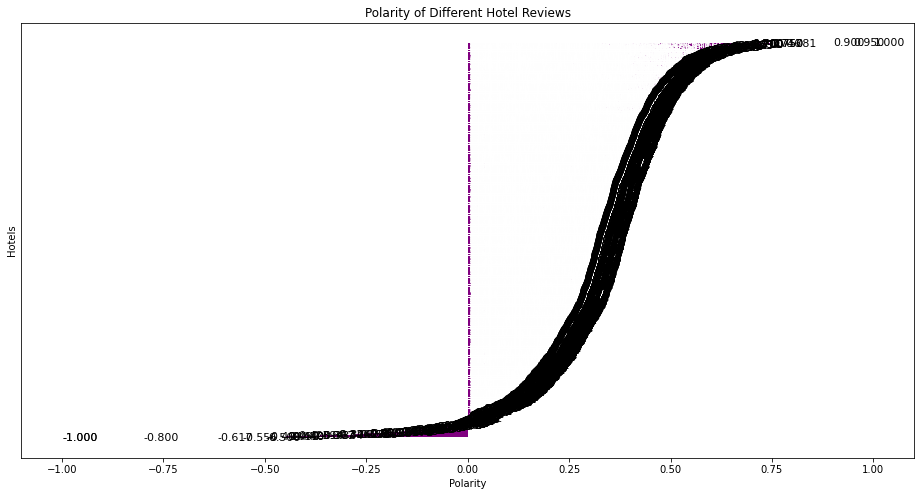

In [47]:
 #plot polarities of reviews for each hotels and their comparision
product_polarity_sorted=pd.DataFrame(review_df.groupby('Hotel')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Hotels')
plt.title('Polarity of Different Hotel Reviews')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()